### Offline Test

### Candidate: Kevin Ying


#### Project: Image Classification ( 10 Class) on "Street View House Number (SVHN)"

#### Dataset: http://ufldl.stanford.edu/housenumbers/

#### Method: <font color="blue"> Deep Learning Convolution by Turi GraphLab</font>
#### Content:
 - I. Import Dataset and Libraries
 - II. Convert Images format (Array --> JPEG) and save files locally
 - III. Reload images into GraphLab SFrame format
 - IV. Merges Class labels into SFrame
 - V. Save SFrame locally for future use
 - VI. Split Dataset into Train and Validation Set
 - VII. Modeling by Turi GraphLab Convolution Network
 - VIII. Model Determination by t-test
 


#### Image Preview

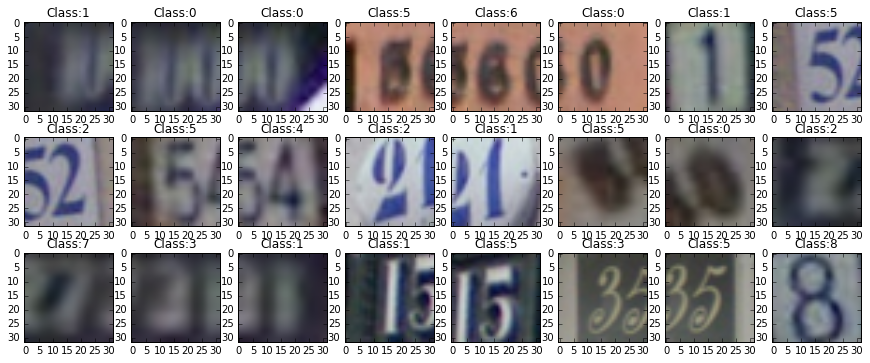

In [5]:
train=sio.loadmat("./data/train_32x32.mat")
test=sio.loadmat("./data/train_32x32.mat")

'''Plotting'''
fig=plt.figure(figsize=(15,10))
img_pos=988
for i in range(img_pos,img_pos+24):
    pic=train["X"][:,:,:,i]
    label=train["y"][i][0] 
    if label == 10: label=0
    ax=fig.add_subplot(5,8,i-img_pos+1)
    ax.set_title("Class:"+str( label))
    ax.imshow(pic)
    
plt.show()

#### Model Summary Table

Based on the following summary table, the three models are very close in terms of Overall Accuracy. The baseline model (i.e. Conv_#1) is built by the default setting from the GraphLab, the rest of models are pruned based on the #1 model. When we observe the Accuracy, we are able to see that there is overfitting issue on the first two models. For that reason, regularization L2 function was attempted on the model#2 or beyond. The overfitting issue was not improved on the model #2 (train:0.83 vs valid:0.88), so the higher L2 value which was 0.005 and 0.01 for the #3 and #4 models. The result showed that the L2 value actually lowered the overfitting issue (i.e. train:0.83 vs valid:0.84 or 0.85). When we used the model#3 and model#4 to measure the performance on the test set, the recall values on most of the classes are above 90%. In order to determine the best model, a statistical t-test with <font color="blue"> p-value < 5% </font> which meant that the <font color = "blue"> model#4 (Acc=0.88) is outperformed model#3 ( Acc=0.86) </font>

In this case, I would propose to continue to iterate the similar configurations with some other setting shown below to test on the outcomes:

- Add Dropout layers to continue to tackle the overfitting problem
- Increase the Convolutional layers to the existing configuration to capture more features from the original data
- Lower the Learning rate with higher epoches set for training process

#### Models Configuration Table

In [6]:
sf=gl.SFrame({ "Model": ["Conv_#1","Conv_#2","Conv_#3", "Conv_#4"],
              "Filter Size": [3,3,3,3],
              "Stride": [2,2,2,1],
              "Learning Rate": [0.001,0.001,0.001, 0.001],
              "Batch Size": [100,100,100,200], 
              "Regularization L2": [None, 0.001,0.005, 0.01], 
              "Train_Acc": [0.8, 0.82, 0.83, 0.83 ], 
              "Valid_Acc": [0.83, 0.88, 0.84, 0.85]})
sf["Model","Filter Size" ,"Stride","Batch Size", "Learning Rate", "Regularization L2", "Train_Acc" , "Valid_Acc"]

Model,Filter Size,Stride,Batch Size,Learning Rate,Regularization L2,Train_Acc,Valid_Acc
Conv_#1,3,2,100,0.001,None,0.8,0.83
Conv_#2,3,2,100,0.001,0.001,0.82,0.88
Conv_#3,3,2,100,0.001,0.005,0.83,0.84
Conv_#4,3,1,200,0.001,0.01,0.83,0.85


#### Model Summary Chart

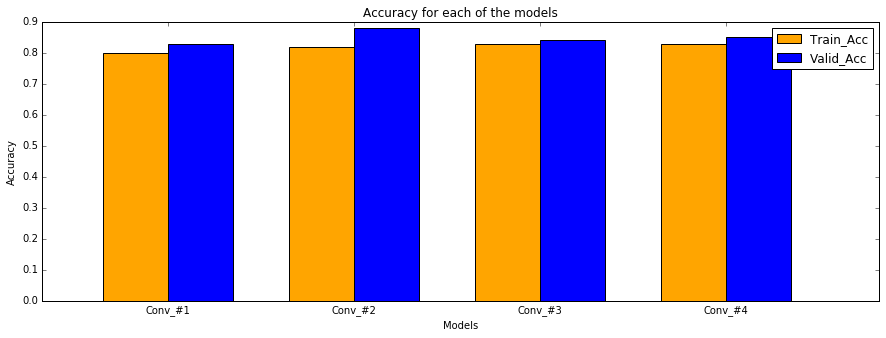

In [20]:
labels = ["Conv_#1", "Conv_#2", "Conv_#3", "Conv_#4"]
train_Acc = [0.8,0.82,0.83, 0.83]
test_Acc = [0.83, 0.88,0.84, 0.85]

x=np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(15,5))

train_rect = ax.bar(x-width/2, train_Acc, width, label="Train_Acc", color="orange") 
test_rect = ax.bar(x+width/2, test_Acc, width, label="Valid_Acc") 

ax.set_ylabel("Accuracy")
ax.set_xlabel("Models")
ax.set_xticks(x+width/2)
ax.set_xticklabels(labels)
ax.set_title("Accuracy for each of the models")
ax.legend()

plt.show()

#### Recall Measurment on the best Model #3

/Users/dataguy/anaconda2/envs/gl-env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


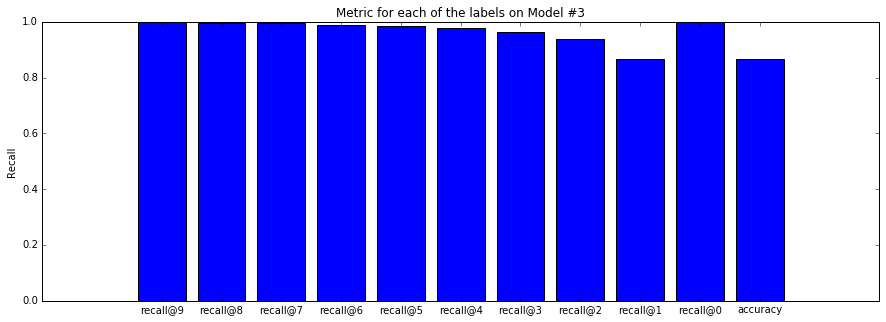

In [9]:
'''The following Recall values are collected from the below Model #3 section '''
d = {'accuracy': 0.8671935796737671,
 'recall@1': 0.8671935796737671,
 'recall@0': 1.0,
 'recall@2': 0.937384843826294,
 'recall@3': 0.9633209109306335,
 'recall@4': 0.9766165614128113,
 'recall@5': 0.9845612049102783,
 'recall@6': 0.9898576140403748,
 'recall@7': 0.9940483570098877,
 'recall@8': 0.996833086013794,
 'recall@9': 0.998730480670929}

labels=d.keys()
height=d.values()

x=np.arange(len(labels))
width =0.8


fig, ax = plt.subplots(figsize=(15,5))
m3_test_rect=ax.bar(x-width/2, height, width, color="blue") 

ax.set_ylabel("Recall")
ax.set_xticks(x)#+width/2)
ax.set_xticklabels(labels)
ax.set_title("Metric for each of the labels on Model #3")
ax.legend()

plt.show()



#### Recall Measurment on the best Model #4

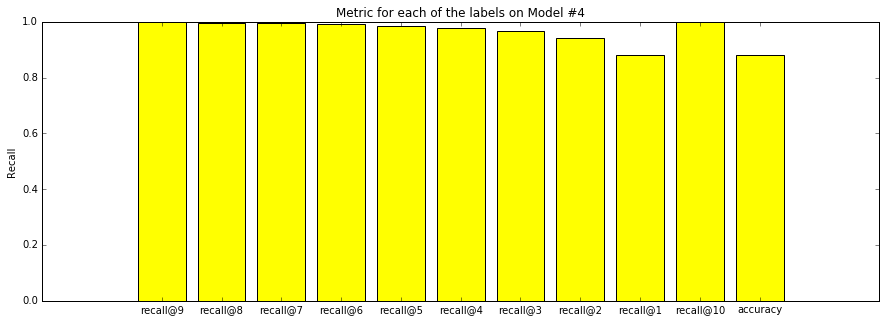

In [10]:
'''The following Recall values are collected from the below Model #3 section '''
d = {'accuracy': 0.8801889419555664,
 'recall@1': 0.8801889419555664,
 'recall@10': 1.0,
 'recall@2': 0.9428040981292725,
 'recall@3': 0.9661192893981934,
 'recall@4': 0.9779816269874573,
 'recall@5': 0.9852164387702942,
 'recall@6': 0.9904446005821228,
 'recall@7': 0.9941712021827698,
 'recall@8': 0.9967784881591797,
 'recall@9': 0.998730480670929}

labels=d.keys()
height=d.values()

x=np.arange(len(labels))
width =0.8


fig, ax = plt.subplots(figsize=(15,5))
m3_test_rect=ax.bar(x-width/2, height, width, color="yellow") 

ax.set_ylabel("Recall")
ax.set_xticks(x)#+width/2)
ax.set_xticklabels(labels)
ax.set_title("Metric for each of the labels on Model #4")
ax.legend()

plt.show()

#### Result Discusion / Future Work
The Convolution algorithm is very handful tool for imaging classification projects. The biggest challenge of this project is time management due to leaking of computation power. In order to obtain a better result on modeling, the number of epoch (i.e. iteration) is necessary to be adjust and test. The reason is that the weights on the network are updated on every epoch in order to lower the error (i.e. loss function). So that the higher value of epoch implies more errors would be corrected. For the above reason, the higher value of epoch consumes more computation power which takes more time on the model building process. The best model which generates about 88% of overall accuracy on the model which 50 iterations (i.e. Epoch) also solves the overfitting problem.  

The future work I would recommend to figure the way to launch the modeling process on the Cloud platform with Turi GraphLab Library in order to speed up the computation process. That way is able to generate better model performance as well as saves computation resources.

### The following is the Pipline of Modeling Process

### Libraries

In [4]:
import graphlab as gl
from graphlab import SFrame
import pandas as pd
import numpy as np
import scipy.io as sio
import scipy
import matplotlib.pyplot as plt

In [6]:
train=sio.loadmat("./data/train_32x32.mat")
test=sio.loadmat("./data/train_32x32.mat")


Xtrain=np.transpose(train["X"], axes=(3,0,1,2))
ytrain = train["y"].reshape(1,-1)[0]
Xtest=np.transpose(test["X"], axes=(3,0,1,2))
ytest = test["y"].reshape(1,-1)[0]

print "Train set: ",Xtrain.shape, ytrain.shape
print "Test set: " ,Xtest.shape, ytest.shape

Train set:  (73257, 32, 32, 3) (73257,)
Test set:  (73257, 32, 32, 3) (73257,)


### Save Image

In [11]:
from PIL import Image

for i in range(0,Xtrain.shape[0]):Image.fromarray(Xtrain[i][:,:,2]).save("./data/img/train/%d_%d.jpeg"%(i, ytrain[i]))
for i in range(0,Xtest.shape[0]):Image.fromarray(Xtest[i][:,:,2]).save("./data/img/test/%d_%d.jpeg"%(i, ytest[i]))

### Load to graphlab.SFrame (Train and Test)

In [150]:
XtrainGL=gl.image_analysis.load_images("./data/img/train", 
                                      format='auto', 
                                          with_path=True, 
                                          recursive=True, 
                                          ignore_failure=True, 
                                          random_order=True)

Read 15729 images in 5.00006 secs	speed: 3145.76 file/sec

Read 32140 images in 10.0002 secs	speed: 3282.1 file/sec

Read 47566 images in 15.0005 secs	speed: 3085.01 file/sec

Read 60829 images in 20.0008 secs	speed: 2652.42 file/sec

In [151]:
XtestGL=gl.image_analysis.load_images("./data/img/test", 
                                      format='auto', 
                                          with_path=True, 
                                          recursive=True, 
                                          ignore_failure=True, 
                                          random_order=True)

Read 15183 images in 5.00035 secs	speed: 3036.39 file/sec

Read 29684 images in 10.0004 secs	speed: 2900.14 file/sec

Read 44837 images in 15.0007 secs	speed: 3030.45 file/sec

Read 58839 images in 20.0007 secs	speed: 2800.39 file/sec

### Combine the Class Label to the SFrame

In [152]:
XtrainGL["label"]=XtrainGL["path"].apply(lambda x: x.split("_")[-1].split(".")[0])
XtrainGL["label"] = XtrainGL["label"].astype(int)
XtestGL["label"]=XtestGL["path"].apply(lambda x: x.split("_")[-1].split(".")[0])
XtestGL["label"] = XtestGL["label"].astype(int)

In [153]:
XtrainGL=XtrainGL["image", "label"]
XtestGL=XtestGL["image", "label"]

### Save the data for future use

In [154]:
XtrainGL.save('./data/train.sframe')
XtestGL.save('./data/test.sframe')

### Load the data for Training

In [12]:
# Load the data
train =  gl.SFrame('./data/train.sframe')
test=  gl.SFrame('./data/test.sframe')
train.shape, test.shape

((73257, 2), (73257, 2))

### Make a Train - Validation split

In [13]:
train_data, valid_data = train.random_split(0.67, seed =0 )
train_data.shape, valid_data.shape

((49149, 2), (24108, 2))

In [14]:
train_data.head(10)

image,label
Height: 32 Width: 32,1
Height: 32 Width: 32,4
Height: 32 Width: 32,6
Height: 32 Width: 32,4
Height: 32 Width: 32,2
Height: 32 Width: 32,9
Height: 32 Width: 32,1
Height: 32 Width: 32,2
Height: 32 Width: 32,1
Height: 32 Width: 32,1


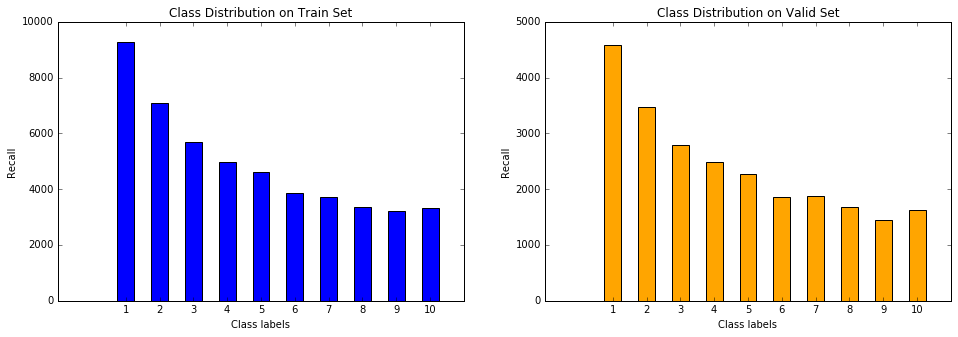

In [24]:
from collections import Counter

fig=plt.figure(figsize =(16,5))
#############################################
d=Counter(train_data["label"])
d=dict(d)
labels=d.keys()
height=d.values()
x=np.arange(len(labels))
width =0.5
ax=fig.add_subplot(1,2,1)
m3_test_rect=ax.bar(x-width/2, height, width, color="blue") 

ax.set_ylabel("Recall")
ax.set_xlabel("Class labels")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title("Class Distribution on Train Set")
ax.legend()

##################################################
d=Counter(valid_data["label"])
d=dict(d)
labels=d.keys()
height=d.values()
ax2=fig.add_subplot(1,2,2)
m3_test_rect=ax2.bar(x-width/2, height, width, color="orange") 

ax2.set_ylabel("Recall")
ax2.set_xlabel("Class labels")
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_title("Class Distribution on Valid Set")
ax2.legend()

plt.show()

## Modelling Process begins here
### Create network by using deeplearning.create

### Model#1

In [ ]:
net = gl.deeplearning.create(train, target='label')

In [167]:
m = gl.neuralnet_classifier.create(train_data, target='label',
                                         network = net,
                                         validation_set=valid_data,
                                         metric=['accuracy'],
                                         max_iterations= 30)

Using network:

### network layers ###
layer[0]: ConvolutionLayer
  init_random = gaussian
  padding = 0
  stride = 2
  num_channels = 10
  num_groups = 1
  kernel_size = 3
layer[1]: MaxPoolingLayer
  padding = 0
  stride = 2
  kernel_size = 3
layer[2]: FlattenLayer
layer[3]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 100
layer[4]: RectifiedLinearLayer
layer[5]: DropoutLayer
  threshold = 0.5
layer[6]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 10
layer[7]: SoftmaxLayer
### end network layers ###

### network parameters ###
learning_rate = 0.001
metric = accuracy
momentum = 0.9
### end network parameters ###



Computing mean image...

Done computing mean image.

Creating neuralnet using cpu

Training with batch size = 100

+-----------+----------+--------------+-------------------+---------------------+-----------------+

| Iteration | Examples | Elapsed Time | Training-accuracy | Validation-accuracy | Examples/second |

+-----------+----------+--------------+-------------------+---------------------+-----------------+

| 1         | 45700    | 10.010818    | 0.220788          |                     | 4565.062012     |

| 1         | 49100    | 13.187236    | 0.228065          | 0.383218            | 1070.387817     |

| 2         | 46500    | 23.195441    | 0.428989          |                     | 4646.242676     |

| 2         | 49100    | 26.214553    | 0.436008          | 0.619926            | 861.179993      |

| 3         | 46300    | 36.216437    | 0.605745          |                     | 4629.178711     |

| 3         | 49100    | 39.294688    | 0.608248          | 0.737970            | 909.607178      |

| 4         | 46700    | 49.306612    | 0.669979          |                     | 4664.483398     |

| 4         | 49100    | 52.309742    | 0.670998          | 0.753362            | 799.166077      |

| 5         | 46500    | 62.321338    | 0.703441          |                     | 4645.006348     |

| 5         | 49100    | 65.442249    | 0.704420          | 0.774711            | 833.089661      |

| 6         | 44300    | 75.446359    | 0.717788          |                     | 4428.203613     |

| 6         | 49100    | 79.269597    | 0.719572          | 0.775498            | 1255.480103     |

| 7         | 43800    | 89.288854    | 0.731872          |                     | 4371.602051     |

| 7         | 49100    | 93.009074    | 0.733157          | 0.792213            | 1424.646484     |

| 8         | 45900    | 103.015412   | 0.743028          |                     | 4587.133789     |

| 8         | 49100    | 106.221054   | 0.743279          | 0.796227            | 998.239868      |

| 9         | 46000    | 116.228069   | 0.754630          |                     | 4596.819336     |

| 9         | 49100    | 119.360993   | 0.754725          | 0.805412            | 989.490723      |

| 10        | 46200    | 129.371972   | 0.757662          |                     | 4614.985352     |

| 10        | 49100    | 132.499160   | 0.757434          | 0.809508            | 927.350464      |

| 11        | 45400    | 142.514669   | 0.761872          |                     | 4533.012695     |

| 11        | 49100    | 145.822003   | 0.762281          | 0.811701            | 1118.725708     |

| 12        | 44900    | 155.829819   | 0.769866          |                     | 4486.543945     |

| 12        | 49100    | 159.276334   | 0.769511          | 0.815466            | 1218.621826     |

| 13        | 45300    | 169.289042   | 0.772539          |                     | 4524.299316     |

| 13        | 49100    | 172.622323   | 0.773116          | 0.815673            | 1140.017456     |

| 14        | 46600    | 182.629419   | 0.772403          |                     | 4656.736816     |

| 14        | 49100    | 185.638783   | 0.772627          | 0.818569            | 830.740234      |

| 15        | 46400    | 195.659639   | 0.774504          |                     | 4630.394531     |

| 15        | 49100    | 198.801690   | 0.774481          | 0.821093            | 859.311035      |

| 16        | 46500    | 208.820911   | 0.778624          |                     | 4641.123535     |

| 16        | 49100    | 211.968130   | 0.778900          | 0.824941            | 826.125977      |

| 17        | 44200    | 221.972059   | 0.781855          |                     | 4418.287598     |

| 17        | 49100    | 225.495664   | 0.781833          | 0.824982            | 1390.620850     |

| 18        | 46300    | 235.509447   | 0.784147          |                     | 4623.670898     |

| 18        | 49100    | 238.599823   | 0.784358          | 0.827051            | 906.038513      |

| 19        | 46500    | 248.610021   | 0.786151          |                     | 4645.307129     |

| 19        | 49100    | 251.651610   | 0.786884          | 0.827175            | 854.816040      |

| 20        | 46000    | 261.654529   | 0.785826          |                     | 4598.709961     |

| 20        | 49100    | 264.837681   | 0.785723          | 0.829451            | 973.877319      |

| 21        | 46300    | 274.840966   | 0.787473          |                     | 4628.522461     |

| 21        | 49100    | 277.924366   | 0.788045          | 0.826306            | 908.088562      |

| 22        | 46700    | 287.944269   | 0.790728          |                     | 4660.776855     |

| 22        | 49100    | 290.987450   | 0.790754          | 0.830278            | 788.648193      |

| 23        | 46600    | 300.999318   | 0.793798          |                     | 4654.910645     |

| 23        | 49100    | 304.014484   | 0.793523          | 0.830527            | 829.141296      |

| 24        | 46500    | 314.014852   | 0.796022          |                     | 4649.875488     |

| 24        | 49100    | 317.059492   | 0.796680          | 0.837188            | 853.959412      |

| 25        | 46000    | 327.070293   | 0.797304          |                     | 4595.088867     |

| 25        | 49100    | 330.580872   | 0.797291          | 0.835740            | 883.044617      |

| 26        | 43500    | 340.582568   | 0.797035          |                     | 4349.292969     |

| 26        | 49100    | 344.573351   | 0.797210          | 0.824610            | 1403.232788     |

| 27        | 43200    | 354.578296   | 0.794468          |                     | 4317.902832     |

| 27        | 49100    | 358.609312   | 0.794358          | 0.833464            | 1463.650513     |

| 28        | 43000    | 368.613634   | 0.798442          |                     | 4298.168945     |

| 28        | 49100    | 372.638204   | 0.798513          | 0.833795            | 1515.689575     |

| 29        | 44300    | 382.656296   | 0.799503          |                     | 4422.041016     |

| 29        | 49100    | 386.284137   | 0.799470          | 0.836443            | 1323.100586     |

| 30        | 45300    | 396.299956   | 0.800993          |                     | 4522.899902     |

| 30        | 49100    | 399.704125   | 0.801059          | 0.838429            | 1116.277710     |

+-----------+----------+--------------+-------------------+---------------------+-----------------+

### Model#2

In [168]:
m = gl.neuralnet_classifier.create(train_data, target='label',
                                         network = net,
                                         validation_set=valid_data,
                                         metric=['accuracy'],
                                         max_iterations= 50,
                                           l2_regularization = 0.001)

Using network:

### network layers ###
layer[0]: ConvolutionLayer
  init_random = gaussian
  padding = 0
  stride = 2
  num_channels = 10
  num_groups = 1
  kernel_size = 3
layer[1]: MaxPoolingLayer
  padding = 0
  stride = 2
  kernel_size = 3
layer[2]: FlattenLayer
layer[3]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 100
layer[4]: RectifiedLinearLayer
layer[5]: DropoutLayer
  threshold = 0.5
layer[6]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 10
layer[7]: SoftmaxLayer
### end network layers ###

### network parameters ###
learning_rate = 0.001
l2_regularization = 0.001
metric = accuracy
momentum = 0.9
### end network parameters ###



Computing mean image...

Done computing mean image.

Creating neuralnet using cpu

Training with batch size = 100

+-----------+----------+--------------+-------------------+---------------------+-----------------+

| Iteration | Examples | Elapsed Time | Training-accuracy | Validation-accuracy | Examples/second |

+-----------+----------+--------------+-------------------+---------------------+-----------------+

| 1         | 45000    | 10.005705    | 0.219844          |                     | 4497.434570     |

| 1         | 73300    | 23.895303    | 0.276030          | 0.513262            | 2037.495850     |

| 2         | 46100    | 33.903478    | 0.536746          |                     | 4606.279785     |

| 2         | 73300    | 47.398355    | 0.570859          | 0.733787            | 2015.579590     |

| 3         | 44600    | 57.403465    | 0.669686          |                     | 4457.747559     |

| 3         | 73300    | 71.283590    | 0.676712          | 0.769865            | 2067.704590     |

| 4         | 44900    | 81.294532    | 0.708285          |                     | 4485.144531     |

| 4         | 73300    | 95.099196    | 0.713370          | 0.809015            | 2057.275635     |

| 5         | 46500    | 105.108154   | 0.731892          |                     | 4645.893066     |

| 5         | 73300    | 118.345946   | 0.734447          | 0.810817            | 2024.506714     |

| 6         | 46700    | 128.350782   | 0.747709          |                     | 4668.152832     |

| 6         | 73300    | 141.928399   | 0.750491          | 0.813738            | 1959.106567     |

| 7         | 45500    | 151.945063   | 0.758154          |                     | 4542.473633     |

| 7         | 73300    | 165.432151   | 0.758922          | 0.822024            | 2061.230469     |

| 8         | 44900    | 175.434534   | 0.761849          |                     | 4488.972656     |

| 8         | 73300    | 189.749416   | 0.765525          | 0.824426            | 1983.948975     |

| 9         | 45400    | 199.770596   | 0.773084          |                     | 4530.468262     |

| 9         | 73300    | 214.057390   | 0.773370          | 0.831484            | 1952.852051     |

| 10        | 45500    | 224.074449   | 0.772066          |                     | 4542.294922     |

| 10        | 73300    | 237.531917   | 0.773724          | 0.833954            | 2065.767334     |

| 11        | 45100    | 247.543042   | 0.778869          |                     | 4505.369141     |

| 11        | 73300    | 261.595331   | 0.781173          | 0.840984            | 2006.790161     |

| 12        | 44500    | 271.605291   | 0.776225          |                     | 4445.615234     |

| 12        | 73300    | 285.982852   | 0.778718          | 0.840903            | 2003.121216     |

| 13        | 42400    | 296.001525   | 0.780849          |                     | 4232.122070     |

| 13        | 73300    | 311.353201   | 0.783070          | 0.844506            | 2012.809204     |

| 14        | 44100    | 321.375771   | 0.784286          |                     | 4400.540527     |

| 14        | 73300    | 335.659896   | 0.785935          | 0.840643            | 2044.227295     |

| 15        | 45200    | 345.680626   | 0.785420          |                     | 4510.675293     |

| 15        | 73300    | 359.266136   | 0.787149          | 0.846213            | 2068.379883     |

| 16        | 44200    | 369.272416   | 0.788778          |                     | 4417.602051     |

| 16        | 73300    | 383.691633   | 0.790628          | 0.843796            | 2018.140015     |

| 17        | 43900    | 393.712173   | 0.790934          |                     | 4381.027344     |

| 17        | 73300    | 407.705831   | 0.791746          | 0.849393            | 2100.951660     |

| 18        | 44000    | 417.708047   | 0.791977          |                     | 4399.067383     |

| 18        | 73300    | 431.590229   | 0.794529          | 0.854690            | 2110.618896     |

| 19        | 46100    | 441.593145   | 0.794989          |                     | 4608.707031     |

| 19        | 73300    | 455.631769   | 0.797258          | 0.852874            | 1937.511597     |

| 20        | 43900    | 465.646230   | 0.795854          |                     | 4383.702148     |

| 20        | 73300    | 480.436706   | 0.795362          | 0.859850            | 1987.765503     |

| 21        | 42700    | 490.438620   | 0.794309          |                     | 4269.207031     |

| 21        | 73300    | 504.790364   | 0.798022          | 0.853174            | 2132.144775     |

| 22        | 45600    | 514.803055   | 0.798136          |                     | 4554.541016     |

| 22        | 73300    | 528.448869   | 0.798909          | 0.858580            | 2029.926392     |

| 23        | 44900    | 538.469966   | 0.799955          |                     | 4480.571289     |

| 23        | 73300    | 552.216131   | 0.800055          | 0.859891            | 2066.030518     |

| 24        | 46000    | 562.237331   | 0.800435          |                     | 4590.328125     |

| 24        | 73300    | 576.335381   | 0.800450          | 0.860314            | 1936.437744     |

| 25        | 45900    | 586.340235   | 0.804030          |                     | 4587.798828     |

| 25        | 73300    | 599.956975   | 0.803520          | 0.858621            | 2012.228882     |

| 26        | 45900    | 609.974276   | 0.800022          |                     | 4582.098633     |

| 26        | 73300    | 623.925903   | 0.801733          | 0.863958            | 1963.928589     |

| 27        | 40900    | 633.931959   | 0.803105          |                     | 4087.956787     |

| 27        | 73300    | 648.786011   | 0.805048          | 0.865064            | 2181.222656     |

| 28        | 46500    | 658.798366   | 0.802473          |                     | 4644.304688     |

| 28        | 73300    | 672.376860   | 0.803724          | 0.866989            | 1973.709229     |

| 29        | 45200    | 682.385318   | 0.804668          |                     | 4516.206055     |

| 29        | 73300    | 696.002426   | 0.804147          | 0.864286            | 2063.580566     |

| 30        | 46400    | 706.022735   | 0.803901          |                     | 4630.635254     |

| 30        | 73300    | 719.843839   | 0.806262          | 0.865951            | 1946.298828     |

| 31        | 44600    | 729.847808   | 0.807825          |                     | 4458.599609     |

| 31        | 73300    | 743.499863   | 0.809086          | 0.866388            | 2102.247559     |

| 32        | 46600    | 753.503298   | 0.805601          |                     | 4658.816406     |

| 32        | 73300    | 766.888829   | 0.807271          | 0.864068            | 1994.690918     |

| 33        | 45800    | 776.893864   | 0.811070          |                     | 4577.750488     |

| 33        | 73300    | 790.283580   | 0.810437          | 0.871494            | 2053.814941     |

| 34        | 44000    | 800.301164   | 0.811386          |                     | 4392.324707     |

| 34        | 73300    | 815.013600   | 0.810969          | 0.865596            | 1991.512451     |

| 35        | 46200    | 825.017120   | 0.809351          |                     | 4618.408691     |

| 35        | 73300    | 838.356943   | 0.810737          | 0.866880            | 2031.510986     |

| 36        | 46600    | 848.366920   | 0.811073          |                     | 4655.764648     |

| 36        | 73300    | 861.560206   | 0.811392          | 0.866006            | 2023.756470     |

| 37        | 46500    | 871.577863   | 0.811140          |                     | 4641.847656     |

| 37        | 73300    | 884.818417   | 0.810095          | 0.872313            | 2024.084473     |

| 38        | 46600    | 894.825168   | 0.810279          |                     | 4656.908203     |

| 38        | 73300    | 908.045310   | 0.811542          | 0.871384            | 2019.645264     |

| 39        | 46700    | 918.056851   | 0.811370          |                     | 4664.662109     |

| 39        | 73300    | 931.269059   | 0.812742          | 0.874278            | 2013.289551     |

| 40        | 46300    | 941.282684   | 0.812160          |                     | 4623.742676     |

| 40        | 73300    | 954.586852   | 0.812769          | 0.874920            | 2029.439087     |

| 41        | 46600    | 964.591317   | 0.812318          |                     | 4658.309570     |

| 41        | 73300    | 977.786093   | 0.813997          | 0.875889            | 2023.528076     |

| 42        | 46600    | 987.796297   | 0.815451          |                     | 4655.291992     |

| 42        | 73300    | 1001.026495  | 0.815334          | 0.868381            | 2018.110229     |

| 43        | 46600    | 1011.031681  | 0.812425          |                     | 4657.629395     |

| 43        | 73300    | 1024.278190  | 0.813574          | 0.876653            | 2015.625244     |

| 44        | 46700    | 1034.284396  | 0.815054          |                     | 4667.155273     |

| 44        | 73300    | 1047.667294  | 0.815198          | 0.872927            | 1987.611206     |

| 45        | 30300    | 7114842725...| 0.814851          |                     | 0.000004        |

| 45        | 73300    | 7114842742...| 0.814598          | 0.872162            | 2476.983154     |

| 46        | 45400    | 7114842752...| 0.813414          |                     | 4534.747070     |

| 46        | 73300    | 7114842766...| 0.816862          | 0.874660            | 1928.260132     |

| 47        | 40200    | 7114842777...| 0.816965          |                     | 4017.298584     |

| 47        | 73300    | 7114842792...| 0.816289          | 0.874333            | 2147.354248     |

| 48        | 44600    | 7114842802...| 0.814619          |                     | 4450.416504     |

| 48        | 73300    | 7114842817...| 0.815607          | 0.871780            | 1951.749878     |

| 49        | 43800    | 7114842827...| 0.814795          |                     | 4372.359863     |

| 49        | 73300    | 7114842841...| 0.816630          | 0.879151            | 2019.839600     |

| 50        | 43900    | 7114842851...| 0.814966          |                     | 4378.942871     |

| 50        | 73300    | 7114842866...| 0.817094          | 0.877404            | 2030.296265     |

+-----------+----------+--------------+-------------------+---------------------+-----------------+

### Model#3

In [173]:
net.layers[0].num_channels=64

In [176]:
m = gl.neuralnet_classifier.create(train_data, target='label',
                                         network = net,
                                         validation_set=valid_data,
                                         metric=['accuracy'],
                                         max_iterations= 50,
                                        l2_regularization = 0.005)

Using network:

### network layers ###
layer[0]: ConvolutionLayer
  init_random = gaussian
  padding = 0
  stride = 2
  num_channels = 64
  num_groups = 1
  kernel_size = 3
layer[1]: MaxPoolingLayer
  padding = 0
  stride = 2
  kernel_size = 3
layer[2]: FlattenLayer
layer[3]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 100
layer[4]: RectifiedLinearLayer
layer[5]: DropoutLayer
  threshold = 0.5
layer[6]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 10
layer[7]: SoftmaxLayer
### end network layers ###

### network parameters ###
learning_rate = 0.001
l2_regularization = 0.005
metric = accuracy
momentum = 0.9
### end network parameters ###



Computing mean image...

Done computing mean image.

Creating neuralnet using cpu

Training with batch size = 100

+-----------+----------+--------------+-------------------+---------------------+-----------------+

| Iteration | Examples | Elapsed Time | Training-accuracy | Validation-accuracy | Examples/second |

+-----------+----------+--------------+-------------------+---------------------+-----------------+

| 1         | 7000     | 10.065952    | 0.173429          |                     | 695.413696      |

| 1         | 14500    | 20.075936    | 0.183241          |                     | 749.253357      |

| 1         | 22900    | 30.109738    | 0.196376          |                     | 837.168640      |

| 1         | 31300    | 40.143178    | 0.220383          |                     | 837.200439      |

| 1         | 39700    | 50.233742    | 0.252317          |                     | 832.462402      |

| 1         | 48100    | 60.313997    | 0.293119          |                     | 833.312317      |

| 1         | 49100    | 74.387741    | 0.297780          | 0.600894            | 71.054192       |

| 2         | 8400     | 84.453000    | 0.541310          |                     | 834.563171      |

| 2         | 16800    | 94.510604    | 0.569643          |                     | 835.188965      |

| 2         | 25100    | 104.513110   | 0.583307          |                     | 829.792053      |

| 2         | 33500    | 114.540738   | 0.595672          |                     | 837.685669      |

| 2         | 41900    | 124.559413   | 0.606372          |                     | 838.434265      |

| 2         | 49100    | 145.988930   | 0.615621          | 0.740163            | 335.985138      |

| 3         | 8200     | 156.091840   | 0.667439          |                     | 811.655579      |

| 3         | 16600    | 166.139440   | 0.676988          |                     | 836.020569      |

| 3         | 25000    | 176.242718   | 0.678120          |                     | 831.413330      |

| 3         | 33400    | 186.277526   | 0.681886          |                     | 837.086243      |

| 3         | 41800    | 196.283327   | 0.686483          |                     | 839.513000      |

| 3         | 49100    | 217.811016   | 0.689491          | 0.779345            | 339.098145      |

| 4         | 8400     | 227.818205   | 0.709643          |                     | 839.469666      |

| 4         | 16900    | 237.935769   | 0.713550          |                     | 840.123108      |

| 4         | 25300    | 247.946037   | 0.715534          |                     | 839.140015      |

| 4         | 33700    | 257.952243   | 0.714837          |                     | 839.479004      |

| 4         | 42200    | 268.068061   | 0.715640          |                     | 840.268127      |

| 4         | 49100    | 289.085099   | 0.717821          | 0.783152            | 328.304749      |

| 5         | 8400     | 299.141602   | 0.719167          |                     | 835.288452      |

| 5         | 16900    | 309.259248   | 0.725385          |                     | 840.116333      |

| 5         | 25400    | 319.347306   | 0.720197          |                     | 842.580322      |

| 5         | 33900    | 329.439863   | 0.721121          |                     | 842.204773      |

| 5         | 42300    | 339.446390   | 0.724657          |                     | 839.452087      |

| 5         | 49100    | 360.373791   | 0.725947          | 0.790600            | 324.932831      |

| 6         | 8400     | 370.417757   | 0.729405          |                     | 836.331787      |

| 6         | 16800    | 380.467110   | 0.731071          |                     | 835.874756      |

| 6         | 25100    | 390.535047   | 0.729084          |                     | 824.399231      |

| 6         | 33500    | 400.569954   | 0.730567          |                     | 837.078003      |

| 6         | 36200    | 7114852771...| 0.732044          |                     | 0.000000        |

| 6         | 43500    | 7114852781...| 0.734092          |                     | 729.091003      |

| 6         | 49100    | 7114852803...| 0.735295          | 0.791799            | 255.748642      |

| 7         | 8400     | 7114852813...| 0.739048          |                     | 835.121155      |

| 7         | 16800    | 7114852823...| 0.739405          |                     | 837.638184      |

| 7         | 24400    | 7114852833...| 0.739344          |                     | 758.028503      |

| 7         | 32700    | 7114852843...| 0.742385          |                     | 825.585876      |

| 7         | 41200    | 7114852853...| 0.743811          |                     | 840.716797      |

| 7         | 49100    | 7114852875...| 0.745743          | 0.801523            | 356.485962      |

| 8         | 8500     | 7114852886...| 0.747882          |                     | 840.227478      |

| 8         | 16900    | 7114852896...| 0.755089          |                     | 835.824707      |

| 8         | 24500    | 7114852906...| 0.753673          |                     | 756.943115      |

| 8         | 31900    | 7114852916...| 0.752884          |                     | 733.753357      |

| 8         | 40400    | 7114852926...| 0.754901          |                     | 840.744690      |

| 8         | 48900    | 7114852936...| 0.755297          |                     | 842.931641      |

| 8         | 49100    | 7114852950...| 0.755336          | 0.796723            | 14.374344       |

| 9         | 8200     | 7114852960...| 0.757683          |                     | 818.667175      |

| 9         | 16600    | 7114852970...| 0.760060          |                     | 836.549988      |

| 9         | 25000    | 7114852980...| 0.757960          |                     | 834.789978      |

| 9         | 33200    | 7114852990...| 0.759428          |                     | 819.918762      |

| 9         | 41300    | 7114853000...| 0.759661          |                     | 805.544739      |

| 9         | 49100    | 7114853022...| 0.759939          | 0.796433            | 349.630188      |

| 10        | 8400     | 7114853032...| 0.759643          |                     | 835.867432      |

| 10        | 16800    | 7114853042...| 0.762798          |                     | 837.588135      |

| 10        | 25200    | 7114853052...| 0.760992          |                     | 838.149780      |

| 10        | 33600    | 7114853062...| 0.763036          |                     | 834.862000      |

| 10        | 42000    | 7114853073...| 0.765119          |                     | 832.429993      |

| 10        | 49100    | 7114853094...| 0.764644          | 0.804047            | 330.440613      |

| 11        | 8400     | 7114853104...| 0.771309          |                     | 833.033325      |

| 11        | 16800    | 7114853114...| 0.771012          |                     | 836.257507      |

| 11        | 25200    | 7114853124...| 0.769643          |                     | 834.452881      |

| 11        | 33400    | 7114853134...| 0.770748          |                     | 814.353516      |

| 11        | 41700    | 7114853144...| 0.772398          |                     | 827.876343      |

| 11        | 49100    | 7114852793...| 0.772098          | 0.812942            | -21.075436      |

| 12        | 8300     | 7114852803...| 0.769277          |                     | 828.261353      |

| 12        | 16700    | 7114852813...| 0.775748          |                     | 838.350342      |

| 12        | 25100    | 7114852823...| 0.776892          |                     | 839.485046      |

| 12        | 32500    | 7114852833...| 0.776677          |                     | 730.142273      |

| 12        | 40100    | 7114852844...| 0.778229          |                     | 752.010193      |

| 12        | 47800    | 7114852854...| 0.778431          |                     | 766.558594      |

| 12        | 49100    | 7114852868...| 0.777963          | 0.816625            | 88.511589       |

| 13        | 8400     | 7114852878...| 0.764286          |                     | 834.724854      |

| 13        | 16100    | 7114852888...| 0.770124          |                     | 763.886658      |

| 13        | 24300    | 7114852898...| 0.771440          |                     | 816.750427      |

| 13        | 32700    | 7114852909...| 0.774251          |                     | 832.300659      |

| 13        | 41100    | 7114852919...| 0.777762          |                     | 832.576721      |

| 13        | 48600    | 7114852929...| 0.777798          |                     | 744.856750      |

| 13        | 49100    | 7114852942...| 0.777984          | 0.823121            | 36.532879       |

| 14        | 8200     | 7114852952...| 0.778537          |                     | 817.944458      |

| 14        | 16400    | 7114852962...| 0.781463          |                     | 819.040894      |

| 14        | 24700    | 7114852972...| 0.780324          |                     | 829.757202      |

| 14        | 33100    | 7114852982...| 0.780786          |                     | 833.857666      |

| 14        | 41400    | 7114852993...| 0.783092          |                     | 821.562683      |

| 14        | 49100    | 7114853015...| 0.783768          | 0.823452            | 344.643280      |

| 15        | 8400     | 7114853025...| 0.780476          |                     | 830.896484      |

| 15        | 16800    | 7114853035...| 0.786250          |                     | 833.470764      |

| 15        | 25100    | 7114853045...| 0.785418          |                     | 827.989502      |

| 15        | 33500    | 7114853055...| 0.783701          |                     | 831.880066      |

| 15        | 41900    | 7114853065...| 0.785656          |                     | 829.226990      |

| 15        | 49100    | 7114853088...| 0.785479          | 0.819645            | 324.743927      |

| 16        | 7400     | 7114853098...| 0.785676          |                     | 734.619568      |

| 16        | 15000    | 7114853108...| 0.787067          |                     | 759.677673      |

| 16        | 23400    | 7114853118...| 0.787393          |                     | 836.801697      |

| 16        | 31800    | 7114853128...| 0.788050          |                     | 832.483765      |

| 16        | 40000    | 7114853138...| 0.789800          |                     | 812.073547      |

| 16        | 48100    | 7114853148...| 0.790104          |                     | 808.668884      |

| 16        | 49100    | 7114853162...| 0.790489          | 0.830734            | 71.293297       |

| 17        | 8100     | 7114853172...| 0.792099          |                     | 809.018311      |

| 17        | 16200    | 7114853182...| 0.795494          |                     | 802.283997      |

| 17        | 24600    | 7114853192...| 0.790244          |                     | 837.925964      |

| 17        | 32900    | 7114853202...| 0.791033          |                     | 826.153564      |

| 17        | 40900    | 7114853212...| 0.792298          |                     | 796.785217      |

| 17        | 49100    | 5.530346     | 0.792648          | 0.833671            | -0.000001       |

| 18        | 8400     | 15.623792    | 0.797619          |                     | 832.303589      |

| 18        | 16700    | 25.714138    | 0.798862          |                     | 822.568420      |

| 18        | 24400    | 35.803126    | 0.795328          |                     | 763.208374      |

| 18        | 32200    | 45.827489    | 0.795217          |                     | 778.104370      |

| 18        | 40600    | 55.847354    | 0.796429          |                     | 838.336182      |

| 18        | 49000    | 65.891386    | 0.796490          |                     | 836.315979      |

| 18        | 49100    | 78.948857    | 0.796354          | 0.835078            | 7.658450        |

| 19        | 8300     | 88.949472    | 0.795422          |                     | 829.958313      |

| 19        | 16500    | 99.028418    | 0.798849          |                     | 813.578735      |

| 19        | 24900    | 109.042024   | 0.797550          |                     | 838.856995      |

| 19        | 33300    | 119.073709   | 0.797898          |                     | 837.346924      |

| 19        | 41700    | 129.097510   | 0.798801          |                     | 838.005432      |

| 19        | 49100    | 151.399417   | 0.799124          | 0.834747            | 331.810150      |

| 20        | 8400     | 161.417955   | 0.796310          |                     | 838.540771      |

| 20        | 16700    | 171.456558   | 0.799880          |                     | 826.808228      |

| 20        | 25100    | 181.536629   | 0.799562          |                     | 833.327515      |

| 20        | 33500    | 191.625008   | 0.800537          |                     | 832.641174      |

| 20        | 41800    | 201.630082   | 0.802057          |                     | 829.579102      |

| 20        | 49100    | 223.324491   | 0.802016          | 0.832016            | 336.492188      |

| 21        | 8400     | 233.370671   | 0.799524          |                     | 836.215271      |

| 21        | 16100    | 243.436173   | 0.800807          |                     | 764.990662      |

| 21        | 24400    | 253.552133   | 0.798484          |                     | 820.484131      |

| 21        | 32700    | 263.599409   | 0.798838          |                     | 826.094482      |

| 21        | 41000    | 273.699703   | 0.800561          |                     | 821.758301      |

| 21        | 49100    | 296.309581   | 0.800876          | 0.841988            | 358.250458      |

| 22        | 8400     | 306.321058   | 0.801905          |                     | 839.111938      |

| 22        | 16500    | 316.393893   | 0.803273          |                     | 804.143372      |

| 22        | 23800    | 326.457550   | 0.801555          |                     | 725.382019      |

| 22        | 32000    | 336.492497   | 0.801219          |                     | 817.144409      |

| 22        | 40400    | 346.505645   | 0.802302          |                     | 838.896973      |

| 22        | 48800    | 356.548031   | 0.802971          |                     | 836.454590      |

| 22        | 49100    | 370.005750   | 0.803055          | 0.835823            | 22.292038       |

| 23        | 8000     | 380.111162   | 0.805875          |                     | 791.663757      |

| 23        | 16200    | 390.147227   | 0.809074          |                     | 817.054810      |

| 23        | 24600    | 400.264638   | 0.806341          |                     | 830.250305      |

| 23        | 33000    | 410.302272   | 0.806545          |                     | 836.850647      |

| 23        | 41400    | 420.345041   | 0.807585          |                     | 836.424316      |

| 23        | 49100    | 443.518552   | 0.808106          | 0.832802            | 332.275635      |

| 24        | 8400     | 453.571015   | 0.800714          |                     | 835.627136      |

| 24        | 16800    | 463.580638   | 0.807321          |                     | 839.190796      |

| 24        | 25200    | 473.672326   | 0.805079          |                     | 832.368164      |

| 24        | 33600    | 483.704639   | 0.805089          |                     | 837.296021      |

| 24        | 41800    | 493.787813   | 0.806483          |                     | 813.234558      |

| 24        | 49100    | 516.072514   | 0.806253          | 0.838967            | 327.578949      |

| 25        | 8300     | 526.196485   | 0.801566          |                     | 819.908386      |

| 25        | 16600    | 536.214787   | 0.809940          |                     | 828.483704      |

| 25        | 24900    | 546.281203   | 0.809036          |                     | 824.525269      |

| 25        | 33300    | 556.297791   | 0.808979          |                     | 838.607422      |

| 25        | 41700    | 566.340468   | 0.808321          |                     | 836.431885      |

| 25        | 49100    | 587.967243   | 0.807536          | 0.842567            | 342.168121      |

| 26        | 8400     | 597.993322   | 0.805000          |                     | 837.827026      |

| 26        | 16900    | 608.108512   | 0.807929          |                     | 840.322021      |

| 26        | 25300    | 618.187878   | 0.807194          |                     | 833.384094      |

| 26        | 33700    | 628.229350   | 0.807715          |                     | 836.530762      |

| 26        | 42100    | 638.237026   | 0.808029          |                     | 839.355713      |

| 26        | 49100    | 659.417081   | 0.807862          | 0.837767            | 330.499573      |

| 27        | 8500     | 669.525295   | 0.804941          |                     | 840.910767      |

| 27        | 16900    | 679.563429   | 0.808580          |                     | 836.808899      |

| 27        | 25300    | 689.600591   | 0.806245          |                     | 836.889893      |

| 27        | 33400    | 699.676072   | 0.805928          |                     | 803.930420      |

| 27        | 41500    | 709.757011   | 0.806988          |                     | 803.496582      |

| 27        | 49100    | 731.756051   | 0.807067          | 0.839712            | 345.469574      |

| 28        | 8500     | 741.861998   | 0.804824          |                     | 841.099609      |

| 28        | 16900    | 751.926452   | 0.812189          |                     | 834.618896      |

| 28        | 25300    | 761.936780   | 0.810277          |                     | 839.134949      |

| 28        | 33700    | 771.945048   | 0.809199          |                     | 839.304504      |

| 28        | 42100    | 781.978797   | 0.809216          |                     | 837.176208      |

| 28        | 49100    | 803.158291   | 0.809084          | 0.840209            | 330.508026      |

| 29        | 8400     | 813.253540   | 0.801548          |                     | 832.085693      |

| 29        | 16900    | 823.369134   | 0.809586          |                     | 840.285278      |

| 29        | 25400    | 833.471155   | 0.808583          |                     | 841.415710      |

| 29        | 33800    | 843.488261   | 0.809379          |                     | 838.565613      |

| 29        | 42200    | 853.566954   | 0.809455          |                     | 833.441467      |

| 29        | 49100    | 874.643075   | 0.810326          | 0.841326            | 327.384674      |

| 30        | 8400     | 884.725069   | 0.816190          |                     | 833.259338      |

| 30        | 16800    | 894.732437   | 0.817857          |                     | 839.381531      |

| 30        | 25200    | 904.752732   | 0.816389          |                     | 838.298706      |

| 30        | 33600    | 914.769548   | 0.813780          |                     | 838.589783      |

| 30        | 42100    | 924.874369   | 0.814109          |                     | 841.184204      |

| 30        | 49100    | 946.083434   | 0.813768          | 0.845587            | 330.047211      |

| 31        | 8400     | 956.105897   | 0.807024          |                     | 838.194031      |

| 31        | 16900    | 966.217138   | 0.811598          |                     | 840.646973      |

| 31        | 25300    | 976.298741   | 0.809644          |                     | 833.200806      |

| 31        | 33700    | 986.343773   | 0.809318          |                     | 836.234314      |

| 31        | 42200    | 996.457237   | 0.810213          |                     | 840.465393      |

| 31        | 49100    | 1017.534954  | 0.810591          | 0.842774            | 327.359589      |

| 32        | 8500     | 1027.641615  | 0.816118          |                     | 841.101196      |

| 32        | 16900    | 1037.646273  | 0.816746          |                     | 839.608826      |

| 32        | 25300    | 1047.673321  | 0.814111          |                     | 837.732605      |

| 32        | 33800    | 1057.787535  | 0.812722          |                     | 840.401367      |

| 32        | 42300    | 1067.889646  | 0.812837          |                     | 841.409851      |

| 32        | 49100    | 1088.841894  | 0.813136          | 0.840622            | 324.547180      |

| 33        | 8400     | 1098.908055  | 0.807738          |                     | 834.484253      |

| 33        | 16800    | 1108.997998  | 0.810952          |                     | 832.512146      |

| 33        | 25300    | 1119.112622  | 0.810198          |                     | 840.369019      |

| 33        | 33800    | 1129.218524  | 0.811538          |                     | 841.091064      |

| 33        | 42200    | 1139.238801  | 0.812038          |                     | 838.300110      |

| 33        | 49100    | 1160.292521  | 0.812118          | 0.843808            | 327.733032      |

| 34        | 8400     | 1170.322637  | 0.806548          |                     | 837.491333      |

| 34        | 16900    | 1180.438905  | 0.812367          |                     | 840.230896      |

| 34        | 25400    | 1190.551991  | 0.812126          |                     | 840.496765      |

| 34        | 33800    | 1200.572710  | 0.813994          |                     | 838.263123      |

| 34        | 42200    | 1210.633106  | 0.815261          |                     | 834.955627      |

| 34        | 49100    | 1231.724769  | 0.814949          | 0.845422            | 327.143463      |

| 35        | 8500     | 1241.840892  | 0.814824          |                     | 840.323730      |

| 35        | 17000    | 1251.951901  | 0.816941          |                     | 840.667786      |

| 35        | 25400    | 1261.965623  | 0.814961          |                     | 838.848938      |

| 35        | 33900    | 1272.068154  | 0.814602          |                     | 841.374878      |

| 35        | 42300    | 1282.108716  | 0.813830          |                     | 836.605042      |

| 35        | 49100    | 1303.059355  | 0.814033          | 0.839878            | 324.572388      |

| 36        | 8400     | 1313.061031  | 0.816310          |                     | 839.937683      |

| 36        | 16800    | 1323.080159  | 0.818095          |                     | 838.394714      |

| 36        | 25200    | 1333.154280  | 0.815317          |                     | 833.819641      |

| 36        | 33700    | 1343.265197  | 0.817448          |                     | 840.677063      |

| 36        | 42100    | 1353.303948  | 0.818266          |                     | 836.757507      |

| 36        | 49100    | 1374.457640  | 0.818167          | 0.841864            | 330.911163      |

| 37        | 8400     | 1384.467338  | 0.811310          |                     | 839.197205      |

| 37        | 16900    | 1394.576991  | 0.817988          |                     | 840.780518      |

| 37        | 25400    | 1404.676555  | 0.814449          |                     | 841.620483      |

| 37        | 33800    | 1414.760162  | 0.814320          |                     | 833.035217      |

| 37        | 42300    | 1424.866655  | 0.814586          |                     | 841.043579      |

| 37        | 49100    | 1445.835167  | 0.814440          | 0.840622            | 324.295746      |

| 38        | 8400     | 1455.927417  | 0.813571          |                     | 832.331543      |

| 38        | 16800    | 1465.978377  | 0.817202          |                     | 835.741150      |

| 38        | 25300    | 1476.083356  | 0.813518          |                     | 841.169434      |

| 38        | 33400    | 1486.148947  | 0.814910          |                     | 804.721741      |

| 38        | 41300    | 1496.283393  | 0.816538          |                     | 779.519836      |

| 38        | 48700    | 1506.355639  | 0.816037          |                     | 734.692017      |

| 38        | 49100    | 1520.099958  | 0.816049          | 0.842939            | 29.102928       |

| 39        | 8200     | 1530.160450  | 0.821098          |                     | 815.074402      |

| 39        | 16600    | 1540.251139  | 0.819639          |                     | 832.450562      |

| 39        | 25000    | 1550.317428  | 0.818880          |                     | 834.468445      |

| 39        | 33400    | 1560.419115  | 0.818683          |                     | 831.544189      |

| 39        | 41700    | 1570.423137  | 0.819712          |                     | 829.666382      |

| 39        | 49100    | 1592.315027  | 0.819715          | 0.846167            | 338.024689      |

| 40        | 8400     | 1602.397285  | 0.815833          |                     | 833.218567      |

| 40        | 16800    | 1612.481110  | 0.821012          |                     | 833.017212      |

| 40        | 25200    | 1622.599160  | 0.818095          |                     | 830.199463      |

| 40        | 33600    | 1632.689285  | 0.817292          |                     | 832.497070      |

| 40        | 42000    | 1642.758615  | 0.817024          |                     | 834.216431      |

| 40        | 49100    | 1664.254937  | 0.818411          | 0.846456            | 330.289032      |

| 41        | 8400     | 1674.346366  | 0.810119          |                     | 832.462524      |

| 41        | 16800    | 1684.463858  | 0.815833          |                     | 830.245178      |

| 41        | 25100    | 1694.490972  | 0.813386          |                     | 827.755676      |

| 41        | 33500    | 1704.576018  | 0.812896          |                     | 832.916382      |

| 41        | 41800    | 1714.633185  | 0.813612          |                     | 825.282104      |

| 41        | 49100    | 1736.368186  | 0.813707          | 0.841988            | 335.863770      |

| 42        | 8100     | 1746.464291  | 0.817407          |                     | 802.368774      |

| 42        | 15700    | 1756.519954  | 0.819299          |                     | 755.792969      |

| 42        | 24000    | 1766.583340  | 0.817875          |                     | 824.772217      |

| 42        | 32400    | 1776.664974  | 0.818457          |                     | 833.198242      |

| 42        | 40800    | 1786.761338  | 0.819240          |                     | 831.982666      |

| 42        | 49100    | 1809.781397  | 0.818778          | 0.838554            | 360.555084      |

| 43        | 8400     | 1819.893413  | 0.814286          |                     | 830.704163      |

| 43        | 16700    | 1829.931408  | 0.816228          |                     | 826.858337      |

| 43        | 25100    | 1840.028331  | 0.815618          |                     | 831.938171      |

| 43        | 33500    | 1850.108512  | 0.815134          |                     | 833.316895      |

| 43        | 41900    | 1860.223075  | 0.816635          |                     | 830.485596      |

| 43        | 49100    | 1882.288026  | 0.817861          | 0.842277            | 326.309326      |

| 44        | 8000     | 1892.321805  | 0.821875          |                     | 797.315186      |

| 44        | 16300    | 1902.336938  | 0.824356          |                     | 828.747803      |

| 44        | 24700    | 1912.446229  | 0.821660          |                     | 830.916992      |

| 44        | 33000    | 1922.464269  | 0.823061          |                     | 828.505249      |

| 44        | 41300    | 1932.523666  | 0.823753          |                     | 825.099182      |

| 44        | 49100    | 1954.910271  | 0.823829          | 0.850635            | 348.422607      |

| 45        | 7700     | 1964.944148  | 0.816753          |                     | 767.409302      |

| 45        | 15500    | 1975.014093  | 0.819936          |                     | 774.582153      |

| 45        | 23300    | 1985.015638  | 0.819056          |                     | 779.879517      |

| 45        | 31600    | 1995.066348  | 0.820222          |                     | 825.812317      |

| 45        | 39700    | 2005.133755  | 0.820756          |                     | 804.576782      |

| 45        | 46700    | 2015.170350  | 0.821713          |                     | 697.447571      |

| 45        | 49100    | 2031.975898  | 0.821813          | 0.838885            | 142.809967      |

| 46        | 8000     | 2041.983302  | 0.821250          |                     | 799.416992      |

| 46        | 15800    | 2052.095130  | 0.824430          |                     | 771.373840      |

| 46        | 23700    | 2062.141840  | 0.820422          |                     | 786.327087      |

| 46        | 31700    | 2072.165327  | 0.822082          |                     | 798.125427      |

| 46        | 39900    | 2082.197705  | 0.823108          |                     | 817.353577      |

| 46        | 47200    | 2092.228085  | 0.823242          |                     | 727.788940      |

| 46        | 49100    | 2109.935724  | 0.823442          | 0.846373            | 107.298317      |

| 47        | 7900     | 2120.037091  | 0.818101          |                     | 782.079773      |

| 47        | 15400    | 2130.131090  | 0.822792          |                     | 743.015869      |

| 47        | 23200    | 2140.226634  | 0.819784          |                     | 772.617798      |

| 47        | 31000    | 2150.320250  | 0.820774          |                     | 772.765747      |

| 47        | 39300    | 2160.338674  | 0.822850          |                     | 828.475220      |

| 47        | 47500    | 2170.379512  | 0.822716          |                     | 816.663269      |

| 47        | 49100    | 2185.628449  | 0.823035          | 0.848566            | 104.925339      |

| 48        | 7700     | 2195.677496  | 0.820779          |                     | 766.278198      |

| 48        | 15400    | 2205.768406  | 0.823961          |                     | 763.063049      |

| 48        | 23400    | 2215.892366  | 0.822265          |                     | 790.204651      |

| 48        | 31200    | 2225.935262  | 0.823750          |                     | 776.668396      |

| 48        | 39200    | 2236.045932  | 0.824643          |                     | 791.244751      |

| 48        | 47400    | 2246.051557  | 0.825084          |                     | 819.537537      |

| 48        | 49100    | 2261.288092  | 0.825173          | 0.841864            | 111.573906      |

| 49        | 8200     | 2271.372513  | 0.823293          |                     | 813.144409      |

| 49        | 16600    | 2281.432633  | 0.825121          |                     | 834.980164      |

| 49        | 24900    | 2291.432899  | 0.820482          |                     | 829.977905      |

| 49        | 33300    | 2301.458188  | 0.820871          |                     | 837.880981      |

| 49        | 41700    | 2311.546616  | 0.821367          |                     | 832.637207      |

| 49        | 49100    | 2333.397286  | 0.821548          | 0.843477            | 338.662354      |

| 50        | 8400     | 2343.495576  | 0.824286          |                     | 831.834839      |

| 50        | 16800    | 2353.545230  | 0.827798          |                     | 835.849670      |

| 50        | 25200    | 2363.567620  | 0.825913          |                     | 838.123474      |

| 50        | 33600    | 2373.606428  | 0.825685          |                     | 836.752686      |

| 50        | 42000    | 2383.619301  | 0.825024          |                     | 838.920044      |

| 50        | 49100    | 2404.960368  | 0.825499          | 0.844139            | 332.691864      |

+-----------+----------+--------------+-------------------+---------------------+-----------------+

In [177]:
m.save("m3")
loaded_m3 = gl.load_model('m3')
loaded_m3

Class               : NeuralNetClassifier

Schema
------
Examples            : 49088
Features            : 1
Target column       : label

Training Summary
----------------
Training accuracy   : 0.8255
Validation accuracy : 0.8441
Training time (sec) : 2405.1302

In [225]:
loaded_m3.evaluate(test, metric=[ "accuracy",
                                 'recall@1', 'recall@2',
                                'recall@3', 'recall@4',
                                'recall@5', 'recall@6',
                                'recall@7', 'recall@8',
                                'recall@9', 'recall@10'])


{'accuracy': 0.8671935796737671,
 'recall@1': 0.8671935796737671,
 'recall@10': 1.0,
 'recall@2': 0.937384843826294,
 'recall@3': 0.9633209109306335,
 'recall@4': 0.9766165614128113,
 'recall@5': 0.9845612049102783,
 'recall@6': 0.9898576140403748,
 'recall@7': 0.9940483570098877,
 'recall@8': 0.996833086013794,
 'recall@9': 0.998730480670929}

### Model#4

In [ ]:
net.layers[0].stride = 1
net.layers[1].stride = 1
net.layers[3].num_hidden_units= 100

In [243]:
m = gl.neuralnet_classifier.create(train_data, target='label',
                                         network = net,
                                         validation_set=valid_data,
                                         metric=['accuracy'],
                                         max_iterations= 50,
                                        l2_regularization = 0.01,
                                  batch_size=200)

Using network:

### network layers ###
layer[0]: ConvolutionLayer
  init_random = gaussian
  padding = 0
  stride = 1
  num_channels = 64
  num_groups = 1
  kernel_size = 3
layer[1]: MaxPoolingLayer
  padding = 0
  stride = 1
  kernel_size = 3
layer[2]: FlattenLayer
layer[3]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 100
layer[4]: RectifiedLinearLayer
layer[5]: DropoutLayer
  threshold = 0.5
layer[6]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 10
layer[7]: SoftmaxLayer
### end network layers ###

### network parameters ###
batch_size = 200
learning_rate = 0.001
l2_regularization = 0.01
metric = accuracy
momentum = 0.9
### end network parameters ###



Computing mean image...

Done computing mean image.

Creating neuralnet using cpu

Training with batch size = 200

+-----------+----------+--------------+-------------------+---------------------+-----------------+

| Iteration | Examples | Elapsed Time | Training-accuracy | Validation-accuracy | Examples/second |

+-----------+----------+--------------+-------------------+---------------------+-----------------+

| 1         | 1000     | 12.061194    | 0.111000          |                     | 82.910538       |

| 1         | 2000     | 23.892423    | 0.140000          |                     | 84.522079       |

| 1         | 3000     | 35.707132    | 0.152000          |                     | 84.640266       |

| 1         | 4000     | 47.457324    | 0.154250          |                     | 85.104988       |

| 1         | 5000     | 59.264072    | 0.154000          |                     | 84.697334       |

| 1         | 6000     | 70.989974    | 0.157833          |                     | 85.281288       |

| 1         | 7000     | 82.764752    | 0.162429          |                     | 84.927422       |

| 1         | 8000     | 94.477266    | 0.167125          |                     | 85.378624       |

| 1         | 9000     | 106.136762   | 0.171222          |                     | 85.766998       |

| 1         | 10000    | 117.927756   | 0.174200          |                     | 84.810493       |

| 1         | 11000    | 129.643438   | 0.176727          |                     | 85.355820       |

| 1         | 12000    | 141.342735   | 0.178417          |                     | 85.475227       |

| 1         | 13000    | 153.012030   | 0.179231          |                     | 85.694969       |

| 1         | 14000    | 164.667211   | 0.182929          |                     | 85.798622       |

| 1         | 15000    | 176.295346   | 0.186533          |                     | 85.998306       |

| 1         | 16000    | 187.869868   | 0.189688          |                     | 86.396660       |

| 1         | 17000    | 199.374937   | 0.193235          |                     | 86.918350       |

| 1         | 18000    | 211.053508   | 0.196333          |                     | 85.626778       |

| 1         | 19000    | 222.604187   | 0.200000          |                     | 86.575005       |

| 1         | 20000    | 234.159656   | 0.203900          |                     | 86.539108       |

| 1         | 21000    | 245.724658   | 0.207238          |                     | 86.467789       |

| 1         | 22000    | 257.425462   | 0.211364          |                     | 85.464203       |

| 1         | 23000    | 269.014358   | 0.215870          |                     | 86.289490       |

| 1         | 24000    | 280.581409   | 0.220250          |                     | 86.452461       |

| 1         | 25000    | 292.067745   | 0.224480          |                     | 87.059959       |

| 1         | 26000    | 303.659369   | 0.229077          |                     | 86.269348       |

| 1         | 27000    | 315.282709   | 0.233222          |                     | 86.033653       |

| 1         | 28000    | 326.994816   | 0.237786          |                     | 85.381729       |

| 1         | 29000    | 338.605860   | 0.241379          |                     | 86.124893       |

| 1         | 30000    | 350.121679   | 0.245800          |                     | 86.837082       |

| 1         | 31000    | 361.533583   | 0.250710          |                     | 87.627800       |

| 1         | 32000    | 372.975685   | 0.255219          |                     | 87.396530       |

| 1         | 33000    | 384.406735   | 0.258879          |                     | 87.481163       |

| 1         | 34000    | 395.912919   | 0.263500          |                     | 86.909645       |

| 1         | 35000    | 407.449737   | 0.268057          |                     | 86.679008       |

| 1         | 36000    | 418.842586   | 0.272778          |                     | 87.774353       |

| 1         | 37000    | 430.274594   | 0.277000          |                     | 87.473709       |

| 1         | 38000    | 441.701010   | 0.281289          |                     | 87.516502       |

| 1         | 39000    | 453.121597   | 0.285000          |                     | 87.561325       |

| 1         | 40000    | 464.549408   | 0.289025          |                     | 87.505669       |

| 1         | 41000    | 476.172566   | 0.293244          |                     | 86.035141       |

| 1         | 42000    | 487.969142   | 0.297357          |                     | 84.770363       |

| 1         | 43000    | 499.409715   | 0.301953          |                     | 87.408211       |

| 1         | 44000    | 510.837795   | 0.306114          |                     | 87.503761       |

| 1         | 45000    | 522.312260   | 0.310689          |                     | 87.150032       |

| 1         | 46000    | 533.788025   | 0.315022          |                     | 87.140160       |

| 1         | 47000    | 545.317654   | 0.318638          |                     | 86.733055       |

| 1         | 48000    | 556.770545   | 0.322646          |                     | 87.314201       |

| 1         | 49000    | 568.186374   | 0.326898          |                     | 87.597816       |

| 1         | 49200    | 737.303596   | 0.327805          | 0.623567            | 1.182611        |

| 2         | 1000     | 748.834867   | 0.508000          |                     | 86.728065       |

| 2         | 2000     | 760.297085   | 0.520500          |                     | 87.243149       |

| 2         | 3000     | 771.717882   | 0.515000          |                     | 87.559563       |

| 2         | 4000     | 783.076769   | 0.510750          |                     | 88.036797       |

| 2         | 5000     | 794.467085   | 0.513600          |                     | 87.793877       |

| 2         | 6000     | 805.810943   | 0.517167          |                     | 88.153435       |

| 2         | 7000     | 817.304403   | 0.520714          |                     | 87.005997       |

| 2         | 8000     | 828.716044   | 0.522625          |                     | 87.629959       |

| 2         | 9000     | 840.153532   | 0.525556          |                     | 87.431648       |

| 2         | 10000    | 851.545713   | 0.526600          |                     | 87.779640       |

| 2         | 11000    | 862.943180   | 0.525545          |                     | 87.738655       |

| 2         | 12000    | 874.472290   | 0.528083          |                     | 86.736969       |

| 2         | 13000    | 885.853056   | 0.530538          |                     | 87.867546       |

| 2         | 14000    | 897.220420   | 0.534357          |                     | 87.971283       |

| 2         | 15000    | 908.611010   | 0.535933          |                     | 87.791626       |

| 2         | 16000    | 919.971131   | 0.538250          |                     | 88.027237       |

| 2         | 17000    | 931.357508   | 0.541824          |                     | 87.824242       |

| 2         | 18000    | 942.765582   | 0.544833          |                     | 87.657219       |

| 2         | 19000    | 954.766709   | 0.547000          |                     | 83.325508       |

| 2         | 20000    | 967.221866   | 0.548150          |                     | 80.288033       |

| 2         | 21000    | 979.530875   | 0.549524          |                     | 81.241310       |

| 2         | 22000    | 991.297700   | 0.552045          |                     | 84.984688       |

| 2         | 23000    | 1002.780797  | 0.553609          |                     | 87.084518       |

| 2         | 24000    | 1014.164292  | 0.556250          |                     | 87.846489       |

| 2         | 25000    | 1025.548389  | 0.559040          |                     | 87.841835       |

| 2         | 26000    | 1036.908233  | 0.562000          |                     | 88.029373       |

| 2         | 27000    | 1048.383125  | 0.563556          |                     | 87.146797       |

| 2         | 28000    | 1059.757420  | 0.564750          |                     | 87.917526       |

| 2         | 29000    | 1071.277009  | 0.565828          |                     | 86.808655       |

| 2         | 30000    | 1082.837395  | 0.567167          |                     | 86.502296       |

| 2         | 31000    | 1094.356161  | 0.569387          |                     | 86.814857       |

| 2         | 32000    | 1105.704776  | 0.571344          |                     | 88.116478       |

| 2         | 33000    | 1117.089499  | 0.573182          |                     | 87.836998       |

| 2         | 34000    | 1128.464189  | 0.575206          |                     | 87.914490       |

| 2         | 35000    | 1139.841856  | 0.577143          |                     | 87.891479       |

| 2         | 36000    | 1151.217763  | 0.579361          |                     | 87.905083       |

| 2         | 37000    | 1162.592378  | 0.581378          |                     | 87.915070       |

| 2         | 38000    | 1173.949722  | 0.583526          |                     | 88.048752       |

| 2         | 39000    | 1185.317798  | 0.585103          |                     | 87.965767       |

| 2         | 40000    | 1196.744486  | 0.586375          |                     | 87.514282       |

| 2         | 41000    | 1208.134519  | 0.587488          |                     | 87.796204       |

| 2         | 42000    | 1219.472598  | 0.588762          |                     | 88.198219       |

| 2         | 43000    | 1230.811869  | 0.590884          |                     | 88.189095       |

| 2         | 44000    | 1242.181171  | 0.592250          |                     | 87.956291       |

| 2         | 45000    | 1253.564751  | 0.593933          |                     | 87.845673       |

| 2         | 46000    | 1264.976516  | 0.595065          |                     | 87.628876       |

| 2         | 47000    | 1276.314392  | 0.596404          |                     | 88.199936       |

| 2         | 48000    | 1287.707090  | 0.597188          |                     | 87.775520       |

| 2         | 49000    | 1299.058285  | 0.598612          |                     | 88.096451       |

| 2         | 49200    | 1467.557363  | 0.598984          | 0.758285            | 1.186950        |

| 3         | 1000     | 1478.915735  | 0.678000          |                     | 88.049179       |

| 3         | 2000     | 1490.262579  | 0.673500          |                     | 88.130219       |

| 3         | 3000     | 1501.603143  | 0.668667          |                     | 88.179047       |

| 3         | 4000     | 1512.947880  | 0.663250          |                     | 88.146606       |

| 3         | 5000     | 1524.266109  | 0.664000          |                     | 88.353050       |

| 3         | 6000     | 1535.612960  | 0.662333          |                     | 88.130173       |

| 3         | 7000     | 1547.003886  | 0.665571          |                     | 87.789177       |

| 3         | 8000     | 1558.350210  | 0.666875          |                     | 88.134270       |

| 3         | 9000     | 1569.699537  | 0.665222          |                     | 88.110954       |

| 3         | 10000    | 1581.029124  | 0.669200          |                     | 88.264473       |

| 3         | 11000    | 1592.341790  | 0.668182          |                     | 88.396492       |

| 3         | 12000    | 1603.682342  | 0.669667          |                     | 88.179131       |

| 3         | 13000    | 1615.053113  | 0.671462          |                     | 87.944786       |

| 3         | 14000    | 1626.396241  | 0.672357          |                     | 88.159103       |

| 3         | 15000    | 1637.713866  | 0.673400          |                     | 88.357910       |

| 3         | 16000    | 1649.052196  | 0.674937          |                     | 88.196259       |

| 3         | 17000    | 1660.398335  | 0.675000          |                     | 88.135696       |

| 3         | 18000    | 1671.840837  | 0.676167          |                     | 87.393478       |

| 3         | 19000    | 1683.167639  | 0.674947          |                     | 88.286186       |

| 3         | 20000    | 1694.561885  | 0.676250          |                     | 87.763588       |

| 3         | 21000    | 1705.895228  | 0.675143          |                     | 88.235222       |

| 3         | 22000    | 1717.284366  | 0.676227          |                     | 87.802956       |

| 3         | 23000    | 1728.590909  | 0.676087          |                     | 88.444351       |

| 3         | 24000    | 1739.900169  | 0.676292          |                     | 88.423119       |

| 3         | 25000    | 1751.276830  | 0.677400          |                     | 87.899406       |

| 3         | 26000    | 1762.599382  | 0.677385          |                     | 88.319160       |

| 3         | 27000    | 1773.941621  | 0.677481          |                     | 88.166016       |

| 3         | 28000    | 1785.314760  | 0.677929          |                     | 87.926476       |

| 3         | 29000    | 1796.712514  | 0.678379          |                     | 87.736588       |

| 3         | 30000    | 1808.069654  | 0.679100          |                     | 88.050331       |

| 3         | 31000    | 1819.452502  | 0.680129          |                     | 87.851471       |

| 3         | 32000    | 1830.755035  | 0.680281          |                     | 88.475754       |

| 3         | 33000    | 1842.097981  | 0.680939          |                     | 88.160660       |

| 3         | 34000    | 1853.408866  | 0.681294          |                     | 88.410271       |

| 3         | 35000    | 1864.795034  | 0.682200          |                     | 87.825859       |

| 3         | 36000    | 1876.106144  | 0.682556          |                     | 88.408653       |

| 3         | 37000    | 1887.476148  | 0.682892          |                     | 87.950714       |

| 3         | 38000    | 1898.804811  | 0.684158          |                     | 88.271820       |

| 3         | 39000    | 1910.205851  | 0.684385          |                     | 87.711151       |

| 3         | 40000    | 1921.570525  | 0.684675          |                     | 87.991966       |

| 3         | 41000    | 1932.987535  | 0.685293          |                     | 87.588615       |

| 3         | 42000    | 1944.319143  | 0.685643          |                     | 88.248718       |

| 3         | 43000    | 1955.661645  | 0.686256          |                     | 88.163971       |

| 3         | 44000    | 1966.956506  | 0.686000          |                     | 88.535835       |

| 3         | 45000    | 1978.269831  | 0.686467          |                     | 88.391342       |

| 3         | 46000    | 1989.608678  | 0.686739          |                     | 88.192383       |

| 3         | 47000    | 2000.924222  | 0.686809          |                     | 88.374016       |

| 3         | 48000    | 2012.254575  | 0.687146          |                     | 88.258507       |

| 3         | 49000    | 2023.611291  | 0.687959          |                     | 88.053772       |

| 3         | 49200    | 2192.129526  | 0.688110          | 0.788365            | 1.186815        |

| 4         | 1000     | 2203.476732  | 0.723000          |                     | 88.135262       |

| 4         | 2000     | 2214.811502  | 0.720500          |                     | 88.224266       |

| 4         | 3000     | 2226.145051  | 0.720000          |                     | 88.233467       |

| 4         | 4000     | 2237.482860  | 0.717750          |                     | 88.200470       |

| 4         | 5000     | 2248.814846  | 0.713600          |                     | 88.245934       |

| 4         | 6000     | 2260.183696  | 0.712500          |                     | 87.959496       |

| 4         | 7000     | 2271.728029  | 0.709429          |                     | 86.622589       |

| 4         | 8000     | 2283.025433  | 0.710250          |                     | 88.515907       |

| 4         | 9000     | 2294.411144  | 0.709778          |                     | 87.829391       |

| 4         | 10000    | 2305.738579  | 0.711600          |                     | 88.281227       |

| 4         | 11000    | 2317.083053  | 0.707909          |                     | 88.148651       |

| 4         | 12000    | 2328.415963  | 0.707333          |                     | 88.238586       |

| 4         | 13000    | 2339.755069  | 0.707000          |                     | 88.190514       |

| 4         | 14000    | 2351.149324  | 0.706857          |                     | 87.763390       |

| 4         | 15000    | 2362.483856  | 0.707000          |                     | 88.225960       |

| 4         | 16000    | 2373.822469  | 0.708375          |                     | 88.194214       |

| 4         | 17000    | 2385.147659  | 0.708941          |                     | 88.298737       |

| 4         | 18000    | 2396.537271  | 0.709000          |                     | 87.799301       |

| 4         | 19000    | 2407.879105  | 0.706895          |                     | 88.169167       |

| 4         | 20000    | 2419.210984  | 0.707550          |                     | 88.246613       |

| 4         | 21000    | 2430.531931  | 0.707476          |                     | 88.331841       |

| 4         | 22000    | 2441.900944  | 0.707182          |                     | 87.958382       |

| 4         | 23000    | 2453.261473  | 0.707826          |                     | 88.024071       |

| 4         | 24000    | 2464.645139  | 0.708167          |                     | 87.845177       |

| 4         | 25000    | 2475.976100  | 0.709080          |                     | 88.253761       |

| 4         | 26000    | 2487.363768  | 0.709346          |                     | 87.814293       |

| 4         | 27000    | 2498.737368  | 0.709889          |                     | 87.922905       |

| 4         | 28000    | 2510.062127  | 0.709357          |                     | 88.302238       |

| 4         | 29000    | 2521.458301  | 0.710103          |                     | 87.748611       |

| 4         | 30000    | 2532.813305  | 0.710400          |                     | 88.066895       |

| 4         | 31000    | 2544.161494  | 0.710226          |                     | 88.119789       |

| 4         | 32000    | 2555.497382  | 0.710906          |                     | 88.215401       |

| 4         | 33000    | 2566.868608  | 0.711303          |                     | 87.941414       |

| 4         | 34000    | 2578.224312  | 0.711059          |                     | 88.061325       |

| 4         | 35000    | 2589.545188  | 0.711486          |                     | 88.332527       |

| 4         | 36000    | 2600.857429  | 0.711556          |                     | 88.399818       |

| 4         | 37000    | 2612.252556  | 0.711459          |                     | 87.756660       |

| 4         | 38000    | 2623.591081  | 0.712526          |                     | 88.194901       |

| 4         | 39000    | 2634.922766  | 0.712564          |                     | 88.248268       |

| 4         | 40000    | 2646.313555  | 0.712725          |                     | 87.790092       |

| 4         | 41000    | 2657.648944  | 0.712732          |                     | 88.219284       |

| 4         | 42000    | 2668.992146  | 0.713000          |                     | 88.158531       |

| 4         | 43000    | 2680.309167  | 0.713721          |                     | 88.362633       |

| 4         | 44000    | 2691.645123  | 0.714864          |                     | 88.214737       |

| 4         | 45000    | 2702.973520  | 0.715156          |                     | 88.273735       |

| 4         | 46000    | 2714.328796  | 0.715891          |                     | 88.064789       |

| 4         | 47000    | 2725.655957  | 0.716447          |                     | 88.283363       |

| 4         | 48000    | 2736.995354  | 0.716750          |                     | 88.188118       |

| 4         | 49000    | 2748.425922  | 0.717367          |                     | 87.484718       |

| 4         | 49200    | 2917.218510  | 0.717337          | 0.806157            | 1.184886        |

| 5         | 1000     | 2928.549206  | 0.716000          |                     | 88.256691       |

| 5         | 2000     | 2939.870086  | 0.724500          |                     | 88.332352       |

| 5         | 3000     | 2951.243591  | 0.728667          |                     | 87.923653       |

| 5         | 4000     | 2962.626795  | 0.727250          |                     | 87.848869       |

| 5         | 5000     | 2974.011566  | 0.729400          |                     | 87.836494       |

| 5         | 6000     | 2985.364468  | 0.730667          |                     | 88.083199       |

| 5         | 7000     | 2996.684920  | 0.730000          |                     | 88.335693       |

| 5         | 8000     | 3008.018710  | 0.729500          |                     | 88.231888       |

| 5         | 9000     | 3019.360816  | 0.728333          |                     | 88.167046       |

| 5         | 10000    | 3030.665854  | 0.730400          |                     | 88.456131       |

| 5         | 11000    | 3042.026569  | 0.727091          |                     | 88.022484       |

| 5         | 12000    | 3053.348833  | 0.729000          |                     | 88.321724       |

| 5         | 13000    | 3064.692678  | 0.729077          |                     | 88.153381       |

| 5         | 14000    | 3075.983086  | 0.730143          |                     | 88.570755       |

| 5         | 15000    | 3087.333155  | 0.730467          |                     | 88.105186       |

| 5         | 16000    | 3098.661033  | 0.731250          |                     | 88.277794       |

| 5         | 17000    | 3110.058155  | 0.732706          |                     | 87.741455       |

| 5         | 18000    | 3121.384499  | 0.733556          |                     | 88.289734       |

| 5         | 19000    | 3132.745595  | 0.732579          |                     | 88.019821       |

| 5         | 20000    | 3144.059991  | 0.732000          |                     | 88.382835       |

| 5         | 21000    | 3155.395691  | 0.731143          |                     | 88.216873       |

| 5         | 22000    | 3166.768568  | 0.731682          |                     | 87.928642       |

| 5         | 23000    | 3178.101526  | 0.732435          |                     | 88.238075       |

| 5         | 24000    | 3189.491868  | 0.733250          |                     | 87.793671       |

| 5         | 25000    | 3200.942424  | 0.734000          |                     | 87.332008       |

| 5         | 26000    | 3212.529079  | 0.734923          |                     | 86.306183       |

| 5         | 27000    | 3224.188167  | 0.735037          |                     | 85.770004       |

| 5         | 28000    | 3236.063444  | 0.734714          |                     | 84.208565       |

| 5         | 29000    | 3248.122968  | 0.734966          |                     | 82.922012       |

| 5         | 30000    | 3259.531158  | 0.735567          |                     | 87.656326       |

| 5         | 31000    | 3270.962107  | 0.735742          |                     | 87.481804       |

| 5         | 32000    | 3282.413568  | 0.735875          |                     | 87.325096       |

| 5         | 33000    | 3293.844807  | 0.736394          |                     | 87.479729       |

| 5         | 34000    | 3305.388777  | 0.736588          |                     | 86.625160       |

| 5         | 35000    | 3316.890567  | 0.737743          |                     | 86.942993       |

| 5         | 36000    | 3328.548890  | 0.737278          |                     | 85.775627       |

| 5         | 37000    | 3340.078230  | 0.736919          |                     | 86.735229       |

| 5         | 38000    | 3351.719441  | 0.737526          |                     | 85.901711       |

| 5         | 39000    | 3363.210779  | 0.737872          |                     | 87.022079       |

| 5         | 40000    | 3374.548229  | 0.737725          |                     | 88.203239       |

| 5         | 41000    | 3385.893120  | 0.737537          |                     | 88.145416       |

| 5         | 42000    | 3397.246192  | 0.737929          |                     | 88.081894       |

| 5         | 43000    | 3408.560649  | 0.738837          |                     | 88.382492       |

| 5         | 44000    | 3419.904402  | 0.739159          |                     | 88.154243       |

| 5         | 45000    | 3431.311786  | 0.739089          |                     | 87.662521       |

| 5         | 46000    | 3442.957988  | 0.739435          |                     | 85.864906       |

| 5         | 47000    | 3454.503830  | 0.739638          |                     | 86.611267       |

| 5         | 48000    | 3465.857415  | 0.739417          |                     | 88.078049       |

| 5         | 49000    | 3477.204971  | 0.739306          |                     | 88.124557       |

| 5         | 49200    | 3646.061412  | 0.739350          | 0.812239            | 1.184438        |

| 6         | 1000     | 3657.372304  | 0.743000          |                     | 88.411232       |

| 6         | 2000     | 3668.722411  | 0.745500          |                     | 88.104904       |

| 6         | 3000     | 3680.159536  | 0.743000          |                     | 87.434555       |

| 6         | 4000     | 3691.514951  | 0.742750          |                     | 88.063705       |

| 6         | 5000     | 3702.859620  | 0.746200          |                     | 88.147141       |

| 6         | 6000     | 3714.213598  | 0.744500          |                     | 88.074852       |

| 6         | 7000     | 3725.547575  | 0.742857          |                     | 88.230423       |

| 6         | 8000     | 3736.956538  | 0.743250          |                     | 87.650383       |

| 6         | 9000     | 3748.288857  | 0.743111          |                     | 88.243050       |

| 6         | 10000    | 3759.755341  | 0.743000          |                     | 87.210686       |

| 6         | 11000    | 3771.248437  | 0.740545          |                     | 87.008766       |

| 6         | 12000    | 3782.626189  | 0.740917          |                     | 87.890823       |

| 6         | 13000    | 3793.964573  | 0.740000          |                     | 88.195992       |

| 6         | 14000    | 3805.271253  | 0.742000          |                     | 88.443291       |

| 6         | 15000    | 3816.611048  | 0.742333          |                     | 88.185013       |

| 6         | 16000    | 3827.958052  | 0.742562          |                     | 88.128990       |

| 6         | 17000    | 3839.281949  | 0.744118          |                     | 88.308830       |

| 6         | 18000    | 3850.766368  | 0.743833          |                     | 87.074493       |

| 6         | 19000    | 3862.122519  | 0.742105          |                     | 88.058006       |

| 6         | 20000    | 3873.496766  | 0.742300          |                     | 87.917908       |

| 6         | 21000    | 3884.805145  | 0.741714          |                     | 88.430000       |

| 6         | 22000    | 3896.147046  | 0.742273          |                     | 88.168640       |

| 6         | 23000    | 3907.498494  | 0.742696          |                     | 88.094490       |

| 6         | 24000    | 3918.862871  | 0.744000          |                     | 87.994270       |

| 6         | 25000    | 3930.190280  | 0.745480          |                     | 88.281441       |

| 6         | 26000    | 3941.530027  | 0.746115          |                     | 88.185387       |

| 6         | 27000    | 3952.885473  | 0.746556          |                     | 88.063469       |

| 6         | 28000    | 3964.231879  | 0.745536          |                     | 88.133636       |

| 6         | 29000    | 3975.623983  | 0.745828          |                     | 87.780090       |

| 6         | 30000    | 3986.909345  | 0.746433          |                     | 88.610367       |

| 6         | 31000    | 3998.247006  | 0.746581          |                     | 88.201614       |

| 6         | 32000    | 4009.592732  | 0.746625          |                     | 88.138924       |

| 6         | 33000    | 4020.958965  | 0.746758          |                     | 87.979889       |

| 6         | 34000    | 4032.263089  | 0.746088          |                     | 88.463295       |

| 6         | 35000    | 4043.590273  | 0.746229          |                     | 88.283195       |

| 6         | 36000    | 4054.927459  | 0.745889          |                     | 88.205315       |

| 6         | 37000    | 4066.228780  | 0.746108          |                     | 88.485229       |

| 6         | 38000    | 4077.550377  | 0.747105          |                     | 88.326767       |

| 6         | 39000    | 4088.943939  | 0.747256          |                     | 87.768860       |

| 6         | 40000    | 4100.295971  | 0.747200          |                     | 88.090111       |

| 6         | 41000    | 4111.653995  | 0.747220          |                     | 88.043488       |

| 6         | 42000    | 4123.006337  | 0.747548          |                     | 88.087395       |

| 6         | 43000    | 4134.320139  | 0.747814          |                     | 88.387619       |

| 6         | 44000    | 4145.644429  | 0.748091          |                     | 88.305908       |

| 6         | 45000    | 4156.981129  | 0.748089          |                     | 88.208939       |

| 6         | 46000    | 4168.299839  | 0.748804          |                     | 88.349297       |

| 6         | 47000    | 4179.623732  | 0.749340          |                     | 88.308853       |

| 6         | 48000    | 4190.942661  | 0.749104          |                     | 88.347580       |

| 6         | 49000    | 4202.314833  | 0.749367          |                     | 87.933952       |

| 6         | 49200    | 4370.902321  | 0.749451          | 0.823865            | 1.186328        |

| 7         | 1000     | 4382.236907  | 0.759000          |                     | 88.226425       |

| 7         | 2000     | 4393.615717  | 0.752500          |                     | 87.882645       |

| 7         | 3000     | 4404.912622  | 0.748333          |                     | 88.519821       |

| 7         | 4000     | 4416.222288  | 0.748500          |                     | 88.419945       |

| 7         | 5000     | 4427.516929  | 0.750200          |                     | 88.537712       |

| 7         | 6000     | 4438.832676  | 0.745667          |                     | 88.372284       |

| 7         | 7000     | 4450.188398  | 0.745857          |                     | 88.061478       |

| 7         | 8000     | 4461.498055  | 0.745375          |                     | 88.419853       |

| 7         | 9000     | 4472.905456  | 0.744111          |                     | 87.662392       |

| 7         | 10000    | 4484.230952  | 0.745100          |                     | 88.296356       |

| 7         | 11000    | 4495.536982  | 0.744455          |                     | 88.448364       |

| 7         | 12000    | 4506.888379  | 0.745500          |                     | 88.095039       |

| 7         | 13000    | 4518.347888  | 0.746846          |                     | 87.263771       |

| 7         | 14000    | 4529.642966  | 0.747429          |                     | 88.533981       |

| 7         | 15000    | 4540.983683  | 0.748667          |                     | 88.177856       |

| 7         | 16000    | 4552.347668  | 0.749812          |                     | 87.997299       |

| 7         | 17000    | 4563.666463  | 0.750706          |                     | 88.348625       |

| 7         | 18000    | 4574.954230  | 0.751611          |                     | 88.591476       |

| 7         | 19000    | 4586.254000  | 0.750895          |                     | 88.497528       |

| 7         | 20000    | 4597.854258  | 0.751550          |                     | 86.204842       |

| 7         | 21000    | 4609.223379  | 0.752238          |                     | 87.957550       |

| 7         | 22000    | 4620.557335  | 0.753864          |                     | 88.230431       |

| 7         | 23000    | 4631.884476  | 0.754609          |                     | 88.283546       |

| 7         | 24000    | 4643.213405  | 0.754167          |                     | 88.269737       |

| 7         | 25000    | 4654.576440  | 0.754720          |                     | 88.004517       |

| 7         | 26000    | 4665.894761  | 0.754654          |                     | 88.352325       |

| 7         | 27000    | 4677.233377  | 0.755000          |                     | 88.194176       |

| 7         | 28000    | 4688.569228  | 0.754786          |                     | 88.215706       |

| 7         | 29000    | 4699.946309  | 0.754552          |                     | 87.896004       |

| 7         | 30000    | 4711.384242  | 0.754133          |                     | 87.428383       |

| 7         | 31000    | 4722.713470  | 0.753871          |                     | 88.267273       |

| 7         | 32000    | 4734.008231  | 0.753937          |                     | 88.536613       |

| 7         | 33000    | 4745.407294  | 0.754333          |                     | 87.726517       |

| 7         | 34000    | 4756.793313  | 0.754441          |                     | 87.827011       |

| 7         | 35000    | 4768.080037  | 0.754914          |                     | 88.599663       |

| 7         | 36000    | 4779.415944  | 0.755083          |                     | 88.215408       |

| 7         | 37000    | 4790.715521  | 0.755351          |                     | 88.498894       |

| 7         | 38000    | 4802.008586  | 0.755974          |                     | 88.549774       |

| 7         | 39000    | 4813.381256  | 0.756385          |                     | 87.930092       |

| 7         | 40000    | 4824.703023  | 0.756300          |                     | 88.325447       |

| 7         | 41000    | 4836.139044  | 0.756732          |                     | 87.442986       |

| 7         | 42000    | 4847.427828  | 0.756810          |                     | 88.583504       |

| 7         | 43000    | 4858.757399  | 0.757651          |                     | 88.264595       |

| 7         | 44000    | 4870.103754  | 0.758023          |                     | 88.134033       |

| 7         | 45000    | 4881.446379  | 0.758556          |                     | 88.163162       |

| 7         | 46000    | 4892.749873  | 0.758326          |                     | 88.468063       |

| 7         | 47000    | 4904.100132  | 0.758213          |                     | 88.103722       |

| 7         | 48000    | 4915.370395  | 0.757917          |                     | 88.729088       |

| 7         | 49000    | 4926.975164  | 0.757939          |                     | 86.171455       |

| 7         | 49200    | 5097.974216  | 0.757906          | 0.821797            | 1.169597        |

| 8         | 1000     | 5109.369976  | 0.765000          |                     | 87.759369       |

| 8         | 2000     | 5120.840277  | 0.759500          |                     | 87.181664       |

| 8         | 3000     | 5132.314140  | 0.757000          |                     | 87.154602       |

| 8         | 4000     | 5143.810731  | 0.754750          |                     | 86.982452       |

| 8         | 5000     | 5155.333068  | 0.759200          |                     | 86.787804       |

| 8         | 6000     | 5167.180746  | 0.758833          |                     | 84.404724       |

| 8         | 7000     | 5179.192586  | 0.758714          |                     | 83.251198       |

| 8         | 8000     | 5190.942907  | 0.759625          |                     | 85.104057       |

| 8         | 9000     | 5202.319855  | 0.759667          |                     | 87.897041       |

| 8         | 10000    | 5213.607952  | 0.761200          |                     | 88.588890       |

| 8         | 11000    | 5224.933473  | 0.758636          |                     | 88.296165       |

| 8         | 12000    | 5236.216680  | 0.759750          |                     | 88.627281       |

| 8         | 13000    | 5247.599146  | 0.760385          |                     | 87.854431       |

| 8         | 14000    | 5258.998137  | 0.761571          |                     | 87.727051       |

| 8         | 15000    | 5270.333304  | 0.762533          |                     | 88.221031       |

| 8         | 16000    | 5281.906324  | 0.763563          |                     | 86.407867       |

| 8         | 17000    | 5293.712416  | 0.765471          |                     | 84.702026       |

| 8         | 18000    | 5305.693636  | 0.765333          |                     | 83.463959       |

| 8         | 19000    | 5317.403980  | 0.764421          |                     | 85.394585       |

| 8         | 20000    | 5328.890910  | 0.765200          |                     | 87.055473       |

| 8         | 21000    | 5340.709681  | 0.765095          |                     | 84.611160       |

| 8         | 22000    | 5352.184725  | 0.765455          |                     | 87.145638       |

| 8         | 23000    | 5363.519352  | 0.765043          |                     | 88.225220       |

| 8         | 24000    | 5375.180143  | 0.765542          |                     | 85.757477       |

| 8         | 25000    | 5386.493098  | 0.766160          |                     | 88.394241       |

| 8         | 26000    | 5397.783934  | 0.766154          |                     | 88.567390       |

| 8         | 27000    | 5409.135672  | 0.766481          |                     | 88.092239       |

| 8         | 28000    | 5420.435188  | 0.765857          |                     | 88.499374       |

| 8         | 29000    | 5431.949681  | 0.765448          |                     | 86.847069       |

| 8         | 30000    | 5444.232378  | 0.765367          |                     | 81.415337       |

| 8         | 31000    | 5455.824106  | 0.765323          |                     | 86.268425       |

| 8         | 32000    | 5467.145369  | 0.765562          |                     | 88.329361       |

| 8         | 33000    | 5478.450430  | 0.765667          |                     | 88.455963       |

| 8         | 34000    | 5489.883536  | 0.766176          |                     | 87.465294       |

| 8         | 35000    | 5501.381277  | 0.766200          |                     | 86.973602       |

| 8         | 36000    | 5513.152369  | 0.766778          |                     | 84.953896       |

| 8         | 37000    | 5525.421575  | 0.766541          |                     | 81.504860       |

| 8         | 38000    | 5537.615763  | 0.767158          |                     | 82.006287       |

| 8         | 39000    | 5549.333339  | 0.767692          |                     | 85.341873       |

| 8         | 40000    | 5561.053125  | 0.767900          |                     | 85.325798       |

| 8         | 41000    | 5572.962456  | 0.768073          |                     | 83.967766       |

| 8         | 42000    | 5584.601119  | 0.768643          |                     | 85.920517       |

| 8         | 43000    | 5596.917648  | 0.768954          |                     | 81.191826       |

| 8         | 44000    | 5609.129646  | 0.768955          |                     | 81.886559       |

| 8         | 45000    | 5621.063322  | 0.768733          |                     | 83.796486       |

| 8         | 46000    | 5632.995091  | 0.768826          |                     | 83.809868       |

| 8         | 47000    | 5644.999462  | 0.768957          |                     | 83.302986       |

| 8         | 48000    | 5656.851786  | 0.768938          |                     | 84.371635       |

| 8         | 49000    | 5668.578642  | 0.769143          |                     | 85.274353       |

| 8         | 49200    | 5848.122017  | 0.769024          | 0.828334            | 1.113937        |

| 9         | 1000     | 5860.354907  | 0.771000          |                     | 81.754105       |

| 9         | 2000     | 5872.263312  | 0.767000          |                     | 83.974297       |

| 9         | 3000     | 5883.931698  | 0.768667          |                     | 85.701660       |

| 9         | 4000     | 5895.312554  | 0.768750          |                     | 87.866844       |

| 9         | 5000     | 5906.783786  | 0.769400          |                     | 87.174606       |

| 9         | 6000     | 5918.254323  | 0.769167          |                     | 87.179871       |

| 9         | 7000     | 5929.715350  | 0.768857          |                     | 87.252213       |

| 9         | 8000     | 5941.087659  | 0.769000          |                     | 87.932892       |

| 9         | 9000     | 5952.757140  | 0.766778          |                     | 85.693611       |

| 9         | 10000    | 5964.214029  | 0.767500          |                     | 87.283730       |

| 9         | 11000    | 5976.003274  | 0.764455          |                     | 84.823082       |

| 9         | 12000    | 5987.921496  | 0.764833          |                     | 83.905128       |

| 9         | 13000    | 5999.322231  | 0.766077          |                     | 87.713783       |

| 9         | 14000    | 6010.830115  | 0.766714          |                     | 86.896805       |

| 9         | 15000    | 6022.448552  | 0.766867          |                     | 86.070099       |

| 9         | 16000    | 6034.544947  | 0.766688          |                     | 82.669258       |

| 9         | 17000    | 6046.293023  | 0.767882          |                     | 85.120323       |

| 9         | 18000    | 6058.271004  | 0.768111          |                     | 83.486519       |

| 9         | 18800    | 6068.513774  | 0.766862          |                     | 78.103874       |

| 9         | 19800    | 6080.537002  | 0.767273          |                     | 83.172340       |

| 9         | 20800    | 6092.586969  | 0.767740          |                     | 82.987785       |

| 9         | 21800    | 6104.407249  | 0.768349          |                     | 84.600365       |

| 9         | 22800    | 6116.897992  | 0.768114          |                     | 80.059288       |

| 9         | 23800    | 6128.751876  | 0.767689          |                     | 84.360535       |

| 9         | 24600    | 6138.820204  | 0.767886          |                     | 79.457077       |

| 9         | 25400    | 6148.835877  | 0.768228          |                     | 79.874817       |

| 9         | 26400    | 6160.763798  | 0.767765          |                     | 83.836906       |

| 9         | 27400    | 6172.872813  | 0.766606          |                     | 82.583107       |

| 9         | 28400    | 6184.844560  | 0.765916          |                     | 83.529991       |

| 9         | 29400    | 6196.277362  | 0.765510          |                     | 87.467628       |

| 9         | 30400    | 6207.587964  | 0.765691          |                     | 88.412628       |

| 9         | 31400    | 6219.858287  | 0.766465          |                     | 81.497444       |

| 9         | 32400    | 6232.269498  | 0.766883          |                     | 80.572311       |

| 9         | 33400    | 6244.573632  | 0.766976          |                     | 81.273499       |

| 9         | 34400    | 6256.722994  | 0.767674          |                     | 82.308853       |

| 9         | 35400    | 6268.625712  | 0.768079          |                     | 84.014420       |

| 9         | 36400    | 6280.706163  | 0.768434          |                     | 82.778358       |

| 9         | 37400    | 6293.076587  | 0.769144          |                     | 80.837975       |

| 9         | 38200    | 6303.111153  | 0.769503          |                     | 79.724426       |

| 9         | 39200    | 6315.306068  | 0.769872          |                     | 82.001389       |

| 9         | 40200    | 6326.776047  | 0.770100          |                     | 87.184113       |

| 9         | 41200    | 6338.151580  | 0.769927          |                     | 87.908119       |

| 9         | 42200    | 6349.484724  | 0.770047          |                     | 88.236626       |

| 9         | 43200    | 6360.790418  | 0.770648          |                     | 88.450996       |

| 9         | 44200    | 6372.982530  | 0.770520          |                     | 82.020248       |

| 9         | 45200    | 6385.234598  | 0.770929          |                     | 81.618881       |

| 9         | 46200    | 6396.954248  | 0.771364          |                     | 85.326775       |

| 9         | 47200    | 6408.815899  | 0.771080          |                     | 84.305290       |

| 9         | 48200    | 6420.775524  | 0.771100          |                     | 83.614655       |

| 9         | 49200    | 6432.573881  | 0.771341          |                     | 84.757576       |

| 9         | 49200    | 6607.027438  | 0.771341          | 0.824900            | 84.757576       |

| 10        | 1000     | 6618.673503  | 0.763000          |                     | 85.866364       |

| 10        | 2000     | 6630.614050  | 0.764500          |                     | 83.748260       |

| 10        | 3000     | 6642.589176  | 0.772667          |                     | 83.506424       |

| 10        | 4000     | 6654.905723  | 0.771000          |                     | 81.191582       |

| 10        | 5000     | 6666.771735  | 0.772000          |                     | 84.274315       |

| 10        | 6000     | 6678.883833  | 0.771000          |                     | 82.562088       |

| 10        | 7000     | 6690.706856  | 0.769000          |                     | 84.580734       |

| 10        | 8000     | 6702.485793  | 0.769875          |                     | 84.897308       |

| 10        | 9000     | 6714.464008  | 0.771667          |                     | 83.484894       |

| 10        | 9800     | 6724.927388  | 0.773367          |                     | 76.457130       |

| 10        | 10800    | 6736.942681  | 0.772963          |                     | 83.227272       |

| 10        | 11800    | 6749.048661  | 0.772034          |                     | 82.603806       |

| 10        | 12800    | 6761.145695  | 0.771719          |                     | 82.664879       |

| 10        | 13800    | 6773.185769  | 0.772174          |                     | 83.055977       |

| 10        | 14800    | 6785.378422  | 0.773649          |                     | 82.016609       |

| 10        | 15800    | 6797.559198  | 0.773418          |                     | 82.096565       |

| 10        | 16800    | 6810.042068  | 0.774821          |                     | 80.109787       |

| 10        | 17800    | 6822.406808  | 0.775281          |                     | 80.875137       |

| 10        | 18800    | 6834.573154  | 0.774415          |                     | 82.193954       |

| 10        | 19600    | 6844.580199  | 0.775051          |                     | 79.943672       |

| 10        | 20600    | 6855.977899  | 0.774951          |                     | 87.737007       |

| 10        | 21600    | 6867.312941  | 0.775046          |                     | 88.221992       |

| 10        | 22600    | 6878.655683  | 0.774779          |                     | 88.162109       |

| 10        | 23600    | 6889.943744  | 0.774661          |                     | 88.589165       |

| 10        | 24600    | 6901.620420  | 0.774715          |                     | 85.640816       |

| 10        | 25600    | 6913.388924  | 0.775625          |                     | 84.972557       |

| 10        | 26600    | 6925.620619  | 0.775376          |                     | 81.754829       |

| 10        | 27400    | 6935.723250  | 0.774854          |                     | 79.187286       |

| 10        | 28400    | 6947.553397  | 0.774437          |                     | 84.529808       |

| 10        | 29200    | 6957.880489  | 0.774349          |                     | 77.466148       |

| 10        | 30200    | 6970.004239  | 0.774007          |                     | 82.482727       |

| 10        | 31200    | 6982.141077  | 0.773910          |                     | 82.393776       |

| 10        | 32200    | 6994.403731  | 0.774193          |                     | 81.548416       |

| 10        | 33200    | 7006.292998  | 0.774729          |                     | 84.109474       |

| 10        | 34200    | 7017.951748  | 0.775234          |                     | 85.772476       |

| 10        | 35200    | 7029.786302  | 0.775881          |                     | 84.498329       |

| 10        | 36200    | 7041.667820  | 0.776050          |                     | 84.164330       |

| 10        | 37200    | 7053.476449  | 0.776559          |                     | 84.683838       |

| 10        | 38200    | 7065.609245  | 0.777225          |                     | 82.421234       |

| 10        | 39200    | 7077.547914  | 0.776709          |                     | 83.761429       |

| 10        | 40200    | 7089.497602  | 0.776667          |                     | 83.684189       |

| 10        | 41200    | 7100.975439  | 0.776432          |                     | 87.124428       |

| 10        | 42200    | 7112.542580  | 0.776114          |                     | 86.451790       |

| 10        | 43200    | 7124.022589  | 0.776505          |                     | 87.107948       |

| 10        | 44200    | 7135.719592  | 0.776063          |                     | 85.491982       |

| 10        | 45000    | 7147.047461  | 0.775933          |                     | 70.622292       |

| 10        | 45800    | 7157.975911  | 0.776179          |                     | 73.203415       |

| 10        | 46600    | 7168.488383  | 0.776266          |                     | 76.100090       |

| 10        | 47600    | 7180.896302  | 0.776008          |                     | 80.593689       |

| 10        | 48600    | 7192.467167  | 0.776420          |                     | 86.423958       |

| 10        | 49200    | 7372.863541  | 0.776850          | 0.835699            | 3.326009        |

| 11        | 800      | 7383.673432  | 0.802500          |                     | 74.007011       |

| 11        | 1600     | 7394.894812  | 0.793750          |                     | 71.292480       |

| 11        | 2600     | 7406.686426  | 0.789615          |                     | 84.806168       |

| 11        | 3600     | 7418.263685  | 0.779444          |                     | 86.376091       |

| 11        | 4600     | 7429.603735  | 0.777609          |                     | 88.183174       |

| 11        | 5600     | 7441.021889  | 0.778929          |                     | 87.579681       |

| 11        | 6600     | 7452.361048  | 0.780151          |                     | 88.189964       |

| 11        | 7600     | 7463.703593  | 0.778947          |                     | 88.163788       |

| 11        | 8600     | 7475.060747  | 0.777907          |                     | 88.050087       |

| 11        | 9600     | 7486.460750  | 0.776146          |                     | 87.719269       |

| 11        | 10600    | 7497.796282  | 0.774057          |                     | 88.218185       |

| 11        | 11600    | 7509.178695  | 0.772672          |                     | 87.854836       |

| 11        | 12600    | 7520.493468  | 0.773889          |                     | 88.380020       |

| 11        | 13600    | 7532.024371  | 0.772132          |                     | 86.723480       |

| 11        | 14600    | 7543.577640  | 0.775137          |                     | 86.555595       |

| 11        | 15400    | 7553.780649  | 0.776104          |                     | 78.408234       |

| 11        | 16200    | 7564.452905  | 0.776296          |                     | 74.960854       |

| 11        | 17000    | 7574.554626  | 0.777588          |                     | 79.194283       |

| 11        | 17800    | 7584.642089  | 0.777584          |                     | 79.306366       |

| 11        | 18600    | 7594.942414  | 0.777258          |                     | 77.667450       |

| 11        | 19600    | 7606.773386  | 0.777908          |                     | 84.523903       |

| 11        | 20600    | 7618.177408  | 0.778398          |                     | 87.688370       |

| 11        | 21600    | 7629.538824  | 0.779028          |                     | 88.017197       |

| 11        | 22600    | 7640.930106  | 0.778451          |                     | 87.786430       |

| 11        | 23600    | 7652.275457  | 0.778686          |                     | 88.141838       |

| 11        | 24600    | 7663.642764  | 0.778740          |                     | 87.971725       |

| 11        | 25600    | 7674.965358  | 0.779375          |                     | 88.318832       |

| 11        | 26600    | 7686.598045  | 0.779286          |                     | 85.964661       |

| 11        | 27600    | 7698.972925  | 0.779674          |                     | 80.808868       |

| 11        | 28400    | 7710.252767  | 0.779437          |                     | 70.923004       |

| 11        | 29400    | 7722.043505  | 0.780170          |                     | 84.812447       |

| 11        | 30400    | 7733.769639  | 0.780493          |                     | 85.279457       |

| 11        | 31400    | 7745.719425  | 0.780860          |                     | 83.683502       |

| 11        | 32400    | 7757.693353  | 0.780556          |                     | 83.514786       |

| 11        | 33400    | 7769.639859  | 0.780359          |                     | 83.706490       |

| 11        | 34400    | 7781.439445  | 0.780552          |                     | 84.748726       |

| 11        | 35400    | 7793.195578  | 0.780819          |                     | 85.061989       |

| 11        | 36400    | 7805.185566  | 0.781044          |                     | 83.402924       |

| 11        | 37400    | 7817.419858  | 0.781070          |                     | 81.737457       |

| 11        | 38400    | 7829.623267  | 0.781276          |                     | 81.944321       |

| 11        | 39400    | 7841.976255  | 0.781117          |                     | 80.952072       |

| 11        | 40400    | 7853.864094  | 0.781584          |                     | 84.119583       |

| 11        | 41200    | 7864.408647  | 0.781359          |                     | 75.868553       |

| 11        | 42000    | 7875.498608  | 0.781690          |                     | 72.137321       |

| 11        | 42800    | 7885.805536  | 0.782033          |                     | 77.617683       |

| 11        | 43600    | 7896.944488  | 0.782087          |                     | 71.820045       |

| 11        | 44600    | 7909.152909  | 0.781704          |                     | 81.910675       |

| 11        | 45600    | 7921.370697  | 0.781689          |                     | 81.847878       |

| 11        | 46600    | 7933.414443  | 0.781459          |                     | 83.030640       |

| 11        | 47600    | 7945.403633  | 0.781240          |                     | 83.408478       |

| 11        | 48600    | 7957.150655  | 0.781029          |                     | 85.127960       |

| 11        | 49200    | 8147.479762  | 0.781077          | 0.833216            | 3.152434        |

| 12        | 1000     | 8158.911256  | 0.781000          |                     | 87.478409       |

| 12        | 2000     | 8170.447844  | 0.787500          |                     | 86.680740       |

| 12        | 3000     | 8182.410679  | 0.788000          |                     | 83.592232       |

| 12        | 4000     | 8194.284263  | 0.780250          |                     | 84.220573       |

| 12        | 5000     | 8206.495880  | 0.783000          |                     | 81.889244       |

| 12        | 6000     | 8218.328592  | 0.782833          |                     | 84.511475       |

| 12        | 7000     | 8230.423690  | 0.779857          |                     | 82.678116       |

| 12        | 8000     | 8242.177480  | 0.778625          |                     | 85.078941       |

| 12        | 9000     | 8253.546697  | 0.777111          |                     | 87.956810       |

| 12        | 10000    | 8264.888843  | 0.776000          |                     | 88.166725       |

| 12        | 11000    | 8276.261694  | 0.777182          |                     | 87.928703       |

| 12        | 12000    | 8287.639046  | 0.778000          |                     | 87.893913       |

| 12        | 13000    | 8298.945857  | 0.778692          |                     | 88.442268       |

| 12        | 14000    | 8310.317830  | 0.779429          |                     | 87.935493       |

| 12        | 15000    | 8321.721494  | 0.780133          |                     | 87.691116       |

| 12        | 16000    | 8333.101422  | 0.780625          |                     | 87.874016       |

| 12        | 17000    | 8345.135383  | 0.782471          |                     | 83.098160       |

| 12        | 18000    | 8356.825749  | 0.782722          |                     | 85.540520       |

| 12        | 19000    | 8368.694547  | 0.781053          |                     | 84.254532       |

| 12        | 20000    | 8380.570395  | 0.781500          |                     | 84.204514       |

| 12        | 21000    | 8392.517452  | 0.781238          |                     | 83.702629       |

| 12        | 22000    | 8404.440818  | 0.781591          |                     | 83.868935       |

| 12        | 23000    | 8416.098853  | 0.781000          |                     | 85.777748       |

| 12        | 24000    | 8427.952958  | 0.782083          |                     | 84.358955       |

| 12        | 25000    | 8439.892263  | 0.783200          |                     | 83.756973       |

| 12        | 26000    | 8451.978032  | 0.782769          |                     | 82.741936       |

| 12        | 27000    | 8463.599567  | 0.782556          |                     | 86.047150       |

| 12        | 28000    | 8475.457772  | 0.781964          |                     | 84.329941       |

| 12        | 29000    | 8487.249228  | 0.783069          |                     | 84.807037       |

| 12        | 30000    | 8499.132215  | 0.783000          |                     | 84.153931       |

| 12        | 31000    | 8511.087602  | 0.783226          |                     | 83.644302       |

| 12        | 32000    | 8522.951550  | 0.783250          |                     | 84.288971       |

| 12        | 33000    | 8534.870275  | 0.783182          |                     | 83.901596       |

| 12        | 34000    | 8546.983516  | 0.783676          |                     | 82.554291       |

| 12        | 35000    | 8558.758364  | 0.784057          |                     | 84.926788       |

| 12        | 36000    | 8571.118245  | 0.783750          |                     | 80.906929       |

| 12        | 37000    | 8583.139284  | 0.783541          |                     | 83.187485       |

| 12        | 38000    | 8594.867256  | 0.784553          |                     | 85.266235       |

| 12        | 39000    | 8606.817509  | 0.784718          |                     | 83.680237       |

| 12        | 40000    | 8618.636241  | 0.784375          |                     | 84.611450       |

| 12        | 41000    | 8630.105552  | 0.784171          |                     | 87.189194       |

| 12        | 42000    | 8641.780465  | 0.784024          |                     | 85.653748       |

| 12        | 43000    | 8654.145781  | 0.784628          |                     | 80.871368       |

| 12        | 44000    | 8666.121286  | 0.784773          |                     | 83.503777       |

| 12        | 45000    | 8678.089455  | 0.784711          |                     | 83.555099       |

| 12        | 46000    | 8690.122143  | 0.784674          |                     | 83.106827       |

| 12        | 47000    | 8701.911074  | 0.784830          |                     | 84.825325       |

| 12        | 48000    | 8713.994946  | 0.785125          |                     | 82.754936       |

| 12        | 49000    | 8726.007247  | 0.785265          |                     | 83.247993       |

| 12        | 49200    | 8907.065303  | 0.785366          | 0.836857            | 1.104618        |

| 13        | 1000     | 8919.464072  | 0.790000          |                     | 80.653679       |

| 13        | 1800     | 8930.229245  | 0.789444          |                     | 74.313721       |

| 13        | 2600     | 8941.140856  | 0.790385          |                     | 73.316391       |

| 13        | 3600     | 8953.388947  | 0.787778          |                     | 81.645378       |

| 13        | 4600     | 8965.256928  | 0.785000          |                     | 84.260330       |

| 13        | 5600     | 8977.025876  | 0.786964          |                     | 84.969360       |

| 13        | 6600     | 8988.400050  | 0.786970          |                     | 87.918480       |

| 13        | 7600     | 9000.032029  | 0.786974          |                     | 85.969887       |

| 13        | 8600     | 9011.473224  | 0.784767          |                     | 87.403458       |

| 13        | 9600     | 9022.823079  | 0.783229          |                     | 88.106964       |

| 13        | 10600    | 9034.239568  | 0.781226          |                     | 87.592506       |

| 13        | 11600    | 9045.573393  | 0.780948          |                     | 88.231606       |

| 13        | 12600    | 9056.948336  | 0.782302          |                     | 87.912376       |

| 13        | 13600    | 9068.330438  | 0.782426          |                     | 87.857246       |

| 13        | 14600    | 9079.675076  | 0.783288          |                     | 88.147369       |

| 13        | 15600    | 9091.272522  | 0.784615          |                     | 86.225883       |

| 13        | 16400    | 7114813676...| 0.784695          |                     | 0.000000        |

| 13        | 17400    | 7114813688...| 0.785057          |                     | 82.921371       |

| 13        | 18400    | 7114813700...| 0.784783          |                     | 85.653122       |

| 13        | 19400    | 7114813711...| 0.783969          |                     | 87.254402       |

| 13        | 20400    | 7114813723...| 0.784265          |                     | 82.537941       |

| 13        | 21400    | 7114813735...| 0.784252          |                     | 86.260979       |

| 13        | 22400    | 7114813747...| 0.784464          |                     | 82.862213       |

| 13        | 23400    | 7114813759...| 0.784444          |                     | 84.555565       |

| 13        | 24400    | 7114813771...| 0.784918          |                     | 83.353271       |

| 13        | 25400    | 7114813782...| 0.785000          |                     | 86.832512       |

| 13        | 26400    | 7114813794...| 0.784962          |                     | 88.177353       |

| 13        | 27400    | 7114813805...| 0.785219          |                     | 88.557106       |

| 13        | 28400    | 7114813817...| 0.784930          |                     | 87.093163       |

| 13        | 29400    | 7114813828...| 0.785238          |                     | 88.236275       |

| 13        | 49200    | 7114814000...| 0.787947          | 0.840912            | 115.024643      |

| 14        | 1000     | 7114814012...| 0.783000          |                     | 82.047050       |

| 14        | 2000     | 7114814024...| 0.791500          |                     | 81.490814       |

| 14        | 3000     | 7114814037...| 0.788667          |                     | 81.355606       |

| 14        | 4000     | 7114814049...| 0.786500          |                     | 82.536392       |

| 14        | 5000     | 7114814061...| 0.786600          |                     | 85.611061       |

| 14        | 6000     | 7114814072...| 0.787333          |                     | 84.050797       |

| 14        | 7000     | 7114814085...| 0.786857          |                     | 82.110062       |

| 14        | 8000     | 7114814097...| 0.786000          |                     | 80.394775       |

| 14        | 9000     | 7114814109...| 0.786889          |                     | 83.993225       |

| 14        | 10000    | 7114814121...| 0.790100          |                     | 82.235588       |

| 14        | 11000    | 7114814133...| 0.790364          |                     | 82.345329       |

| 14        | 12000    | 7114814145...| 0.790917          |                     | 82.502724       |

| 14        | 13000    | 7114814157...| 0.791538          |                     | 83.557846       |

| 14        | 14000    | 7114814169...| 0.792214          |                     | 82.580368       |

| 14        | 15000    | 7114814182...| 0.791133          |                     | 82.171051       |

| 14        | 16000    | 7114814194...| 0.790875          |                     | 82.086349       |

| 14        | 17000    | 7114814206...| 0.790588          |                     | 82.296326       |

| 14        | 18000    | 7114814218...| 0.790611          |                     | 83.268188       |

| 14        | 19000    | 7114814230...| 0.789895          |                     | 81.408844       |

| 14        | 20000    | 7114814243...| 0.790200          |                     | 81.618622       |

| 14        | 21000    | 7114814255...| 0.789190          |                     | 81.313042       |

| 14        | 22000    | 7114814267...| 0.789045          |                     | 83.469391       |

| 14        | 23000    | 7114814279...| 0.789087          |                     | 80.894897       |

| 14        | 24000    | 7114814291...| 0.789583          |                     | 82.119125       |

| 14        | 25000    | 7114814304...| 0.789840          |                     | 81.304489       |

| 14        | 26000    | 7114814316...| 0.788846          |                     | 79.841248       |

| 14        | 27000    | 7114814328...| 0.788926          |                     | 81.955795       |

| 14        | 27800    | 7114814338...| 0.788885          |                     | 79.836205       |

| 14        | 28800    | 7114814351...| 0.789340          |                     | 80.981743       |

| 14        | 29800    | 7114814363...| 0.789430          |                     | 81.972946       |

| 14        | 30800    | 7114814376...| 0.788993          |                     | 78.701042       |

| 14        | 31600    | 7114814386...| 0.789304          |                     | 79.052063       |

| 14        | 32600    | 7114814398...| 0.789202          |                     | 83.247635       |

| 14        | 33600    | 7114814410...| 0.789107          |                     | 81.778130       |

| 14        | 34600    | 7114814422...| 0.789393          |                     | 82.693054       |

| 14        | 35600    | 7114814434...| 0.789298          |                     | 83.445946       |

| 14        | 36600    | 7114814446...| 0.789563          |                     | 85.742256       |

| 14        | 37400    | 7114814456...| 0.790080          |                     | 78.966354       |

| 14        | 38400    | 7114814467...| 0.790521          |                     | 86.624504       |

| 14        | 39400    | 7114814479...| 0.790533          |                     | 85.312233       |

| 14        | 40400    | 7114814491...| 0.790545          |                     | 84.992393       |

| 14        | 41400    | 7114814503...| 0.790676          |                     | 82.259491       |

| 14        | 42400    | 7114814515...| 0.790495          |                     | 81.380905       |

| 14        | 43400    | 7114814527...| 0.791221          |                     | 87.190208       |

| 14        | 44400    | 7114814538...| 0.791329          |                     | 87.901733       |

| 14        | 45400    | 7114814550...| 0.791189          |                     | 83.988129       |

| 14        | 46400    | 7114814562...| 0.790948          |                     | 82.417366       |

| 14        | 47400    | 7114814575...| 0.791181          |                     | 81.407402       |

| 14        | 48400    | 7114814587...| 0.791095          |                     | 81.677383       |

| 14        | 49200    | 7114814776...| 0.791138          | 0.847904            | 4.228786        |

| 15        | 1000     | 7114814787...| 0.792000          |                     | 87.475235       |

| 15        | 2000     | 7114814800...| 0.794500          |                     | 80.785072       |

| 15        | 3000     | 7114814812...| 0.793333          |                     | 82.196388       |

| 15        | 4000     | 7114814824...| 0.791250          |                     | 80.523598       |

| 15        | 5000     | 7114814836...| 0.795400          |                     | 84.236023       |

| 15        | 6000     | 7114814848...| 0.793000          |                     | 84.140633       |

| 15        | 7000     | 7114814860...| 0.790000          |                     | 83.005440       |

| 15        | 8000     | 7114814873...| 0.788000          |                     | 80.806122       |

| 15        | 9000     | 7114814885...| 0.788111          |                     | 80.251419       |

| 15        | 10000    | 7114814897...| 0.788900          |                     | 83.131371       |

| 15        | 11000    | 7114814909...| 0.788545          |                     | 83.721054       |

| 15        | 11800    | 7114814919...| 0.789322          |                     | 79.135696       |

| 15        | 12800    | 7114814931...| 0.789297          |                     | 84.501442       |

| 15        | 13800    | 7114814943...| 0.789058          |                     | 79.838066       |

| 15        | 14600    | 7114814953...| 0.791575          |                     | 79.681709       |

| 15        | 15600    | 7114814966...| 0.793269          |                     | 81.177109       |

| 15        | 16600    | 7114814978...| 0.793614          |                     | 82.783539       |

| 15        | 17600    | 7114814990...| 0.794034          |                     | 82.372353       |

| 15        | 18600    | 7114815002...| 0.793226          |                     | 83.151741       |

| 15        | 19600    | 7114815014...| 0.793469          |                     | 83.149666       |

| 15        | 20600    | 7114815026...| 0.792282          |                     | 84.205864       |

| 15        | 21600    | 7114815037...| 0.792407          |                     | 87.538383       |

| 15        | 22600    | 7114815049...| 0.792478          |                     | 88.229233       |

| 15        | 23600    | 7114815060...| 0.793093          |                     | 86.885101       |

| 15        | 24600    | 7114815072...| 0.793740          |                     | 86.409233       |

| 15        | 25600    | 7114815084...| 0.794531          |                     | 85.047913       |

| 15        | 26600    | 7114815096...| 0.794323          |                     | 82.067200       |

| 15        | 27600    | 7114815108...| 0.794348          |                     | 83.339592       |

| 15        | 28600    | 7114815120...| 0.794126          |                     | 82.113083       |

| 15        | 29600    | 7114815131...| 0.794392          |                     | 86.695557       |

| 15        | 30600    | 7114815143...| 0.793824          |                     | 87.485069       |

| 15        | 31600    | 7114815155...| 0.794241          |                     | 81.998314       |

| 15        | 32600    | 7114815167...| 0.793988          |                     | 82.064255       |

| 15        | 33600    | 7114815179...| 0.793780          |                     | 82.740524       |

| 15        | 34600    | 7114815192...| 0.793526          |                     | 81.878220       |

| 15        | 35600    | 7114815203...| 0.793708          |                     | 84.749977       |

| 15        | 36600    | 7114815215...| 0.793962          |                     | 87.324173       |

| 15        | 37600    | 7114815227...| 0.794761          |                     | 85.383018       |

| 15        | 38600    | 7114815239...| 0.794534          |                     | 80.854698       |

| 15        | 39600    | 7114815251...| 0.794343          |                     | 82.448936       |

| 15        | 40400    | 7114815262...| 0.794208          |                     | 73.223083       |

| 15        | 41400    | 7114815274...| 0.794275          |                     | 82.667198       |

| 15        | 42400    | 7114815286...| 0.794292          |                     | 82.496986       |

| 15        | 43400    | 7114815298...| 0.794078          |                     | 86.371132       |

| 15        | 44200    | 7114815308...| 0.794118          |                     | 74.807175       |

| 15        | 45200    | 7114815320...| 0.793960          |                     | 82.900368       |

| 15        | 46200    | 7114815332...| 0.794026          |                     | 88.352776       |

| 15        | 47200    | 7114815343...| 0.793877          |                     | 88.320374       |

| 15        | 48200    | 7114815355...| 0.793880          |                     | 87.789391       |

| 15        | 49200    | 7114815366...| 0.794146          |                     | 87.927948       |

| 15        | 49200    | 7114815533...| 0.794146          | 0.840167            | 87.927948       |

| 16        | 1000     | 7114815544...| 0.797000          |                     | 87.917473       |

| 16        | 2000     | 7114815555...| 0.794000          |                     | 87.805946       |

| 16        | 3000     | 7114815567...| 0.790333          |                     | 88.488045       |

| 16        | 4000     | 7114815578...| 0.785250          |                     | 88.526390       |

| 16        | 5000     | 7114815590...| 0.788400          |                     | 84.958107       |

| 16        | 6000     | 7114815601...| 0.789500          |                     | 86.237076       |

| 16        | 7000     | 7114815613...| 0.788429          |                     | 86.984276       |

| 16        | 8000     | 7114815624...| 0.787875          |                     | 88.358887       |

| 16        | 9000     | 7114815635...| 0.789444          |                     | 88.394394       |

| 16        | 10000    | 7114815647...| 0.790200          |                     | 88.431213       |

| 16        | 11000    | 7114815658...| 0.790818          |                     | 86.924889       |

| 16        | 12000    | 7114815671...| 0.790917          |                     | 81.334755       |

| 16        | 13000    | 7114815683...| 0.791538          |                     | 80.532547       |

| 16        | 13800    | 7114815693...| 0.791957          |                     | 79.939224       |

| 16        | 14800    | 7114815704...| 0.793378          |                     | 87.157005       |

| 16        | 15800    | 7114815716...| 0.792468          |                     | 84.128204       |

| 16        | 16800    | 7114815728...| 0.793631          |                     | 82.788963       |

| 16        | 17800    | 7114815740...| 0.792584          |                     | 84.443924       |

| 16        | 18800    | 7114815752...| 0.791755          |                     | 83.197578       |

| 16        | 19800    | 7114815764...| 0.791717          |                     | 84.258072       |

| 16        | 20800    | 7114815776...| 0.791538          |                     | 83.258972       |

| 16        | 21800    | 7114815788...| 0.791972          |                     | 86.656799       |

| 16        | 22800    | 7114815799...| 0.792412          |                     | 88.146339       |

| 16        | 23800    | 7114815810...| 0.792857          |                     | 88.661041       |

| 16        | 24800    | 7114815822...| 0.792823          |                     | 85.596497       |

| 16        | 25800    | 7114815834...| 0.793527          |                     | 81.404274       |

| 16        | 26800    | 7114815846...| 0.793433          |                     | 87.437302       |

| 16        | 27800    | 7114815857...| 0.793489          |                     | 87.760925       |

| 16        | 28800    | 7114815868...| 0.793924          |                     | 88.147713       |

| 16        | 29800    | 7114815880...| 0.793221          |                     | 87.787346       |

| 16        | 30800    | 7114815891...| 0.792955          |                     | 88.067924       |

| 16        | 31800    | 7114815903...| 0.793679          |                     | 88.314278       |

| 16        | 32800    | 7114815914...| 0.793689          |                     | 87.865936       |

| 16        | 33800    | 7114815925...| 0.793550          |                     | 88.126671       |

| 16        | 34800    | 7114815937...| 0.793649          |                     | 85.236282       |

| 16        | 35800    | 7114815949...| 0.793994          |                     | 83.631317       |

| 16        | 36800    | 7114815961...| 0.794348          |                     | 84.818802       |

| 16        | 37800    | 7114815973...| 0.795000          |                     | 81.751038       |

| 16        | 38800    | 7114815985...| 0.794820          |                     | 81.901627       |

| 16        | 39800    | 7114815997...| 0.794849          |                     | 82.268799       |

| 16        | 40800    | 7114816009...| 0.794877          |                     | 85.061577       |

| 16        | 41600    | 7114816019...| 0.795313          |                     | 79.960976       |

| 16        | 42600    | 7114816032...| 0.795540          |                     | 77.977242       |

| 16        | 43600    | 7114816043...| 0.795206          |                     | 87.336113       |

| 16        | 44600    | 7114816055...| 0.794865          |                     | 87.047173       |

| 16        | 45600    | 7114816067...| 0.794956          |                     | 83.198288       |

| 16        | 46600    | 7114816079...| 0.795000          |                     | 84.572388       |

| 16        | 47600    | 7114816090...| 0.794937          |                     | 87.406059       |

| 16        | 48600    | 7114816101...| 0.795144          |                     | 88.337585       |

| 16        | 49200    | 7114816280...| 0.795366          | 0.845960            | 3.359779        |

| 17        | 1000     | 7114816292...| 0.800000          |                     | 87.337440       |

| 17        | 2000     | 7114816303...| 0.793500          |                     | 86.914658       |

| 17        | 3000     | 7114816314...| 0.790333          |                     | 87.099602       |

| 17        | 4000     | 7114816326...| 0.788500          |                     | 87.146881       |

| 17        | 5000     | 7114816337...| 0.790400          |                     | 87.566849       |

| 17        | 6000     | 7114816349...| 0.790833          |                     | 87.445450       |

| 17        | 7000     | 7114816360...| 0.789571          |                     | 87.126686       |

| 17        | 8000     | 7114816372...| 0.790000          |                     | 86.795670       |

| 17        | 9000     | 7114816383...| 0.788333          |                     | 86.879066       |

| 17        | 10000    | 7114816395...| 0.788000          |                     | 87.661766       |

| 17        | 10800    | 7114816405...| 0.787870          |                     | 79.470917       |

| 17        | 11800    | 7114816418...| 0.790593          |                     | 78.693230       |

| 17        | 12800    | 7114816430...| 0.792891          |                     | 82.252182       |

| 17        | 13800    | 7114816442...| 0.793406          |                     | 81.230614       |

| 17        | 14800    | 7114816454...| 0.793986          |                     | 86.435936       |

| 17        | 15800    | 7114816465...| 0.794367          |                     | 84.263390       |

| 17        | 16600    | 7114816476...| 0.794639          |                     | 78.583191       |

| 17        | 17400    | 7114816487...| 0.795575          |                     | 68.789352       |

| 17        | 18400    | 7114816499...| 0.795707          |                     | 84.867409       |

| 17        | 19400    | 7114816510...| 0.795361          |                     | 87.497955       |

| 17        | 20400    | 7114816522...| 0.795588          |                     | 87.741180       |

| 17        | 21400    | 7114816533...| 0.795654          |                     | 87.806099       |

| 17        | 22400    | 7114816545...| 0.795937          |                     | 82.719810       |

| 17        | 23400    | 7114816557...| 0.795556          |                     | 82.863503       |

| 17        | 24400    | 7114816569...| 0.795697          |                     | 86.353119       |

| 17        | 25400    | 7114816580...| 0.796496          |                     | 88.418297       |

| 17        | 26400    | 7114816592...| 0.796780          |                     | 88.038872       |

| 17        | 27400    | 7114816603...| 0.796204          |                     | 84.500145       |

| 17        | 28400    | 7114816616...| 0.795739          |                     | 80.807854       |

| 17        | 29400    | 7114816628...| 0.795272          |                     | 85.665642       |

| 17        | 30400    | 7114816639...| 0.794901          |                     | 83.854591       |

| 17        | 31400    | 7114816652...| 0.795350          |                     | 82.065727       |

| 17        | 32400    | 7114816664...| 0.795093          |                     | 83.437416       |

| 17        | 33400    | 7114816676...| 0.795449          |                     | 82.880707       |

| 17        | 34400    | 7114816688...| 0.795233          |                     | 82.737083       |

| 17        | 35400    | 7114816700...| 0.795678          |                     | 83.440384       |

| 17        | 36400    | 7114816712...| 0.795824          |                     | 82.969582       |

| 17        | 37400    | 7114816724...| 0.796123          |                     | 82.098587       |

| 17        | 38400    | 7114816736...| 0.796380          |                     | 84.118179       |

| 17        | 39400    | 7114816748...| 0.795964          |                     | 83.091164       |

| 17        | 40200    | 7114816758...| 0.795796          |                     | 78.791840       |

| 17        | 41200    | 7114816770...| 0.796141          |                     | 82.838486       |

| 17        | 42200    | 7114816783...| 0.796398          |                     | 79.272911       |

| 17        | 43200    | 7114816794...| 0.797130          |                     | 86.527649       |

| 17        | 44000    | 7114816805...| 0.797068          |                     | 75.659561       |

| 17        | 44800    | 7114816815...| 0.796741          |                     | 79.926491       |

| 17        | 45600    | 7114816826...| 0.796776          |                     | 75.115585       |

| 17        | 46600    | 7114816837...| 0.796974          |                     | 84.145538       |

| 17        | 47600    | 7114816849...| 0.797080          |                     | 85.148071       |

| 17        | 48600    | 7114816861...| 0.797263          |                     | 81.300156       |

| 17        | 49200    | 7114817046...| 0.797480          | 0.842691            | 3.245026        |

| 18        | 1000     | 7114817059...| 0.807000          |                     | 82.154236       |

| 18        | 2000     | 7114817070...| 0.809000          |                     | 84.241966       |

| 18        | 3000     | 7114817082...| 0.806667          |                     | 85.373543       |

| 18        | 4000     | 7114817094...| 0.800250          |                     | 85.901596       |

| 18        | 5000     | 7114817106...| 0.799400          |                     | 84.441910       |

| 18        | 6000     | 7114817117...| 0.798667          |                     | 84.190735       |

| 18        | 7000     | 7114817129...| 0.797571          |                     | 83.802155       |

| 18        | 7800     | 7114817141...| 0.797051          |                     | 71.891541       |

| 18        | 8800     | 7114817153...| 0.796705          |                     | 82.686958       |

| 18        | 9800     | 7114817165...| 0.797245          |                     | 83.686974       |

| 18        | 10800    | 7114817177...| 0.793796          |                     | 82.643188       |

| 18        | 11800    | 7114817189...| 0.794831          |                     | 84.068451       |

| 18        | 12800    | 7114817201...| 0.795937          |                     | 82.251717       |

| 18        | 13600    | 7114817211...| 0.796544          |                     | 77.062851       |

| 18        | 14600    | 7114817223...| 0.797945          |                     | 82.048340       |

| 18        | 15600    | 7114817236...| 0.797756          |                     | 79.261154       |

| 18        | 16400    | 7114817246...| 0.798293          |                     | 79.918625       |

| 18        | 17400    | 7114817258...| 0.798908          |                     | 81.305969       |

| 18        | 18400    | 7114817270...| 0.798750          |                     | 81.978516       |

| 18        | 19200    | 7114817280...| 0.798698          |                     | 79.618851       |

| 18        | 20200    | 7114817293...| 0.798168          |                     | 82.599846       |

| 18        | 21000    | 7114817303...| 0.798000          |                     | 78.641304       |

| 18        | 22000    | 7114817315...| 0.797909          |                     | 83.039177       |

| 18        | 22800    | 7114817326...| 0.798640          |                     | 73.280617       |

| 18        | 23800    | 7114817338...| 0.798487          |                     | 84.028603       |

| 18        | 24800    | 7114817349...| 0.799032          |                     | 86.556145       |

| 18        | 25800    | 7114817361...| 0.799264          |                     | 81.958618       |

| 18        | 26800    | 7114817374...| 0.799664          |                     | 82.240089       |

| 18        | 27800    | 7114817385...| 0.799820          |                     | 84.241592       |

| 18        | 28600    | 7114817395...| 0.799860          |                     | 79.291374       |

| 18        | 29600    | 7114817408...| 0.799899          |                     | 80.106628       |

| 18        | 30400    | 7114817419...| 0.799868          |                     | 71.872040       |

| 18        | 31200    | 7114817430...| 0.799808          |                     | 73.637817       |

| 18        | 32000    | 7114817440...| 0.799531          |                     | 79.420059       |

| 18        | 33000    | 7114817452...| 0.799212          |                     | 81.748108       |

| 18        | 34000    | 7114817465...| 0.799147          |                     | 80.110443       |

| 18        | 34800    | 7114817475...| 0.799310          |                     | 79.646904       |

| 18        | 35800    | 7114817487...| 0.799609          |                     | 81.451927       |

| 18        | 36800    | 7114817499...| 0.799647          |                     | 83.288651       |

| 18        | 37800    | 7114817511...| 0.800106          |                     | 80.826630       |

| 18        | 38800    | 7114817524...| 0.799897          |                     | 78.961067       |

| 18        | 39800    | 7114817537...| 0.800251          |                     | 79.508682       |

| 18        | 40800    | 7114817549...| 0.800319          |                     | 83.482635       |

| 18        | 41800    | 7114817560...| 0.800478          |                     | 87.225800       |

| 18        | 42800    | 7114817572...| 0.800724          |                     | 84.493454       |

| 18        | 43800    | 7114817585...| 0.800982          |                     | 79.355965       |

| 18        | 44600    | 7114817595...| 0.801300          |                     | 76.492867       |

| 18        | 45600    | 7114817608...| 0.801272          |                     | 78.976746       |

| 18        | 46600    | 7114817620...| 0.801223          |                     | 82.712624       |

| 18        | 47600    | 7114817632...| 0.801345          |                     | 84.246056       |

| 18        | 48600    | 7114817644...| 0.801502          |                     | 82.639748       |

| 18        | 49200    | 7114817826...| 0.801606          | 0.842277            | 3.287304        |

| 19        | 1000     | 7114817838...| 0.801000          |                     | 88.328636       |

| 19        | 2000     | 7114817849...| 0.793500          |                     | 88.206139       |

| 19        | 3000     | 7114817860...| 0.796333          |                     | 87.576141       |

| 19        | 4000     | 7114817872...| 0.792750          |                     | 88.177139       |

| 19        | 5000     | 7114817884...| 0.794800          |                     | 81.029182       |

| 19        | 6000     | 7114817896...| 0.793667          |                     | 82.732971       |

| 19        | 7000     | 7114817908...| 0.794714          |                     | 83.790428       |

| 19        | 8000     | 7114817920...| 0.794250          |                     | 82.947250       |

| 19        | 9000     | 7114817932...| 0.795222          |                     | 85.234169       |

| 19        | 10000    | 7114817943...| 0.795500          |                     | 87.846085       |

| 19        | 11000    | 7114817955...| 0.795273          |                     | 87.470970       |

| 19        | 12000    | 7114817966...| 0.796417          |                     | 86.185089       |

| 19        | 13000    | 7114817978...| 0.797231          |                     | 84.933861       |

| 19        | 14000    | 7114817990...| 0.797857          |                     | 87.032814       |

| 19        | 14800    | 7114818000...| 0.797635          |                     | 77.653229       |

| 19        | 15800    | 7114818012...| 0.796646          |                     | 82.002968       |

| 19        | 16800    | 7114818024...| 0.798869          |                     | 83.234955       |

| 19        | 17800    | 7114818036...| 0.799607          |                     | 82.870544       |

| 19        | 18800    | 7114818048...| 0.798723          |                     | 83.519951       |

| 19        | 19800    | 7114818060...| 0.797727          |                     | 83.077148       |

| 19        | 20800    | 7114818072...| 0.798221          |                     | 83.656036       |

| 19        | 21800    | 7114818084...| 0.797477          |                     | 80.775017       |

| 19        | 22800    | 7114818097...| 0.798070          |                     | 81.802605       |

| 19        | 23600    | 7114818107...| 0.798517          |                     | 79.787712       |

| 19        | 24600    | 7114818119...| 0.798415          |                     | 81.409096       |

| 19        | 25600    | 7114818131...| 0.799062          |                     | 83.274460       |

| 19        | 26600    | 7114818143...| 0.798534          |                     | 80.984528       |

| 19        | 27600    | 7114818155...| 0.798768          |                     | 83.242477       |

| 19        | 28600    | 7114818168...| 0.798636          |                     | 81.499649       |

| 19        | 29600    | 7114818180...| 0.798885          |                     | 80.657936       |

| 19        | 30400    | 7114818190...| 0.799046          |                     | 79.315063       |

| 19        | 31200    | 7114818201...| 0.799231          |                     | 76.347115       |

| 19        | 32000    | 7114818211...| 0.799438          |                     | 78.159882       |

| 19        | 33000    | 7114818223...| 0.798970          |                     | 80.791733       |

| 19        | 34000    | 7114818235...| 0.798618          |                     | 82.941628       |

| 19        | 35000    | 7114818247...| 0.799171          |                     | 87.339264       |

| 19        | 36000    | 7114818258...| 0.799083          |                     | 88.178604       |

| 19        | 37000    | 7114818269...| 0.799730          |                     | 88.238091       |

| 19        | 38000    | 7114818281...| 0.800789          |                     | 87.460510       |

| 19        | 39000    | 7114818292...| 0.800846          |                     | 88.087173       |

| 19        | 40000    | 7114818304...| 0.800725          |                     | 88.090401       |

| 19        | 41000    | 7114818315...| 0.800415          |                     | 88.278595       |

| 19        | 42000    | 7114818326...| 0.800571          |                     | 88.175468       |

| 19        | 43000    | 7114818338...| 0.800581          |                     | 88.227249       |

| 19        | 44000    | 7114818349...| 0.800864          |                     | 88.164551       |

| 19        | 45000    | 7114818360...| 0.800578          |                     | 88.168030       |

| 19        | 46000    | 7114818372...| 0.800435          |                     | 88.181892       |

| 19        | 47000    | 7114818383...| 0.800340          |                     | 88.139206       |

| 19        | 48000    | 7114818394...| 0.800000          |                     | 88.308510       |

| 19        | 49000    | 7114818406...| 0.800143          |                     | 86.273300       |

| 19        | 49200    | 7114818575...| 0.800244          | 0.844222            | 1.182232        |

| 20        | 1000     | 7114818586...| 0.808000          |                     | 87.636696       |

| 20        | 2000     | 7114818598...| 0.808000          |                     | 88.345688       |

| 20        | 3000     | 7114818609...| 0.809000          |                     | 88.059875       |

| 20        | 4000     | 7114818620...| 0.801500          |                     | 87.819664       |

| 20        | 5000     | 7114818632...| 0.801600          |                     | 88.365639       |

| 20        | 6000     | 7114818643...| 0.799833          |                     | 88.117157       |

| 20        | 7000     | 7114818655...| 0.799571          |                     | 80.845734       |

| 20        | 8000     | 7114818668...| 0.798750          |                     | 81.409363       |

| 20        | 8800     | 7114818678...| 0.798523          |                     | 79.778984       |

| 20        | 9600     | 7114818688...| 0.799896          |                     | 78.756325       |

| 20        | 10400    | 7114818698...| 0.799038          |                     | 77.161865       |

| 20        | 11200    | 7114818708...| 0.798393          |                     | 79.075050       |

| 20        | 12000    | 7114818719...| 0.799250          |                     | 76.815117       |

| 20        | 13000    | 7114818730...| 0.798000          |                     | 86.013786       |

| 20        | 14000    | 7114818742...| 0.799786          |                     | 87.903748       |

| 20        | 15000    | 7114818753...| 0.800400          |                     | 87.426201       |

| 20        | 16000    | 7114818765...| 0.801000          |                     | 88.160812       |

| 20        | 17000    | 7114818776...| 0.802647          |                     | 88.290817       |

| 20        | 18000    | 7114818787...| 0.803333          |                     | 88.244537       |

| 20        | 19000    | 7114818799...| 0.802895          |                     | 88.112976       |

| 20        | 20000    | 7114818810...| 0.802400          |                     | 88.018562       |

| 20        | 21000    | 7114818821...| 0.801714          |                     | 88.069962       |

| 20        | 22000    | 7114818833...| 0.801864          |                     | 88.329933       |

| 20        | 23000    | 7114818844...| 0.801522          |                     | 88.138519       |

| 20        | 24000    | 7114818856...| 0.801292          |                     | 80.889641       |

| 20        | 24800    | 7114818867...| 0.800927          |                     | 76.317253       |

| 20        | 25800    | 7114818878...| 0.800891          |                     | 87.991051       |

| 20        | 26800    | 7114818890...| 0.800634          |                     | 85.341377       |

| 20        | 27800    | 7114818902...| 0.799964          |                     | 82.211967       |

| 20        | 28800    | 7114818914...| 0.799618          |                     | 85.469910       |

| 20        | 29800    | 7114818925...| 0.800067          |                     | 88.367928       |

| 20        | 30800    | 7114818937...| 0.799805          |                     | 87.546043       |

| 20        | 31800    | 7114818948...| 0.799748          |                     | 86.081963       |

| 20        | 32600    | 7114818958...| 0.799294          |                     | 79.233467       |

| 20        | 33400    | 7114818969...| 0.798802          |                     | 77.351425       |

| 20        | 34200    | 7114818979...| 0.798597          |                     | 79.355446       |

| 20        | 35000    | 7114818989...| 0.798486          |                     | 78.608582       |

| 20        | 35800    | 7114818999...| 0.798603          |                     | 76.134941       |

| 20        | 36600    | 7114819010...| 0.798716          |                     | 75.781639       |

| 20        | 37400    | 7114819021...| 0.798717          |                     | 75.033539       |

| 20        | 38200    | 7114819031...| 0.798874          |                     | 78.264114       |

| 20        | 39200    | 7114819043...| 0.799209          |                     | 83.548744       |

| 20        | 40200    | 7114819055...| 0.799403          |                     | 79.905273       |

| 20        | 41000    | 7114819065...| 0.799293          |                     | 78.740852       |

| 20        | 41800    | 7114819076...| 0.799354          |                     | 77.532227       |

| 20        | 42800    | 7114819088...| 0.799626          |                     | 82.877884       |

| 20        | 43800    | 7114819100...| 0.799726          |                     | 82.163643       |

| 20        | 44800    | 7114819112...| 0.800000          |                     | 81.937798       |

| 20        | 45800    | 7114819124...| 0.800175          |                     | 83.998383       |

| 20        | 46800    | 7114819136...| 0.800278          |                     | 81.437485       |

| 20        | 47800    | 7114819148...| 0.800314          |                     | 84.927879       |

| 20        | 48800    | 7114819160...| 0.800533          |                     | 82.028458       |

| 20        | 49200    | 7114819345...| 0.800874          | 0.842484            | 2.166618        |

| 21        | 1000     | 7114819357...| 0.796000          |                     | 81.864838       |

| 21        | 2000     | 7114819370...| 0.797000          |                     | 80.789612       |

| 21        | 3000     | 7114819382...| 0.792667          |                     | 83.710571       |

| 21        | 4000     | 7114819393...| 0.792500          |                     | 87.065491       |

| 21        | 5000     | 7114819404...| 0.794000          |                     | 87.936508       |

| 21        | 6000     | 7114819416...| 0.794667          |                     | 88.249275       |

| 21        | 7000     | 7114819427...| 0.792571          |                     | 88.394928       |

| 21        | 8000     | 7114819438...| 0.793625          |                     | 88.238052       |

| 21        | 9000     | 7114819450...| 0.794222          |                     | 88.277382       |

| 21        | 10000    | 7114819461...| 0.796700          |                     | 88.206383       |

| 21        | 11000    | 7114819472...| 0.796727          |                     | 88.099266       |

| 21        | 12000    | 7114819484...| 0.797250          |                     | 88.571671       |

| 21        | 13000    | 7114819495...| 0.797692          |                     | 87.794487       |

| 21        | 14000    | 7114819506...| 0.798143          |                     | 87.541855       |

| 21        | 15000    | 7114819518...| 0.798800          |                     | 87.619370       |

| 21        | 16000    | 7114819529...| 0.799375          |                     | 87.776184       |

| 21        | 17000    | 7114819541...| 0.799824          |                     | 87.865372       |

| 21        | 18000    | 7114819552...| 0.798944          |                     | 87.762604       |

| 21        | 19000    | 7114819563...| 0.797737          |                     | 88.081161       |

| 21        | 20000    | 7114819575...| 0.798450          |                     | 88.243263       |

| 21        | 21000    | 7114819586...| 0.798905          |                     | 88.207764       |

| 21        | 22000    | 7114819598...| 0.799864          |                     | 87.635620       |

| 21        | 23000    | 7114819609...| 0.800696          |                     | 88.180214       |

| 21        | 24000    | 7114819620...| 0.801000          |                     | 87.856606       |

| 21        | 25000    | 7114819632...| 0.802120          |                     | 88.255714       |

| 21        | 26000    | 7114819643...| 0.802346          |                     | 88.364990       |

| 21        | 27000    | 7114819654...| 0.802926          |                     | 87.626282       |

| 21        | 28000    | 7114819666...| 0.801571          |                     | 87.796135       |

| 21        | 29000    | 7114819677...| 0.802103          |                     | 88.031006       |

| 21        | 30000    | 7114819688...| 0.802467          |                     | 87.806274       |

| 21        | 31000    | 7114819700...| 0.802355          |                     | 88.146240       |

| 21        | 32000    | 7114819711...| 0.802594          |                     | 88.493530       |

| 21        | 33000    | 7114819722...| 0.803091          |                     | 88.059906       |

| 21        | 34000    | 7114819734...| 0.803382          |                     | 88.194756       |

| 21        | 35000    | 7114819745...| 0.803686          |                     | 87.765129       |

| 21        | 36000    | 7114819757...| 0.804111          |                     | 88.158546       |

| 21        | 37000    | 7114819768...| 0.804243          |                     | 87.970116       |

| 21        | 38000    | 7114819779...| 0.804763          |                     | 88.169395       |

| 21        | 39000    | 7114819791...| 0.804897          |                     | 87.546898       |

| 21        | 40000    | 7114819802...| 0.804525          |                     | 87.998856       |

| 21        | 41000    | 7114819813...| 0.804146          |                     | 88.516418       |

| 21        | 42000    | 7114819825...| 0.804405          |                     | 88.231392       |

| 21        | 43000    | 7114819836...| 0.804907          |                     | 88.285789       |

| 21        | 44000    | 7114819847...| 0.805273          |                     | 88.315033       |

| 21        | 45000    | 7114819859...| 0.805133          |                     | 88.226021       |

| 21        | 46000    | 7114819870...| 0.804956          |                     | 88.076569       |

| 21        | 47000    | 7114819881...| 0.805106          |                     | 88.333374       |

| 21        | 48000    | 7114819893...| 0.805125          |                     | 88.130486       |

| 21        | 49000    | 7114819904...| 0.805408          |                     | 88.062759       |

| 21        | 49200    | 7114820073...| 0.805610          | 0.850097            | 1.182572        |

| 22        | 1000     | 7114820084...| 0.814000          |                     | 88.413315       |

| 22        | 2000     | 7114820096...| 0.811000          |                     | 87.848854       |

| 22        | 3000     | 7114820107...| 0.814667          |                     | 88.148979       |

| 22        | 4000     | 7114820118...| 0.809750          |                     | 88.447662       |

| 22        | 5000     | 7114820130...| 0.808000          |                     | 88.623718       |

| 22        | 6000     | 7114820141...| 0.807833          |                     | 88.238113       |

| 22        | 7000     | 7114820152...| 0.804714          |                     | 88.469200       |

| 22        | 8000     | 7114820164...| 0.803375          |                     | 87.979691       |

| 22        | 9000     | 7114820175...| 0.803444          |                     | 88.023666       |

| 22        | 10000    | 7114820187...| 0.802700          |                     | 87.285126       |

| 22        | 11000    | 7114820198...| 0.801273          |                     | 87.703178       |

| 22        | 12000    | 7114820209...| 0.802500          |                     | 88.289879       |

| 22        | 13000    | 7114820221...| 0.802154          |                     | 87.989166       |

| 22        | 14000    | 7114820232...| 0.803929          |                     | 88.102615       |

| 22        | 15000    | 7114820243...| 0.804667          |                     | 88.297127       |

| 22        | 16000    | 7114820255...| 0.805438          |                     | 87.909798       |

| 22        | 17000    | 7114820266...| 0.806176          |                     | 88.412575       |

| 22        | 18000    | 7114820277...| 0.806167          |                     | 88.235710       |

| 22        | 19000    | 7114820289...| 0.805158          |                     | 88.189499       |

| 22        | 20000    | 7114820300...| 0.804800          |                     | 88.216583       |

| 22        | 21000    | 7114820311...| 0.804952          |                     | 88.296135       |

| 22        | 22000    | 7114820323...| 0.805045          |                     | 87.747910       |

| 22        | 23000    | 7114820334...| 0.804609          |                     | 85.472984       |

| 22        | 23800    | 7114820344...| 0.804832          |                     | 79.816628       |

| 22        | 24800    | 7114820356...| 0.805000          |                     | 87.790817       |

| 22        | 25800    | 7114820367...| 0.805349          |                     | 86.444206       |

| 22        | 26600    | 7114820378...| 0.805677          |                     | 77.698463       |

| 22        | 27400    | 7114820388...| 0.805474          |                     | 79.690529       |

| 22        | 28400    | 7114820400...| 0.805070          |                     | 82.548691       |

| 22        | 29400    | 7114820411...| 0.804218          |                     | 87.703255       |

| 22        | 30400    | 7114820423...| 0.804572          |                     | 87.561356       |

| 22        | 31400    | 7114820434...| 0.804650          |                     | 87.679588       |

| 22        | 32400    | 7114820446...| 0.804877          |                     | 85.176361       |

| 22        | 33400    | 7114820458...| 0.804401          |                     | 85.473839       |

| 22        | 34400    | 7114820469...| 0.804157          |                     | 87.517517       |

| 22        | 35400    | 7114820480...| 0.804153          |                     | 87.946045       |

| 22        | 36400    | 7114820492...| 0.804368          |                     | 87.843071       |

| 22        | 37400    | 7114820503...| 0.804519          |                     | 86.822144       |

| 22        | 38400    | 7114820515...| 0.804740          |                     | 88.242447       |

| 22        | 39400    | 7114820526...| 0.804365          |                     | 87.521812       |

| 22        | 40400    | 7114820537...| 0.804109          |                     | 88.079453       |

| 22        | 41400    | 7114820549...| 0.803937          |                     | 88.059319       |

| 22        | 42400    | 7114820561...| 0.804198          |                     | 82.920456       |

| 22        | 43400    | 7114820572...| 0.804654          |                     | 88.228821       |

| 22        | 44200    | 7114820582...| 0.803959          |                     | 78.793457       |

| 22        | 45200    | 7114820594...| 0.804027          |                     | 82.817162       |

| 22        | 46000    | 7114820604...| 0.803478          |                     | 79.922981       |

| 22        | 47000    | 7114820616...| 0.803234          |                     | 82.426399       |

| 22        | 48000    | 7114820628...| 0.803083          |                     | 84.408539       |

| 22        | 49000    | 7114820640...| 0.803265          |                     | 87.820732       |

| 22        | 49200    | 7114820812...| 0.803313          | 0.845339            | 1.159406        |

| 23        | 1000     | 7114820824...| 0.804000          |                     | 87.768715       |

| 23        | 2000     | 7114820835...| 0.797500          |                     | 88.180550       |

| 23        | 3000     | 7114820847...| 0.799333          |                     | 84.351952       |

| 23        | 4000     | 7114820858...| 0.793250          |                     | 86.518578       |

| 23        | 5000     | 7114820870...| 0.799000          |                     | 87.810173       |

| 23        | 6000     | 7114820881...| 0.799667          |                     | 86.732346       |

| 23        | 7000     | 7114820893...| 0.797429          |                     | 88.024170       |

| 23        | 8000     | 7114820904...| 0.797750          |                     | 88.171410       |

| 23        | 9000     | 7114820915...| 0.797333          |                     | 88.106361       |

| 23        | 10000    | 7114820927...| 0.798500          |                     | 87.990425       |

| 23        | 11000    | 7114820938...| 0.796545          |                     | 87.987221       |

| 23        | 12000    | 7114820949...| 0.798750          |                     | 87.899727       |

| 23        | 13000    | 7114820961...| 0.799615          |                     | 87.992836       |

| 23        | 14000    | 7114820972...| 0.801643          |                     | 87.735947       |

| 23        | 15000    | 7114820984...| 0.802067          |                     | 88.087524       |

| 23        | 16000    | 7114820995...| 0.802625          |                     | 87.019333       |

| 23        | 17000    | 7114821007...| 0.803824          |                     | 87.202080       |

| 23        | 18000    | 7114821018...| 0.803667          |                     | 88.231766       |

| 23        | 19000    | 7114821029...| 0.802737          |                     | 87.978745       |

| 23        | 20000    | 7114821041...| 0.804050          |                     | 88.047913       |

| 23        | 21000    | 7114821052...| 0.803905          |                     | 88.324135       |

| 23        | 22000    | 7114821063...| 0.804318          |                     | 87.756355       |

| 23        | 23000    | 7114821075...| 0.804739          |                     | 87.768646       |

| 23        | 24000    | 7114821087...| 0.804875          |                     | 81.544083       |

| 23        | 25000    | 7114821098...| 0.805640          |                     | 87.387238       |

| 23        | 26000    | 7114821110...| 0.806462          |                     | 87.860580       |

| 23        | 27000    | 7114821121...| 0.806667          |                     | 87.406639       |

| 23        | 28000    | 7114821133...| 0.806071          |                     | 87.956497       |

| 23        | 29000    | 7114821144...| 0.806586          |                     | 87.962852       |

| 23        | 30000    | 7114821155...| 0.806600          |                     | 87.941757       |

| 23        | 31000    | 7114821167...| 0.806194          |                     | 88.243156       |

| 23        | 32000    | 7114821178...| 0.806063          |                     | 88.111389       |

| 23        | 33000    | 7114821189...| 0.806576          |                     | 87.703331       |

| 23        | 34000    | 7114821201...| 0.807029          |                     | 87.808037       |

| 23        | 35000    | 7114821212...| 0.806857          |                     | 88.099846       |

| 23        | 36000    | 7114821224...| 0.807083          |                     | 87.333565       |

| 23        | 37000    | 7114821235...| 0.807297          |                     | 88.408417       |

| 23        | 38000    | 7114821246...| 0.807921          |                     | 87.521774       |

| 23        | 39000    | 7114821258...| 0.808231          |                     | 88.068024       |

| 23        | 40000    | 7114821269...| 0.807975          |                     | 88.319679       |

| 23        | 41000    | 7114821280...| 0.808049          |                     | 87.742020       |

| 23        | 42000    | 7114821292...| 0.808238          |                     | 88.279709       |

| 23        | 43000    | 7114821303...| 0.808512          |                     | 87.413155       |

| 23        | 44000    | 7114821315...| 0.808432          |                     | 86.531960       |

| 23        | 45000    | 7114821326...| 0.808267          |                     | 88.221146       |

| 23        | 46000    | 7114821337...| 0.808717          |                     | 87.858925       |

| 23        | 47000    | 7114821349...| 0.809106          |                     | 88.414047       |

| 23        | 48000    | 7114821360...| 0.809125          |                     | 88.260841       |

| 23        | 49000    | 7114821371...| 0.808918          |                     | 88.123230       |

| 23        | 49200    | 7114821541...| 0.808902          | 0.848690            | 1.181839        |

| 24        | 1000     | 7114821552...| 0.824000          |                     | 88.206749       |

| 24        | 2000     | 7114821563...| 0.807500          |                     | 87.139069       |

| 24        | 3000     | 7114821575...| 0.801000          |                     | 88.053902       |

| 24        | 4000     | 7114821586...| 0.803000          |                     | 88.224266       |

| 24        | 5000     | 7114821598...| 0.802800          |                     | 88.258263       |

| 24        | 6000     | 7114821609...| 0.805000          |                     | 87.391792       |

| 24        | 7000     | 7114821620...| 0.804143          |                     | 87.774338       |

| 24        | 8000     | 7114821632...| 0.804250          |                     | 87.868668       |

| 24        | 9000     | 7114821643...| 0.804778          |                     | 88.391632       |

| 24        | 10000    | 7114821654...| 0.806100          |                     | 88.627281       |

| 24        | 11000    | 7114821666...| 0.805182          |                     | 88.128365       |

| 24        | 12000    | 7114821677...| 0.806000          |                     | 88.495110       |

| 24        | 13000    | 7114821688...| 0.807462          |                     | 87.060730       |

| 24        | 14000    | 7114821700...| 0.809214          |                     | 86.701057       |

| 24        | 15000    | 7114821711...| 0.808800          |                     | 87.896324       |

| 24        | 49200    | 7114814058...| 0.810630          | 0.840043            | -4.468796       |

| 25        | 800      | 7114814069...| 0.802500          |                     | 78.020729       |

| 25        | 1800     | 7114814081...| 0.807222          |                     | 80.947945       |

| 25        | 2800     | 7114814093...| 0.807143          |                     | 84.845680       |

| 25        | 3800     | 7114814105...| 0.800263          |                     | 84.006180       |

| 25        | 4800     | 7114814117...| 0.802500          |                     | 81.164246       |

| 25        | 5800     | 7114814129...| 0.802414          |                     | 85.654266       |

| 25        | 6800     | 7114814140...| 0.802647          |                     | 85.606178       |

| 25        | 7800     | 7114814152...| 0.804615          |                     | 85.466965       |

| 25        | 8800     | 7114814164...| 0.804432          |                     | 84.465218       |

| 25        | 9800     | 7114814176...| 0.806939          |                     | 82.704765       |

| 25        | 10800    | 7114814188...| 0.806296          |                     | 85.099434       |

| 25        | 11800    | 7114814200...| 0.806017          |                     | 83.235535       |

| 25        | 12800    | 7114814212...| 0.806719          |                     | 83.076401       |

| 25        | 13800    | 7114814224...| 0.806449          |                     | 83.082047       |

| 25        | 14800    | 7114814236...| 0.806959          |                     | 80.814674       |

| 25        | 15800    | 7114814248...| 0.806646          |                     | 82.583740       |

| 25        | 16800    | 7114814260...| 0.807738          |                     | 82.916458       |

| 25        | 17800    | 7114814272...| 0.807921          |                     | 83.572311       |

| 25        | 18800    | 7114814284...| 0.807766          |                     | 84.586456       |

| 25        | 19800    | 7114814296...| 0.807273          |                     | 83.578331       |

| 25        | 20800    | 7114814308...| 0.807163          |                     | 84.642067       |

| 25        | 21800    | 7114814320...| 0.807890          |                     | 83.925621       |

| 25        | 22800    | 7114814332...| 0.807719          |                     | 83.527718       |

| 25        | 23800    | 7114814344...| 0.807353          |                     | 80.911201       |

| 25        | 24800    | 7114814356...| 0.807621          |                     | 82.777054       |

| 25        | 25800    | 7114814368...| 0.808101          |                     | 83.016121       |

| 25        | 26800    | 7114814380...| 0.808545          |                     | 83.101196       |

| 25        | 27800    | 7114814392...| 0.808237          |                     | 82.941231       |

| 25        | 28800    | 7114814404...| 0.807604          |                     | 84.885674       |

| 25        | 29800    | 7114814416...| 0.807685          |                     | 86.615814       |

| 25        | 30800    | 7114814427...| 0.807435          |                     | 88.680824       |

| 25        | 31800    | 7114814438...| 0.808270          |                     | 87.017403       |

| 25        | 32800    | 7114814450...| 0.808659          |                     | 83.971855       |

| 25        | 33800    | 7114814462...| 0.808846          |                     | 85.348892       |

| 25        | 34800    | 7114814474...| 0.808937          |                     | 83.408943       |

| 25        | 35800    | 7114814486...| 0.808994          |                     | 86.477806       |

| 25        | 36800    | 7114814497...| 0.809185          |                     | 88.124886       |

| 25        | 37800    | 7114814508...| 0.810106          |                     | 87.805939       |

| 25        | 38800    | 7114814520...| 0.810026          |                     | 88.306572       |

| 25        | 39800    | 7114814531...| 0.809548          |                     | 88.410156       |

| 25        | 40800    | 7114814542...| 0.809142          |                     | 87.241333       |

| 25        | 41800    | 7114814554...| 0.809234          |                     | 84.290207       |

| 25        | 42800    | 7114814566...| 0.809720          |                     | 84.631142       |

| 25        | 43800    | 7114814578...| 0.809429          |                     | 83.981461       |

| 25        | 44800    | 7114814589...| 0.809263          |                     | 87.179176       |

| 25        | 45800    | 7114814601...| 0.809716          |                     | 87.012497       |

| 25        | 46800    | 7114814613...| 0.810150          |                     | 85.481277       |

| 25        | 47800    | 7114814624...| 0.810084          |                     | 88.407669       |

| 25        | 48800    | 7114814635...| 0.810389          |                     | 87.869690       |

| 25        | 49200    | 7114814817...| 0.810488          | 0.853035            | 2.196077        |

| 26        | 1000     | 7114814830...| 0.820000          |                     | 82.533813       |

| 26        | 2000     | 7114814841...| 0.812500          |                     | 88.303825       |

| 26        | 3000     | 7114814852...| 0.810333          |                     | 86.909973       |

| 26        | 4000     | 7114814864...| 0.804250          |                     | 86.351891       |

| 26        | 5000     | 7114814875...| 0.805200          |                     | 88.824234       |

| 26        | 6000     | 7114814887...| 0.807833          |                     | 88.805092       |

| 26        | 7000     | 7114814898...| 0.809000          |                     | 88.476715       |

| 26        | 8000     | 7114814909...| 0.808625          |                     | 88.661354       |

| 26        | 9000     | 7114814920...| 0.809667          |                     | 87.993263       |

| 26        | 10000    | 7114814932...| 0.810900          |                     | 88.429443       |

| 26        | 11000    | 7114814944...| 0.809182          |                     | 84.171890       |

| 26        | 11800    | 7114814954...| 0.809576          |                     | 79.033157       |

| 26        | 12800    | 7114814965...| 0.809531          |                     | 86.197350       |

| 26        | 13800    | 7114814977...| 0.809638          |                     | 87.632935       |

| 26        | 14800    | 7114814989...| 0.810135          |                     | 82.939514       |

| 26        | 15800    | 7114815000...| 0.810696          |                     | 86.775772       |

| 26        | 16800    | 7114815013...| 0.811964          |                     | 82.443130       |

| 26        | 17800    | 7114815025...| 0.812247          |                     | 79.815765       |

| 26        | 18800    | 7114815037...| 0.811702          |                     | 83.031609       |

| 26        | 19600    | 7114815048...| 0.811378          |                     | 74.785294       |

| 26        | 20400    | 7114815059...| 0.811422          |                     | 72.277382       |

| 26        | 21200    | 7114815069...| 0.811085          |                     | 79.840569       |

| 26        | 22200    | 7114815081...| 0.811306          |                     | 83.953247       |

| 26        | 23200    | 7114815092...| 0.810948          |                     | 85.885178       |

| 26        | 24200    | 7114815104...| 0.810868          |                     | 88.355629       |

| 26        | 25200    | 7114815115...| 0.811548          |                     | 87.594147       |

| 26        | 26000    | 7114815126...| 0.811577          |                     | 76.861954       |

| 26        | 26800    | 7114815137...| 0.811978          |                     | 71.547028       |

| 26        | 27600    | 7114815147...| 0.811558          |                     | 76.794647       |

| 26        | 28400    | 7114815158...| 0.812077          |                     | 75.178581       |

| 26        | 29400    | 7114815170...| 0.812347          |                     | 81.628349       |

| 26        | 30400    | 7114815181...| 0.812500          |                     | 87.996094       |

| 26        | 31400    | 7114815193...| 0.812739          |                     | 88.383171       |

| 26        | 32400    | 7114815204...| 0.812654          |                     | 88.621452       |

| 26        | 33400    | 7114815215...| 0.812635          |                     | 88.798630       |

| 26        | 34400    | 7114815227...| 0.812209          |                     | 87.842018       |

| 26        | 35400    | 7114815238...| 0.812232          |                     | 87.918793       |

| 26        | 36400    | 7114815249...| 0.812225          |                     | 88.694687       |

| 26        | 37400    | 7114815261...| 0.812540          |                     | 84.140480       |

| 26        | 38400    | 7114815273...| 0.812734          |                     | 87.616425       |

| 26        | 39400    | 7114815284...| 0.812437          |                     | 86.840775       |

| 26        | 40400    | 7114815296...| 0.812054          |                     | 87.000931       |

| 26        | 41400    | 7114815307...| 0.811739          |                     | 87.561340       |

| 26        | 42400    | 7114815318...| 0.811887          |                     | 87.509232       |

| 26        | 43400    | 7114815330...| 0.812258          |                     | 87.385384       |

| 26        | 44400    | 7114815341...| 0.812477          |                     | 87.525185       |

| 26        | 45400    | 7114815353...| 0.812445          |                     | 87.524498       |

| 26        | 46400    | 7114815364...| 0.812091          |                     | 86.668106       |

| 26        | 47400    | 7114815376...| 0.812152          |                     | 87.457176       |

| 26        | 48400    | 7114815387...| 0.812107          |                     | 87.465904       |

| 26        | 49200    | 7114815565...| 0.812317          | 0.847325            | 4.493440        |

| 27        | 1000     | 7114815577...| 0.818000          |                     | 86.706139       |

| 27        | 2000     | 7114815588...| 0.816000          |                     | 87.190651       |

| 27        | 49200    | 7114814399...| 0.811911          | 0.850925            | -39.697285      |

| 28        | 1000     | 7114814411...| 0.830000          |                     | 88.286491       |

| 28        | 2000     | 7114814422...| 0.825500          |                     | 88.024506       |

| 28        | 3000     | 7114814433...| 0.817667          |                     | 88.325378       |

| 28        | 4000     | 7114814445...| 0.815000          |                     | 86.023201       |

| 28        | 5000     | 7114814456...| 0.816800          |                     | 87.175980       |

| 28        | 6000     | 7114814468...| 0.812333          |                     | 88.372849       |

| 28        | 7000     | 7114814479...| 0.812429          |                     | 87.453194       |

| 28        | 8000     | 7114814490...| 0.812500          |                     | 88.311920       |

| 28        | 9000     | 7114814502...| 0.812000          |                     | 88.449638       |

| 28        | 10000    | 7114814513...| 0.811800          |                     | 88.575478       |

| 28        | 11000    | 7114814524...| 0.810818          |                     | 88.124519       |

| 28        | 12000    | 7114814536...| 0.812167          |                     | 88.549866       |

| 28        | 13000    | 7114814547...| 0.813077          |                     | 88.305313       |

| 28        | 14000    | 7114814558...| 0.814786          |                     | 88.136299       |

| 28        | 15000    | 7114814570...| 0.814000          |                     | 88.306198       |

| 28        | 16000    | 7114814581...| 0.813375          |                     | 88.072777       |

| 28        | 17000    | 7114814592...| 0.813941          |                     | 88.350327       |

| 28        | 18000    | 7114814604...| 0.814500          |                     | 87.463974       |

| 28        | 19000    | 7114814615...| 0.812895          |                     | 88.306435       |

| 28        | 20000    | 7114814626...| 0.813450          |                     | 87.515472       |

| 28        | 21000    | 7114814638...| 0.813762          |                     | 88.443893       |

| 28        | 22000    | 7114814649...| 0.813545          |                     | 87.303719       |

| 28        | 23000    | 7114814661...| 0.813956          |                     | 81.820740       |

| 28        | 24000    | 7114814673...| 0.814208          |                     | 86.014099       |

| 28        | 25000    | 7114814684...| 0.814560          |                     | 88.616539       |

| 28        | 26000    | 7114814696...| 0.813885          |                     | 88.422890       |

| 28        | 27000    | 7114814707...| 0.813482          |                     | 88.399323       |

| 28        | 28000    | 7114814718...| 0.813036          |                     | 87.815140       |

| 28        | 29000    | 7114814730...| 0.812931          |                     | 88.485336       |

| 28        | 30000    | 7114814741...| 0.812767          |                     | 88.135574       |

| 28        | 31000    | 7114814752...| 0.813290          |                     | 88.580719       |

| 28        | 32000    | 7114814764...| 0.813344          |                     | 85.766388       |

| 28        | 33000    | 7114814775...| 0.813303          |                     | 87.460709       |

| 28        | 34000    | 7114814787...| 0.813059          |                     | 88.411079       |

| 28        | 35000    | 7114814798...| 0.813686          |                     | 87.947426       |

| 28        | 35800    | 7114814809...| 0.813631          |                     | 76.619690       |

| 28        | 36800    | 7114814820...| 0.813723          |                     | 88.287720       |

| 28        | 37800    | 7114814831...| 0.814127          |                     | 88.295242       |

| 28        | 38800    | 7114814843...| 0.813814          |                     | 87.435562       |

| 28        | 39800    | 7114814854...| 0.813593          |                     | 88.291229       |

| 28        | 40800    | 7114814865...| 0.813284          |                     | 88.205856       |

| 28        | 41800    | 7114814877...| 0.813254          |                     | 87.981422       |

| 28        | 42800    | 7114814888...| 0.813458          |                     | 88.292297       |

| 28        | 43800    | 7114814899...| 0.813516          |                     | 88.604309       |

| 28        | 44800    | 7114814911...| 0.813281          |                     | 88.120956       |

| 28        | 45800    | 7114814922...| 0.813646          |                     | 88.694878       |

| 28        | 46800    | 7114814933...| 0.813504          |                     | 88.384483       |

| 28        | 47800    | 7114814945...| 0.813870          |                     | 87.273575       |

| 28        | 48800    | 7114814956...| 0.813648          |                     | 87.769638       |

| 28        | 49200    | 7114815127...| 0.813821          | 0.836609            | 2.335671        |

| 29        | 1000     | 7114815139...| 0.824000          |                     | 88.158173       |

| 29        | 49200    | 7114814394...| 0.815142          | 0.853490            | -64.730614      |

| 30        | 1000     | 7114814405...| 0.817000          |                     | 87.643433       |

| 30        | 2000     | 7114814417...| 0.813500          |                     | 88.324722       |

| 30        | 3000     | 7114814428...| 0.814333          |                     | 88.473328       |

| 30        | 4000     | 7114814439...| 0.814000          |                     | 88.291504       |

| 30        | 5000     | 7114814451...| 0.818000          |                     | 87.529343       |

| 30        | 6000     | 7114814462...| 0.817667          |                     | 88.093674       |

| 30        | 7000     | 7114814474...| 0.816429          |                     | 83.191681       |

| 30        | 8000     | 7114814486...| 0.815625          |                     | 84.095093       |

| 30        | 9000     | 7114814498...| 0.816667          |                     | 83.927956       |

| 30        | 10000    | 7114814509...| 0.815200          |                     | 87.312012       |

| 30        | 11000    | 7114814521...| 0.813273          |                     | 88.005226       |

| 30        | 12000    | 7114814532...| 0.813750          |                     | 88.092018       |

| 30        | 13000    | 7114814544...| 0.813462          |                     | 81.156616       |

| 30        | 14000    | 7114814556...| 0.813857          |                     | 87.785286       |

| 30        | 15000    | 7114814567...| 0.814533          |                     | 87.270851       |

| 30        | 16000    | 7114814579...| 0.815125          |                     | 88.119461       |

| 30        | 17000    | 7114814590...| 0.815706          |                     | 87.994743       |

| 30        | 18000    | 7114814601...| 0.815556          |                     | 88.550865       |

| 30        | 19000    | 7114814613...| 0.815368          |                     | 88.163559       |

| 30        | 20000    | 7114814624...| 0.815400          |                     | 88.558167       |

| 30        | 21000    | 7114814635...| 0.815619          |                     | 88.528297       |

| 30        | 22000    | 7114814647...| 0.815409          |                     | 87.354439       |

| 30        | 23000    | 7114814658...| 0.815478          |                     | 88.449020       |

| 30        | 24000    | 7114814669...| 0.815417          |                     | 88.535828       |

| 30        | 24800    | 7114814680...| 0.815363          |                     | 77.407066       |

| 30        | 25600    | 7114814690...| 0.815273          |                     | 79.066322       |

| 30        | 26600    | 7114814701...| 0.814812          |                     | 88.612511       |

| 30        | 27400    | 7114814711...| 0.814672          |                     | 79.397018       |

| 30        | 28400    | 7114814723...| 0.814683          |                     | 84.095490       |

| 30        | 29400    | 7114814735...| 0.814932          |                     | 86.993500       |

| 30        | 30400    | 7114814746...| 0.815197          |                     | 87.877861       |

| 30        | 31400    | 7114814757...| 0.815000          |                     | 88.567459       |

| 30        | 32400    | 7114814769...| 0.815494          |                     | 88.032700       |

| 30        | 33400    | 7114814780...| 0.815240          |                     | 88.041824       |

| 30        | 34400    | 7114814791...| 0.815349          |                     | 88.707664       |

| 30        | 35400    | 7114814803...| 0.816271          |                     | 88.275688       |

| 30        | 36400    | 7114814814...| 0.816648          |                     | 87.584908       |

| 30        | 37400    | 7114814825...| 0.816738          |                     | 87.786964       |

| 30        | 38400    | 7114814837...| 0.817083          |                     | 88.371605       |

| 30        | 39400    | 7114814848...| 0.817132          |                     | 88.393715       |

| 30        | 40400    | 7114814859...| 0.817277          |                     | 88.239906       |

| 30        | 41400    | 7114814871...| 0.817391          |                     | 88.697052       |

| 30        | 42400    | 7114814882...| 0.817264          |                     | 88.520584       |

| 30        | 43400    | 7114814893...| 0.817926          |                     | 88.478828       |

| 30        | 44400    | 7114814904...| 0.817770          |                     | 88.601822       |

| 30        | 45400    | 7114814916...| 0.817313          |                     | 88.474449       |

| 30        | 46400    | 7114814927...| 0.816983          |                     | 88.676186       |

| 30        | 47400    | 7114814938...| 0.817025          |                     | 88.776108       |

| 30        | 48400    | 7114814950...| 0.817004          |                     | 87.284195       |

| 30        | 49200    | 7114815128...| 0.817256          | 0.845629            | 4.486119        |

| 31        | 1000     | 7114815139...| 0.822000          |                     | 88.440453       |

| 31        | 2000     | 7114815151...| 0.808500          |                     | 88.343704       |

| 31        | 3000     | 7114815162...| 0.805333          |                     | 87.970467       |

| 31        | 4000     | 7114815173...| 0.804500          |                     | 88.370560       |

| 31        | 5000     | 7114815185...| 0.806600          |                     | 88.061905       |

| 31        | 6000     | 7114815196...| 0.805167          |                     | 87.497894       |

| 31        | 7000     | 7114815207...| 0.803143          |                     | 88.712166       |

| 31        | 8000     | 7114815219...| 0.805875          |                     | 88.413513       |

| 31        | 9000     | 7114815230...| 0.806556          |                     | 88.552681       |

| 31        | 10000    | 7114815241...| 0.807100          |                     | 88.531021       |

| 31        | 11000    | 7114815253...| 0.807364          |                     | 88.052582       |

| 31        | 12000    | 7114815264...| 0.808000          |                     | 88.627258       |

| 31        | 13000    | 7114815275...| 0.809923          |                     | 88.371666       |

| 31        | 14000    | 7114815287...| 0.810571          |                     | 88.482826       |

| 31        | 15000    | 7114815298...| 0.811400          |                     | 88.656586       |

| 31        | 16000    | 7114815309...| 0.812125          |                     | 88.007599       |

| 31        | 17000    | 7114815321...| 0.812000          |                     | 87.233200       |

| 31        | 18000    | 7114815332...| 0.812000          |                     | 88.230415       |

| 31        | 19000    | 7114815343...| 0.810684          |                     | 88.740234       |

| 31        | 20000    | 7114815355...| 0.810850          |                     | 88.619324       |

| 31        | 21000    | 7114815366...| 0.810571          |                     | 88.043831       |

| 31        | 22000    | 7114815377...| 0.810727          |                     | 88.517632       |

| 31        | 23000    | 7114815389...| 0.810043          |                     | 88.505409       |

| 31        | 24000    | 7114815400...| 0.810042          |                     | 88.369942       |

| 31        | 25000    | 7114815411...| 0.809960          |                     | 88.627525       |

| 31        | 26000    | 7114815422...| 0.809577          |                     | 88.370499       |

| 31        | 27000    | 7114815434...| 0.809630          |                     | 87.358574       |

| 31        | 28000    | 7114815445...| 0.809143          |                     | 88.058640       |

| 31        | 29000    | 7114815457...| 0.810069          |                     | 88.038925       |

| 31        | 30000    | 7114815469...| 0.810367          |                     | 81.271286       |

| 31        | 30800    | 7114815479...| 0.810227          |                     | 79.699486       |

| 31        | 31800    | 7114815491...| 0.810440          |                     | 86.553497       |

| 31        | 32800    | 7114815502...| 0.810366          |                     | 88.196884       |

| 31        | 33800    | 7114815513...| 0.810533          |                     | 87.933022       |

| 31        | 34800    | 7114815525...| 0.810948          |                     | 88.408424       |

| 31        | 35800    | 7114815536...| 0.811564          |                     | 88.478226       |

| 31        | 36800    | 7114815547...| 0.812065          |                     | 87.274811       |

| 31        | 37800    | 7114815559...| 0.812196          |                     | 87.315300       |

| 31        | 38800    | 7114815570...| 0.812217          |                     | 88.682541       |

| 31        | 39800    | 7114815581...| 0.812437          |                     | 87.983650       |

| 31        | 40800    | 7114815593...| 0.812353          |                     | 88.258423       |

| 31        | 41800    | 7114815604...| 0.812871          |                     | 88.172867       |

| 31        | 42800    | 7114815615...| 0.812734          |                     | 88.160156       |

| 31        | 43800    | 7114815627...| 0.812854          |                     | 88.380165       |

| 31        | 44800    | 7114815638...| 0.812545          |                     | 88.128471       |

| 31        | 45800    | 7114815649...| 0.812882          |                     | 88.463890       |

| 31        | 46800    | 7114815661...| 0.813333          |                     | 88.502625       |

| 31        | 47800    | 7114815672...| 0.813473          |                     | 87.179100       |

| 31        | 48800    | 7114815683...| 0.813730          |                     | 88.206139       |

| 31        | 49200    | 7114815855...| 0.813923          | 0.849435            | 2.332124        |

| 32        | 1000     | 7114815866...| 0.818000          |                     | 88.215027       |

| 32        | 2000     | 7114815878...| 0.814000          |                     | 87.978401       |

| 32        | 3000     | 7114815889...| 0.808333          |                     | 88.257996       |

| 32        | 4000     | 7114815900...| 0.807500          |                     | 88.269341       |

| 32        | 5000     | 7114815912...| 0.811600          |                     | 87.408203       |

| 32        | 6000     | 7114815923...| 0.813500          |                     | 88.099083       |

| 32        | 7000     | 7114815935...| 0.814429          |                     | 88.138451       |

| 32        | 8000     | 7114815946...| 0.814250          |                     | 88.379570       |

| 32        | 9000     | 7114815957...| 0.814889          |                     | 88.259155       |

| 32        | 10000    | 7114815969...| 0.816500          |                     | 88.050217       |

| 32        | 11000    | 7114815980...| 0.815273          |                     | 88.478592       |

| 32        | 12000    | 7114815991...| 0.816667          |                     | 87.928642       |

| 32        | 13000    | 7114816002...| 0.817692          |                     | 88.529404       |

| 32        | 14000    | 7114816014...| 0.819000          |                     | 88.249359       |

| 32        | 15000    | 7114816025...| 0.819200          |                     | 87.841339       |

| 32        | 16000    | 7114816037...| 0.820125          |                     | 87.380203       |

| 32        | 17000    | 7114816048...| 0.820353          |                     | 88.376740       |

| 32        | 18000    | 7114816059...| 0.820833          |                     | 88.141022       |

| 32        | 19000    | 7114816071...| 0.820579          |                     | 88.507187       |

| 32        | 20000    | 7114816082...| 0.820200          |                     | 88.136284       |

| 32        | 21000    | 7114816093...| 0.820667          |                     | 88.226158       |

| 32        | 22000    | 7114816105...| 0.821364          |                     | 88.040718       |

| 32        | 23000    | 7114816116...| 0.821087          |                     | 87.991348       |

| 32        | 24000    | 7114816127...| 0.822125          |                     | 88.440468       |

| 32        | 25000    | 7114816139...| 0.822280          |                     | 87.867126       |

| 32        | 26000    | 7114816150...| 0.822000          |                     | 87.174362       |

| 32        | 27000    | 7114816162...| 0.821778          |                     | 86.979630       |

| 32        | 28000    | 7114816173...| 0.821107          |                     | 88.286186       |

| 32        | 29000    | 7114816184...| 0.820966          |                     | 88.529678       |

| 32        | 30000    | 7114816196...| 0.820700          |                     | 88.653015       |

| 32        | 31000    | 7114816207...| 0.820903          |                     | 88.242218       |

| 32        | 32000    | 7114816218...| 0.820000          |                     | 88.218842       |

| 32        | 33000    | 7114816230...| 0.820061          |                     | 87.834785       |

| 32        | 34000    | 7114816241...| 0.819735          |                     | 88.190819       |

| 32        | 35000    | 7114816252...| 0.819857          |                     | 88.653305       |

| 32        | 36000    | 7114816264...| 0.819389          |                     | 88.330200       |

| 32        | 37000    | 7114816275...| 0.819297          |                     | 87.470963       |

| 32        | 38000    | 7114816286...| 0.819974          |                     | 88.671677       |

| 32        | 39000    | 7114816298...| 0.819949          |                     | 88.365677       |

| 32        | 40000    | 7114816309...| 0.819575          |                     | 88.227875       |

| 32        | 41000    | 7114816321...| 0.819585          |                     | 85.383804       |

| 32        | 41800    | 7114816331...| 0.819545          |                     | 77.262451       |

| 32        | 42800    | 7114816343...| 0.819907          |                     | 79.869034       |

| 32        | 43800    | 7114816355...| 0.820548          |                     | 84.602921       |

| 32        | 44800    | 7114816367...| 0.820246          |                     | 87.477402       |

| 32        | 45800    | 7114816378...| 0.820677          |                     | 88.376358       |

| 32        | 46800    | 7114816389...| 0.820128          |                     | 87.931137       |

| 32        | 47800    | 7114816401...| 0.820063          |                     | 87.330986       |

| 32        | 48800    | 7114816412...| 0.820102          |                     | 87.948326       |

| 32        | 49200    | 7114816584...| 0.820183          | 0.848649            | 2.334139        |

| 33        | 1000     | 7114816595...| 0.816000          |                     | 88.050797       |

| 33        | 2000     | 7114816606...| 0.814000          |                     | 88.163322       |

| 33        | 3000     | 7114816618...| 0.813667          |                     | 88.533646       |

| 33        | 4000     | 7114816629...| 0.809500          |                     | 88.183617       |

| 33        | 5000     | 7114816640...| 0.808800          |                     | 87.319237       |

| 33        | 6000     | 7114816652...| 0.808833          |                     | 88.371780       |

| 33        | 7000     | 7114816663...| 0.806857          |                     | 88.427582       |

| 33        | 8000     | 7114816674...| 0.807125          |                     | 88.859329       |

| 33        | 9000     | 7114816686...| 0.807444          |                     | 88.207008       |

| 33        | 10000    | 7114816697...| 0.809000          |                     | 88.574020       |

| 33        | 11000    | 7114816708...| 0.808727          |                     | 88.187004       |

| 33        | 12000    | 7114816720...| 0.809250          |                     | 88.168045       |

| 33        | 13000    | 7114816731...| 0.810231          |                     | 88.394295       |

| 33        | 14000    | 7114816742...| 0.811571          |                     | 87.999054       |

| 33        | 15000    | 7114816754...| 0.811467          |                     | 86.802193       |

| 33        | 16000    | 7114816765...| 0.812000          |                     | 88.373932       |

| 33        | 17000    | 7114816776...| 0.813235          |                     | 88.368095       |

| 33        | 18000    | 7114816788...| 0.814167          |                     | 88.653023       |

| 33        | 19000    | 7114816799...| 0.813316          |                     | 88.603714       |

| 33        | 20000    | 7114816810...| 0.813850          |                     | 87.869385       |

| 33        | 21000    | 7114816822...| 0.814000          |                     | 88.035156       |

| 33        | 22000    | 7114816833...| 0.814455          |                     | 88.189308       |

| 33        | 23000    | 7114816844...| 0.814565          |                     | 87.840088       |

| 33        | 24000    | 7114816856...| 0.814542          |                     | 88.728584       |

| 33        | 25000    | 7114816867...| 0.814880          |                     | 88.103172       |

| 33        | 26000    | 7114816879...| 0.814846          |                     | 87.405502       |

| 33        | 27000    | 7114816890...| 0.815111          |                     | 88.144485       |

| 33        | 28000    | 7114816901...| 0.814929          |                     | 88.322723       |

| 33        | 29000    | 7114816912...| 0.814862          |                     | 88.492958       |

| 33        | 30000    | 7114816924...| 0.814567          |                     | 87.830681       |

| 33        | 31000    | 7114816935...| 0.814452          |                     | 88.301147       |

| 33        | 32000    | 7114816946...| 0.814469          |                     | 88.569824       |

| 33        | 33000    | 7114816958...| 0.814818          |                     | 88.272423       |

| 33        | 34000    | 7114816969...| 0.814765          |                     | 88.452614       |

| 33        | 35000    | 7114816980...| 0.814857          |                     | 88.395454       |

| 33        | 36000    | 7114816992...| 0.814361          |                     | 87.334763       |

| 33        | 37000    | 7114817003...| 0.814000          |                     | 88.184151       |

| 33        | 38000    | 7114817015...| 0.814263          |                     | 88.109924       |

| 33        | 39000    | 7114817026...| 0.814615          |                     | 88.145851       |

| 33        | 40000    | 7114817037...| 0.814350          |                     | 88.152313       |

| 33        | 41000    | 7114817049...| 0.814317          |                     | 87.510300       |

| 33        | 42000    | 7114817060...| 0.814310          |                     | 88.491890       |

| 33        | 43000    | 7114817071...| 0.814535          |                     | 88.390259       |

| 33        | 44000    | 7114817083...| 0.814795          |                     | 88.561180       |

| 33        | 45000    | 7114817094...| 0.814400          |                     | 88.339798       |

| 33        | 46000    | 7114817105...| 0.814022          |                     | 87.919525       |

| 33        | 47000    | 7114817117...| 0.814234          |                     | 87.160576       |

| 33        | 48000    | 7114817128...| 0.813729          |                     | 88.474426       |

| 33        | 49000    | 7114817139...| 0.813980          |                     | 88.386406       |

| 33        | 49200    | 7114817308...| 0.814085          | 0.852911            | 1.184402        |

| 34        | 1000     | 7114817320...| 0.833000          |                     | 88.083191       |

| 34        | 2000     | 7114817331...| 0.821000          |                     | 88.480904       |

| 34        | 3000     | 7114817342...| 0.816000          |                     | 88.124748       |

| 34        | 4000     | 7114817354...| 0.810500          |                     | 86.422722       |

| 34        | 5000     | 7114817365...| 0.810400          |                     | 88.078140       |

| 34        | 6000     | 7114817377...| 0.812333          |                     | 88.231071       |

| 34        | 7000     | 7114817388...| 0.811000          |                     | 88.056084       |

| 34        | 8000     | 7114817399...| 0.811625          |                     | 88.466599       |

| 34        | 9000     | 7114817411...| 0.813333          |                     | 87.716057       |

| 34        | 10000    | 7114817422...| 0.814100          |                     | 87.890259       |

| 34        | 11000    | 7114817433...| 0.812182          |                     | 87.857613       |

| 34        | 12000    | 7114817445...| 0.811167          |                     | 87.897636       |

| 34        | 13000    | 7114817456...| 0.813077          |                     | 88.108215       |

| 34        | 14000    | 7114817467...| 0.814429          |                     | 87.776016       |

| 34        | 15000    | 7114817479...| 0.814800          |                     | 86.704628       |

| 34        | 16000    | 7114817490...| 0.814812          |                     | 88.181183       |

| 34        | 17000    | 7114817502...| 0.815941          |                     | 88.078400       |

| 34        | 18000    | 7114817513...| 0.817000          |                     | 88.418213       |

| 34        | 19000    | 7114817524...| 0.816211          |                     | 88.088943       |

| 34        | 20000    | 7114817536...| 0.815700          |                     | 88.216164       |

| 34        | 21000    | 7114817547...| 0.815714          |                     | 88.465355       |

| 34        | 22000    | 7114817558...| 0.816182          |                     | 86.798859       |

| 34        | 23000    | 7114817570...| 0.816609          |                     | 88.359154       |

| 34        | 24000    | 7114817581...| 0.817083          |                     | 87.529121       |

| 34        | 25000    | 7114817593...| 0.817360          |                     | 86.625549       |

| 34        | 26000    | 7114817604...| 0.817577          |                     | 88.140984       |

| 34        | 27000    | 7114817616...| 0.816778          |                     | 87.673294       |

| 34        | 28000    | 7114817627...| 0.815643          |                     | 87.710091       |

| 34        | 28800    | 7114817637...| 0.815833          |                     | 79.209396       |

| 34        | 29600    | 7114817648...| 0.816250          |                     | 74.654892       |

| 34        | 30600    | 7114817659...| 0.816732          |                     | 87.010979       |

| 34        | 31600    | 7114817671...| 0.817310          |                     | 87.901100       |

| 34        | 32600    | 7114817682...| 0.817178          |                     | 87.964417       |

| 34        | 33600    | 7114817693...| 0.817113          |                     | 88.355049       |

| 34        | 34600    | 7114817705...| 0.817168          |                     | 88.115997       |

| 34        | 35600    | 7114817716...| 0.817163          |                     | 86.825607       |

| 34        | 36600    | 7114817728...| 0.816885          |                     | 87.831253       |

| 34        | 37600    | 7114817739...| 0.817713          |                     | 88.212959       |

| 34        | 38600    | 7114817750...| 0.818005          |                     | 88.414665       |

| 34        | 39600    | 7114817762...| 0.818056          |                     | 87.732201       |

| 34        | 40600    | 7114817773...| 0.818300          |                     | 88.065758       |

| 34        | 41600    | 7114817784...| 0.817981          |                     | 88.128357       |

| 34        | 42600    | 7114817796...| 0.817817          |                     | 87.584610       |

| 34        | 43600    | 7114817807...| 0.818303          |                     | 88.412148       |

| 34        | 44600    | 7114817818...| 0.817937          |                     | 88.535194       |

| 34        | 45600    | 7114817830...| 0.817807          |                     | 87.250412       |

| 34        | 46600    | 7114817841...| 0.817253          |                     | 87.134666       |

| 34        | 47600    | 7114817853...| 0.816849          |                     | 88.387680       |

| 34        | 48600    | 7114817864...| 0.816852          |                     | 88.529388       |

| 34        | 49200    | 7114818044...| 0.817073          | 0.848897            | 3.334031        |

| 35        | 1000     | 7114818055...| 0.828000          |                     | 88.425232       |

| 35        | 2000     | 7114818067...| 0.815500          |                     | 87.886864       |

| 35        | 3000     | 7114818078...| 0.817667          |                     | 86.860664       |

| 35        | 4000     | 7114818089...| 0.814250          |                     | 88.450912       |

| 35        | 5000     | 7114818101...| 0.817400          |                     | 87.983894       |

| 35        | 6000     | 7114818112...| 0.818167          |                     | 88.440353       |

| 35        | 7000     | 7114818123...| 0.815857          |                     | 87.952377       |

| 35        | 8000     | 7114818135...| 0.814375          |                     | 88.355583       |

| 35        | 9000     | 7114818146...| 0.815222          |                     | 88.472290       |

| 35        | 10000    | 7114818157...| 0.814200          |                     | 88.227409       |

| 35        | 11000    | 7114818169...| 0.812818          |                     | 88.449036       |

| 35        | 12000    | 7114818180...| 0.815750          |                     | 88.031853       |

| 35        | 13000    | 7114818191...| 0.816462          |                     | 87.159904       |

| 35        | 14000    | 7114818203...| 0.816643          |                     | 88.031311       |

| 35        | 15000    | 7114818214...| 0.816267          |                     | 88.053513       |

| 35        | 16000    | 7114818226...| 0.815875          |                     | 88.237915       |

| 35        | 17000    | 7114818237...| 0.816294          |                     | 88.287704       |

| 35        | 18000    | 7114818248...| 0.816556          |                     | 87.879349       |

| 35        | 19000    | 7114818260...| 0.815000          |                     | 88.179039       |

| 35        | 20000    | 7114818271...| 0.815200          |                     | 88.196838       |

| 35        | 21000    | 7114818282...| 0.815190          |                     | 88.424652       |

| 35        | 22000    | 7114818294...| 0.815500          |                     | 88.442490       |

| 35        | 23000    | 7114818305...| 0.815087          |                     | 87.952019       |

| 35        | 24000    | 7114818316...| 0.814375          |                     | 87.379364       |

| 35        | 25000    | 7114818328...| 0.814960          |                     | 88.197357       |

| 35        | 26000    | 7114818339...| 0.814654          |                     | 88.279221       |

| 35        | 27000    | 7114818350...| 0.813482          |                     | 88.219658       |

| 35        | 28000    | 7114818362...| 0.812643          |                     | 88.204750       |

| 35        | 29000    | 7114818373...| 0.812586          |                     | 88.464935       |

| 35        | 30000    | 7114818384...| 0.812900          |                     | 88.324432       |

| 35        | 31000    | 7114818396...| 0.813129          |                     | 87.647858       |

| 35        | 32000    | 7114818407...| 0.813406          |                     | 88.067604       |

| 35        | 33000    | 7114818418...| 0.814061          |                     | 88.371948       |

| 35        | 34000    | 7114818430...| 0.813412          |                     | 87.880424       |

| 35        | 35000    | 7114818441...| 0.813714          |                     | 87.459320       |

| 35        | 36000    | 7114818453...| 0.813500          |                     | 87.845146       |

| 35        | 37000    | 7114818464...| 0.814027          |                     | 88.276520       |

| 35        | 38000    | 7114818475...| 0.814579          |                     | 88.430511       |

| 35        | 39000    | 7114818487...| 0.814923          |                     | 88.004898       |

| 35        | 40000    | 7114818498...| 0.814700          |                     | 88.141647       |

| 35        | 41000    | 7114818509...| 0.814756          |                     | 88.394638       |

| 35        | 42000    | 7114818521...| 0.814524          |                     | 87.738937       |

| 35        | 43000    | 7114818532...| 0.815233          |                     | 88.155556       |

| 35        | 44000    | 7114818543...| 0.815364          |                     | 87.977455       |

| 35        | 45000    | 7114818555...| 0.814756          |                     | 86.896339       |

| 35        | 46000    | 7114818566...| 0.814630          |                     | 88.463081       |

| 35        | 47000    | 7114818577...| 0.814979          |                     | 88.481506       |

| 35        | 48000    | 7114818589...| 0.814729          |                     | 88.706284       |

| 35        | 49000    | 7114818600...| 0.814755          |                     | 88.614815       |

| 35        | 49200    | 7114818771...| 0.814776          | 0.852207            | 1.167466        |

| 36        | 800      | 7114818782...| 0.815000          |                     | 76.592804       |

| 36        | 1800     | 7114818794...| 0.807222          |                     | 84.696373       |

| 36        | 2800     | 7114818805...| 0.808214          |                     | 87.825615       |

| 36        | 3800     | 7114818816...| 0.808421          |                     | 88.134056       |

| 36        | 4800     | 7114818828...| 0.813542          |                     | 88.376297       |

| 36        | 5800     | 7114818839...| 0.812586          |                     | 88.107864       |

| 36        | 6800     | 7114818850...| 0.811324          |                     | 87.586937       |

| 36        | 7800     | 7114818862...| 0.814359          |                     | 87.823006       |

| 36        | 8800     | 7114818873...| 0.813182          |                     | 88.155579       |

| 36        | 9800     | 7114818884...| 0.815510          |                     | 88.087753       |

| 36        | 10800    | 7114818896...| 0.812685          |                     | 87.881096       |

| 36        | 11800    | 7114818907...| 0.813644          |                     | 87.413498       |

| 36        | 12800    | 7114818919...| 0.815469          |                     | 86.969543       |

| 36        | 13800    | 7114818930...| 0.815580          |                     | 87.999870       |

| 36        | 14800    | 7114818942...| 0.817297          |                     | 87.904045       |

| 36        | 15800    | 7114818953...| 0.816709          |                     | 88.438583       |

| 36        | 16800    | 7114818964...| 0.817738          |                     | 87.593605       |

| 36        | 17800    | 7114818976...| 0.817135          |                     | 88.052010       |

| 36        | 18800    | 7114818987...| 0.817128          |                     | 88.530640       |

| 36        | 19800    | 7114818998...| 0.816515          |                     | 88.143173       |

| 36        | 20800    | 7114819010...| 0.816154          |                     | 88.555321       |

| 36        | 21800    | 7114819021...| 0.815917          |                     | 88.053978       |

| 36        | 22800    | 7114819032...| 0.815877          |                     | 87.529305       |

| 36        | 23800    | 7114819044...| 0.815462          |                     | 88.167412       |

| 36        | 24800    | 7114819055...| 0.816250          |                     | 88.360497       |

| 36        | 25800    | 7114819066...| 0.817442          |                     | 88.417198       |

| 36        | 26800    | 7114819078...| 0.817798          |                     | 87.938881       |

| 36        | 27800    | 7114819089...| 0.816942          |                     | 87.591339       |

| 36        | 28800    | 7114819100...| 0.817049          |                     | 88.235413       |

| 36        | 29800    | 7114819112...| 0.817248          |                     | 88.105446       |

| 36        | 30800    | 7114819123...| 0.817078          |                     | 88.373970       |

| 36        | 31800    | 7114819134...| 0.817075          |                     | 88.369270       |

| 36        | 32800    | 7114819146...| 0.816494          |                     | 88.296234       |

| 36        | 33800    | 7114819157...| 0.816243          |                     | 86.608124       |

| 36        | 34800    | 7114819169...| 0.816523          |                     | 88.550331       |

| 36        | 35800    | 7114819180...| 0.816676          |                     | 88.327324       |

| 36        | 36800    | 7114819191...| 0.817011          |                     | 88.637878       |

| 36        | 37800    | 7114819203...| 0.817989          |                     | 87.599609       |

| 36        | 38800    | 7114819214...| 0.817990          |                     | 88.223335       |

| 36        | 39800    | 7114819225...| 0.818065          |                     | 88.407448       |

| 36        | 40800    | 7114819237...| 0.817868          |                     | 88.172707       |

| 36        | 41800    | 7114819248...| 0.817775          |                     | 88.373634       |

| 36        | 42800    | 7114819259...| 0.817874          |                     | 88.393181       |

| 36        | 43800    | 7114819271...| 0.817854          |                     | 87.862885       |

| 36        | 44800    | 7114819282...| 0.817723          |                     | 87.810860       |

| 36        | 45800    | 7114819293...| 0.817729          |                     | 88.280266       |

| 36        | 46800    | 7114819305...| 0.817756          |                     | 88.231781       |

| 36        | 47800    | 7114819316...| 0.817469          |                     | 88.283920       |

| 36        | 48800    | 7114819327...| 0.817111          |                     | 88.227287       |

| 36        | 49200    | 7114819499...| 0.817317          | 0.852166            | 2.336198        |

| 37        | 1000     | 7114819510...| 0.829000          |                     | 87.932549       |

| 37        | 2000     | 7114819521...| 0.829500          |                     | 87.457108       |

| 37        | 3000     | 7114819533...| 0.823667          |                     | 88.435585       |

| 37        | 4000     | 7114819544...| 0.816750          |                     | 88.242172       |

| 37        | 5000     | 7114819555...| 0.819000          |                     | 88.410065       |

| 37        | 6000     | 7114819567...| 0.818333          |                     | 87.572311       |

| 37        | 7000     | 7114819578...| 0.816286          |                     | 88.094826       |

| 37        | 8000     | 7114819589...| 0.814000          |                     | 88.673187       |

| 37        | 9000     | 7114819601...| 0.813444          |                     | 88.250465       |

| 37        | 10000    | 7114819612...| 0.814200          |                     | 88.437874       |

| 37        | 11000    | 7114819623...| 0.812273          |                     | 88.267677       |

| 37        | 12000    | 7114819635...| 0.813333          |                     | 87.337105       |

| 37        | 13000    | 7114819646...| 0.813692          |                     | 88.495796       |

| 37        | 14000    | 7114819657...| 0.814857          |                     | 88.194283       |

| 37        | 15000    | 7114819669...| 0.815333          |                     | 88.270042       |

| 37        | 16000    | 7114819680...| 0.815500          |                     | 88.274826       |

| 37        | 17000    | 7114819691...| 0.816235          |                     | 88.063133       |

| 37        | 18000    | 7114819703...| 0.815944          |                     | 88.349434       |

| 37        | 19000    | 7114819714...| 0.814368          |                     | 87.955811       |

| 37        | 20000    | 7114819725...| 0.814800          |                     | 88.540497       |

| 37        | 21000    | 7114819737...| 0.814524          |                     | 88.308586       |

| 37        | 22000    | 7114819748...| 0.814909          |                     | 88.197693       |

| 37        | 23000    | 7114819760...| 0.815261          |                     | 86.664551       |

| 37        | 24000    | 7114819771...| 0.815333          |                     | 88.092773       |

| 37        | 25000    | 7114819782...| 0.816280          |                     | 88.472511       |

| 37        | 26000    | 7114819794...| 0.816769          |                     | 88.589584       |

| 37        | 27000    | 7114819805...| 0.816852          |                     | 87.973412       |

| 37        | 28000    | 7114819816...| 0.815429          |                     | 88.308136       |

| 37        | 29000    | 7114819828...| 0.815690          |                     | 88.086136       |

| 37        | 30000    | 7114819839...| 0.815567          |                     | 88.315353       |

| 37        | 31000    | 7114819850...| 0.815839          |                     | 88.588196       |

| 37        | 32000    | 7114819861...| 0.816000          |                     | 88.375565       |

| 37        | 33000    | 7114819873...| 0.816091          |                     | 87.392418       |

| 37        | 34000    | 7114819884...| 0.816029          |                     | 88.223755       |

| 37        | 35000    | 7114819896...| 0.816457          |                     | 87.994530       |

| 37        | 36000    | 7114819907...| 0.816139          |                     | 88.248070       |

| 37        | 37000    | 7114819918...| 0.816270          |                     | 88.348564       |

| 37        | 38000    | 7114819930...| 0.816605          |                     | 88.104477       |

| 37        | 39000    | 7114819941...| 0.816385          |                     | 88.465157       |

| 37        | 40000    | 7114819952...| 0.816025          |                     | 88.058685       |

| 37        | 41000    | 7114819964...| 0.815927          |                     | 87.901375       |

| 37        | 42000    | 7114819975...| 0.816429          |                     | 88.091820       |

| 37        | 43000    | 7114819987...| 0.816953          |                     | 86.761932       |

| 37        | 44000    | 7114819998...| 0.817295          |                     | 87.239487       |

| 37        | 45000    | 7114820009...| 0.817156          |                     | 88.196281       |

| 37        | 46000    | 7114820021...| 0.817217          |                     | 87.850945       |

| 37        | 47000    | 7114820032...| 0.817085          |                     | 88.274712       |

| 37        | 48000    | 7114820043...| 0.816833          |                     | 87.722527       |

| 37        | 49000    | 7114820055...| 0.816980          |                     | 87.686005       |

| 37        | 49200    | 7114820224...| 0.817033          | 0.845380            | 1.181733        |

| 38        | 1000     | 7114820235...| 0.813000          |                     | 87.935303       |

| 38        | 2000     | 7114820247...| 0.815500          |                     | 87.387192       |

| 38        | 3000     | 7114820258...| 0.822667          |                     | 88.083244       |

| 38        | 4000     | 7114820270...| 0.815250          |                     | 88.354668       |

| 38        | 5000     | 7114820281...| 0.819200          |                     | 87.889511       |

| 38        | 6000     | 7114820292...| 0.819833          |                     | 88.014389       |

| 38        | 7000     | 7114820304...| 0.820143          |                     | 88.432190       |

| 38        | 8000     | 7114820315...| 0.819000          |                     | 88.065414       |

| 38        | 9000     | 7114820326...| 0.819667          |                     | 87.838463       |

| 38        | 10000    | 7114820338...| 0.819100          |                     | 88.309929       |

| 38        | 11000    | 7114820349...| 0.817273          |                     | 88.007965       |

| 38        | 12000    | 7114820361...| 0.817500          |                     | 87.379646       |

| 38        | 13000    | 7114820372...| 0.817154          |                     | 87.334908       |

| 38        | 14000    | 7114820383...| 0.817786          |                     | 88.428284       |

| 38        | 15000    | 7114820395...| 0.818067          |                     | 88.377831       |

| 38        | 16000    | 7114820406...| 0.817813          |                     | 87.707176       |

| 38        | 17000    | 7114820417...| 0.818412          |                     | 87.848297       |

| 38        | 18000    | 7114820429...| 0.819333          |                     | 88.134407       |

| 38        | 19000    | 7114820440...| 0.817579          |                     | 87.942726       |

| 38        | 20000    | 7114820451...| 0.818250          |                     | 88.335556       |

| 38        | 21000    | 7114820463...| 0.818381          |                     | 87.747688       |

| 38        | 22000    | 7114820474...| 0.818000          |                     | 87.992264       |

| 38        | 23000    | 7114820486...| 0.818391          |                     | 88.166939       |

| 38        | 24000    | 7114820497...| 0.818000          |                     | 88.021645       |

| 38        | 25000    | 7114820508...| 0.818880          |                     | 88.192833       |

| 38        | 26000    | 7114820520...| 0.818538          |                     | 88.145714       |

| 38        | 27000    | 7114820531...| 0.817852          |                     | 87.777390       |

| 38        | 28000    | 7114820542...| 0.817607          |                     | 88.138039       |

| 38        | 29000    | 7114820554...| 0.818000          |                     | 88.160789       |

| 38        | 30000    | 7114820565...| 0.817933          |                     | 88.047920       |

| 38        | 31000    | 7114820576...| 0.818226          |                     | 88.319962       |

| 38        | 32000    | 7114820588...| 0.817281          |                     | 87.946716       |

| 38        | 33000    | 7114820599...| 0.817545          |                     | 87.477226       |

| 38        | 34000    | 7114820610...| 0.817912          |                     | 87.862442       |

| 38        | 35000    | 7114820622...| 0.818486          |                     | 88.225151       |

| 38        | 36000    | 7114820633...| 0.818556          |                     | 87.989487       |

| 38        | 37000    | 7114820645...| 0.818676          |                     | 87.801003       |

| 38        | 38000    | 7114820656...| 0.819158          |                     | 88.391197       |

| 38        | 39000    | 7114820667...| 0.819308          |                     | 88.037109       |

| 38        | 40000    | 7114820679...| 0.819325          |                     | 88.124016       |

| 38        | 41000    | 7114820690...| 0.819220          |                     | 88.303665       |

| 38        | 42000    | 7114820701...| 0.819214          |                     | 87.448753       |

| 38        | 43000    | 7114820713...| 0.819721          |                     | 88.281059       |

| 38        | 44000    | 7114820724...| 0.819727          |                     | 88.540245       |

| 38        | 45000    | 7114820735...| 0.819822          |                     | 87.781090       |

| 38        | 46000    | 7114820747...| 0.819978          |                     | 88.425018       |

| 38        | 47000    | 7114820758...| 0.820064          |                     | 88.228081       |

| 38        | 48000    | 7114820769...| 0.819667          |                     | 88.327278       |

| 38        | 49000    | 7114820781...| 0.819490          |                     | 88.431595       |

| 38        | 49200    | 7114820950...| 0.819472          | 0.846953            | 1.183191        |

| 39        | 1000     | 7114820961...| 0.800000          |                     | 87.285049       |

| 39        | 2000     | 7114820973...| 0.810500          |                     | 87.909462       |

| 39        | 3000     | 7114820984...| 0.809000          |                     | 88.267662       |

| 39        | 4000     | 7114820995...| 0.808750          |                     | 88.169090       |

| 39        | 5000     | 7114821007...| 0.814600          |                     | 87.566818       |

| 39        | 6000     | 7114821018...| 0.814667          |                     | 88.163101       |

| 39        | 7000     | 7114821029...| 0.815714          |                     | 88.394119       |

| 39        | 8000     | 7114821041...| 0.815125          |                     | 88.103271       |

| 39        | 9000     | 7114821052...| 0.816222          |                     | 88.212700       |

| 39        | 10000    | 7114821063...| 0.817700          |                     | 88.182800       |

| 39        | 11000    | 7114821075...| 0.815273          |                     | 88.393097       |

| 39        | 12000    | 7114821086...| 0.817167          |                     | 88.219879       |

| 39        | 13000    | 7114821097...| 0.817615          |                     | 88.001610       |

| 39        | 14000    | 7114821109...| 0.818571          |                     | 87.853706       |

| 39        | 15000    | 7114821120...| 0.818533          |                     | 87.465370       |

| 39        | 16000    | 7114821132...| 0.819562          |                     | 87.778030       |

| 39        | 17000    | 7114821143...| 0.818176          |                     | 87.929504       |

| 39        | 18000    | 7114821154...| 0.819111          |                     | 88.316383       |

| 39        | 19000    | 7114821166...| 0.818211          |                     | 88.521027       |

| 39        | 20000    | 7114821177...| 0.819300          |                     | 88.470444       |

| 39        | 21000    | 7114821188...| 0.819095          |                     | 87.811043       |

| 39        | 22000    | 7114821200...| 0.818500          |                     | 88.378365       |

| 39        | 23000    | 7114821211...| 0.819000          |                     | 88.327049       |

| 39        | 24000    | 7114821222...| 0.819625          |                     | 88.183601       |

| 39        | 25000    | 7114821234...| 0.820160          |                     | 88.160881       |

| 39        | 26000    | 7114821245...| 0.819769          |                     | 88.356056       |

| 39        | 27000    | 7114821256...| 0.819667          |                     | 88.354309       |

| 39        | 28000    | 7114821268...| 0.818464          |                     | 88.019379       |

| 39        | 29000    | 7114821279...| 0.818793          |                     | 87.786957       |

| 39        | 30000    | 7114821290...| 0.819000          |                     | 88.365143       |

| 39        | 31000    | 7114821302...| 0.819355          |                     | 88.192146       |

| 39        | 32000    | 7114821313...| 0.819156          |                     | 88.293861       |

| 39        | 33000    | 7114821324...| 0.819758          |                     | 88.203331       |

| 39        | 34000    | 7114821336...| 0.819735          |                     | 88.328583       |

| 39        | 35000    | 7114821347...| 0.820257          |                     | 88.472733       |

| 39        | 36000    | 7114821358...| 0.820139          |                     | 88.251488       |

| 39        | 37000    | 7114821370...| 0.820162          |                     | 87.877464       |

| 39        | 38000    | 7114821381...| 0.820526          |                     | 88.090729       |

| 39        | 39000    | 7114821392...| 0.820538          |                     | 88.124550       |

| 39        | 40000    | 7114821404...| 0.820000          |                     | 88.005508       |

| 39        | 41000    | 7114821415...| 0.819756          |                     | 88.238678       |

| 39        | 42000    | 7114821426...| 0.819262          |                     | 87.894516       |

| 39        | 43000    | 7114821438...| 0.819233          |                     | 87.803566       |

| 39        | 44000    | 7114821449...| 0.819000          |                     | 88.334175       |

| 39        | 45000    | 7114821460...| 0.818600          |                     | 87.774376       |

| 39        | 46000    | 7114821472...| 0.818652          |                     | 88.372520       |

| 39        | 47000    | 7114821483...| 0.818957          |                     | 87.578979       |

| 39        | 48000    | 7114821494...| 0.819104          |                     | 88.565666       |

| 39        | 49000    | 7114821506...| 0.819306          |                     | 88.168961       |

| 39        | 49200    | 7114821675...| 0.819390          | 0.848856            | 1.182417        |

| 40        | 1000     | 7114821686...| 0.813000          |                     | 88.089340       |

| 40        | 2000     | 7114821698...| 0.821500          |                     | 88.027786       |

| 40        | 3000     | 7114821709...| 0.824000          |                     | 88.122993       |

| 40        | 4000     | 7114821720...| 0.815250          |                     | 87.914024       |

| 40        | 5000     | 7114821732...| 0.818800          |                     | 88.336685       |

| 40        | 6000     | 7114821743...| 0.819167          |                     | 87.562172       |

| 40        | 7000     | 7114821754...| 0.816000          |                     | 88.076149       |

| 40        | 8000     | 7114821766...| 0.816625          |                     | 88.317368       |

| 40        | 9000     | 7114821777...| 0.818000          |                     | 88.692673       |

| 40        | 10000    | 7114821788...| 0.819500          |                     | 88.002274       |

| 40        | 11000    | 7114821800...| 0.818727          |                     | 88.211578       |

| 40        | 12000    | 7114821811...| 0.819917          |                     | 88.024185       |

| 40        | 13000    | 7114821822...| 0.819077          |                     | 88.210434       |

| 40        | 14000    | 7114821834...| 0.819214          |                     | 88.291771       |

| 40        | 15000    | 7114821845...| 0.818600          |                     | 87.900124       |

| 40        | 16000    | 7114821857...| 0.819125          |                     | 87.349785       |

| 40        | 17000    | 7114821868...| 0.820059          |                     | 87.844879       |

| 40        | 18000    | 7114821879...| 0.819500          |                     | 88.133728       |

| 40        | 19000    | 7114821891...| 0.818105          |                     | 88.390984       |

| 40        | 20000    | 7114821902...| 0.818650          |                     | 85.833153       |

| 40        | 21000    | 7114821914...| 0.818048          |                     | 88.379295       |

| 40        | 22000    | 7114821925...| 0.818045          |                     | 87.567329       |

| 40        | 23000    | 7114821936...| 0.818304          |                     | 88.273720       |

| 40        | 24000    | 7114821948...| 0.818375          |                     | 87.420273       |

| 40        | 25000    | 7114821959...| 0.818800          |                     | 87.378448       |

| 40        | 26000    | 7114821971...| 0.818538          |                     | 87.870667       |

| 40        | 27000    | 7114821982...| 0.818407          |                     | 87.876099       |

| 40        | 28000    | 7114821993...| 0.817679          |                     | 88.001236       |

| 40        | 29000    | 7114822005...| 0.818345          |                     | 88.229996       |

| 40        | 30000    | 7114822016...| 0.818533          |                     | 88.161461       |

| 40        | 31000    | 7114822027...| 0.818613          |                     | 87.809372       |

| 40        | 32000    | 7114822039...| 0.818375          |                     | 88.371620       |

| 40        | 33000    | 7114822050...| 0.818667          |                     | 87.578140       |

| 40        | 34000    | 7114822062...| 0.818441          |                     | 88.007652       |

| 40        | 35000    | 7114822073...| 0.819000          |                     | 88.333282       |

| 40        | 36000    | 7114822084...| 0.818944          |                     | 87.972214       |

| 40        | 37000    | 7114822096...| 0.819108          |                     | 87.764496       |

| 40        | 38000    | 7114822107...| 0.819947          |                     | 87.972755       |

| 40        | 39000    | 7114822118...| 0.819410          |                     | 87.586555       |

| 40        | 40000    | 7114822130...| 0.819225          |                     | 88.300346       |

| 40        | 41000    | 7114822141...| 0.818902          |                     | 87.740585       |

| 40        | 42000    | 7114822152...| 0.818976          |                     | 88.010254       |

| 40        | 43000    | 7114822164...| 0.819442          |                     | 87.493027       |

| 40        | 44000    | 7114822175...| 0.819273          |                     | 88.168831       |

| 40        | 45000    | 7114822187...| 0.819489          |                     | 88.498161       |

| 40        | 46000    | 7114822198...| 0.819435          |                     | 88.136620       |

| 40        | 47000    | 7114822209...| 0.819511          |                     | 87.764099       |

| 40        | 48000    | 7114822221...| 0.819479          |                     | 88.049477       |

| 40        | 49000    | 7114822232...| 0.819633          |                     | 88.140450       |

| 40        | 49200    | 7114822401...| 0.819553          | 0.849146            | 1.181607        |

| 41        | 1000     | 7114822413...| 0.832000          |                     | 88.031921       |

| 41        | 2000     | 7114822424...| 0.826000          |                     | 88.272461       |

| 41        | 3000     | 7114822435...| 0.819000          |                     | 88.406746       |

| 41        | 4000     | 7114822447...| 0.817750          |                     | 87.595337       |

| 41        | 5000     | 7114822458...| 0.819600          |                     | 88.224174       |

| 41        | 6000     | 7114822469...| 0.820667          |                     | 87.381981       |

| 41        | 7000     | 7114822481...| 0.821429          |                     | 87.903015       |

| 41        | 8000     | 7114822492...| 0.822500          |                     | 88.491821       |

| 41        | 9000     | 7114822504...| 0.821222          |                     | 88.037819       |

| 41        | 10000    | 7114822515...| 0.821800          |                     | 88.377434       |

| 41        | 11000    | 7114822526...| 0.821000          |                     | 88.144836       |

| 41        | 12000    | 7114822538...| 0.822083          |                     | 88.114624       |

| 41        | 13000    | 7114822549...| 0.822769          |                     | 87.671242       |

| 41        | 14000    | 7114822560...| 0.822857          |                     | 88.002968       |

| 41        | 15000    | 7114822572...| 0.823400          |                     | 88.472458       |

| 41        | 16000    | 7114822583...| 0.824500          |                     | 87.296768       |

| 41        | 17000    | 7114822594...| 0.826588          |                     | 87.973053       |

| 41        | 18000    | 7114822606...| 0.827056          |                     | 87.876648       |

| 41        | 19000    | 7114822617...| 0.825684          |                     | 88.044853       |

| 41        | 20000    | 7114822629...| 0.825600          |                     | 88.007439       |

| 41        | 21000    | 7114822640...| 0.824381          |                     | 88.130859       |

| 41        | 22000    | 7114822651...| 0.824364          |                     | 88.185028       |

| 41        | 23000    | 7114822663...| 0.823609          |                     | 88.342766       |

| 41        | 24000    | 7114822674...| 0.823625          |                     | 88.182755       |

| 41        | 25000    | 7114822685...| 0.824680          |                     | 87.766739       |

| 41        | 26000    | 7114822697...| 0.824615          |                     | 88.284225       |

| 41        | 27000    | 7114822708...| 0.824407          |                     | 88.056870       |

| 41        | 28000    | 7114822719...| 0.824393          |                     | 87.146515       |

| 41        | 29000    | 7114822731...| 0.824655          |                     | 88.177361       |

| 41        | 30000    | 7114822742...| 0.824700          |                     | 87.825768       |

| 41        | 31000    | 7114822754...| 0.825226          |                     | 87.895256       |

| 41        | 32000    | 7114822765...| 0.825375          |                     | 87.330322       |

| 41        | 33000    | 7114822776...| 0.825333          |                     | 87.759026       |

| 41        | 34000    | 7114822788...| 0.824912          |                     | 88.220428       |

| 41        | 35000    | 7114822799...| 0.825229          |                     | 88.133743       |

| 41        | 36000    | 7114822810...| 0.825139          |                     | 87.753922       |

| 41        | 37000    | 7114822822...| 0.824892          |                     | 88.230263       |

| 41        | 38000    | 7114822833...| 0.825632          |                     | 88.101158       |

| 41        | 39000    | 7114822844...| 0.825564          |                     | 88.301010       |

| 41        | 40000    | 7114822856...| 0.825150          |                     | 88.308159       |

| 41        | 41000    | 7114822867...| 0.824854          |                     | 87.894226       |

| 41        | 42000    | 7114822879...| 0.824786          |                     | 87.975777       |

| 41        | 43000    | 7114822890...| 0.825209          |                     | 87.900032       |

| 41        | 44000    | 7114822901...| 0.824932          |                     | 88.379608       |

| 41        | 45000    | 7114822913...| 0.824800          |                     | 88.321503       |

| 41        | 46000    | 7114822924...| 0.824587          |                     | 88.218048       |

| 41        | 47000    | 7114822935...| 0.824851          |                     | 88.259109       |

| 41        | 48000    | 7114822947...| 0.825146          |                     | 88.180710       |

| 41        | 49000    | 7114822958...| 0.825449          |                     | 87.932350       |

| 41        | 49200    | 7114823127...| 0.825569          | 0.849890            | 1.180735        |

| 42        | 1000     | 7114823139...| 0.817000          |                     | 87.185310       |

| 42        | 2000     | 7114823150...| 0.812500          |                     | 85.784462       |

| 42        | 3000     | 7114823163...| 0.812000          |                     | 80.798424       |

| 42        | 3800     | 7114823173...| 0.807895          |                     | 76.225800       |

| 42        | 4600     | 7114823184...| 0.811957          |                     | 76.392021       |

| 42        | 5400     | 7114823195...| 0.812593          |                     | 72.536858       |

| 42        | 6200     | 7114823207...| 0.811452          |                     | 66.797455       |

| 42        | 7200     | 7114823219...| 0.811806          |                     | 82.299469       |

| 42        | 8200     | 7114823231...| 0.812317          |                     | 84.203400       |

| 42        | 9200     | 7114823242...| 0.814130          |                     | 87.289047       |

| 42        | 10200    | 7114823254...| 0.815980          |                     | 86.741554       |

| 42        | 11200    | 7114823265...| 0.814464          |                     | 88.166245       |

| 42        | 12200    | 7114823276...| 0.815984          |                     | 88.221092       |

| 42        | 13200    | 7114823288...| 0.816667          |                     | 83.863312       |

| 42        | 14200    | 7114823300...| 0.817887          |                     | 83.376625       |

| 42        | 15200    | 7114823312...| 0.818684          |                     | 87.249252       |

| 42        | 16200    | 7114823323...| 0.820864          |                     | 88.196739       |

| 42        | 17200    | 7114823334...| 0.821454          |                     | 88.379250       |

| 42        | 18200    | 7114823346...| 0.821264          |                     | 88.039604       |

| 42        | 19200    | 7114823357...| 0.820990          |                     | 87.738586       |

| 42        | 20200    | 7114823369...| 0.821337          |                     | 88.057190       |

| 42        | 21200    | 7114823380...| 0.821415          |                     | 87.881981       |

| 42        | 22200    | 7114823391...| 0.820541          |                     | 88.419716       |

| 42        | 23200    | 7114823403...| 0.820000          |                     | 87.919281       |

| 42        | 24200    | 7114823414...| 0.820744          |                     | 87.557732       |

| 42        | 25200    | 7114823425...| 0.821230          |                     | 88.494354       |

| 42        | 26200    | 7114823437...| 0.821603          |                     | 88.138260       |

| 42        | 27200    | 7114823448...| 0.821250          |                     | 88.212059       |

| 42        | 28200    | 7114823459...| 0.821489          |                     | 88.250587       |

| 42        | 29200    | 7114823471...| 0.821473          |                     | 88.473572       |

| 42        | 30200    | 7114823482...| 0.821622          |                     | 88.548759       |

| 42        | 31200    | 7114823493...| 0.821154          |                     | 88.434517       |

| 42        | 32200    | 7114823505...| 0.821770          |                     | 88.586929       |

| 42        | 33200    | 7114823516...| 0.821928          |                     | 88.455757       |

| 42        | 34200    | 7114823527...| 0.822310          |                     | 88.403923       |

| 42        | 35200    | 7114823539...| 0.822443          |                     | 88.281975       |

| 42        | 36200    | 7114823550...| 0.822624          |                     | 88.415237       |

| 42        | 37200    | 7114823561...| 0.822876          |                     | 88.567986       |

| 42        | 38200    | 7114823573...| 0.822906          |                     | 87.796600       |

| 42        | 39200    | 7114823584...| 0.822908          |                     | 88.325386       |

| 42        | 40200    | 7114823595...| 0.822463          |                     | 87.936874       |

| 42        | 41200    | 7114823607...| 0.822112          |                     | 88.535233       |

| 42        | 42200    | 7114823618...| 0.821967          |                     | 87.829071       |

| 42        | 43200    | 7114823629...| 0.822569          |                     | 88.353401       |

| 42        | 44200    | 7114823641...| 0.822602          |                     | 88.217934       |

| 42        | 45200    | 7114823652...| 0.822522          |                     | 88.616325       |

| 42        | 46200    | 7114823663...| 0.822641          |                     | 88.381493       |

| 42        | 47200    | 7114823674...| 0.823157          |                     | 88.201134       |

| 42        | 48200    | 7114823686...| 0.823216          |                     | 88.544151       |

| 42        | 49200    | 7114823697...| 0.823394          |                     | 88.327942       |

| 42        | 49200    | 7114823864...| 0.823394          | 0.852497            | 88.327942       |

| 43        | 1000     | 7114823875...| 0.834000          |                     | 88.358139       |

| 43        | 2000     | 7114823887...| 0.830000          |                     | 88.251266       |

| 43        | 3000     | 7114823898...| 0.828333          |                     | 88.186165       |

| 43        | 4000     | 7114823909...| 0.825500          |                     | 88.053658       |

| 43        | 5000     | 7114823921...| 0.827600          |                     | 88.050972       |

| 43        | 6000     | 7114823932...| 0.828667          |                     | 88.343330       |

| 43        | 7000     | 7114823943...| 0.826429          |                     | 88.105347       |

| 43        | 8000     | 7114823955...| 0.825000          |                     | 88.738884       |

| 43        | 9000     | 7114823966...| 0.824111          |                     | 87.720436       |

| 43        | 10000    | 7114823977...| 0.823300          |                     | 88.254707       |

| 43        | 11000    | 7114823989...| 0.821273          |                     | 88.475006       |

| 43        | 12000    | 7114824000...| 0.821000          |                     | 88.379059       |

| 43        | 13000    | 7114824011...| 0.821615          |                     | 88.449806       |

| 43        | 14000    | 7114824023...| 0.822071          |                     | 88.523537       |

| 43        | 15000    | 7114824034...| 0.822733          |                     | 88.124626       |

| 43        | 16000    | 7114824045...| 0.823187          |                     | 88.534477       |

| 43        | 17000    | 7114824057...| 0.824235          |                     | 88.173103       |

| 43        | 18000    | 7114824068...| 0.824056          |                     | 88.198715       |

| 43        | 19000    | 7114824079...| 0.823316          |                     | 88.318779       |

| 43        | 20000    | 7114824091...| 0.824450          |                     | 85.597618       |

| 43        | 20800    | 7114824103...| 0.823846          |                     | 68.388145       |

| 43        | 21800    | 7114824115...| 0.822982          |                     | 81.628372       |

| 43        | 22800    | 7114824126...| 0.822851          |                     | 87.259232       |

| 43        | 23800    | 7114824138...| 0.822437          |                     | 88.170891       |

| 43        | 24800    | 7114824149...| 0.821976          |                     | 88.079109       |

| 43        | 25800    | 7114824160...| 0.821512          |                     | 88.354851       |

| 43        | 26800    | 7114824172...| 0.821754          |                     | 88.394661       |

| 43        | 27800    | 7114824183...| 0.820791          |                     | 88.337921       |

| 43        | 28800    | 7114824194...| 0.820833          |                     | 88.034920       |

| 43        | 29800    | 7114824206...| 0.821141          |                     | 88.193558       |

| 43        | 30800    | 7114824217...| 0.820422          |                     | 86.942993       |

| 43        | 31800    | 7114824229...| 0.820660          |                     | 88.446625       |

| 43        | 32800    | 7114824240...| 0.820823          |                     | 88.103149       |

| 43        | 33800    | 7114824251...| 0.820888          |                     | 88.305321       |

| 43        | 34800    | 7114824263...| 0.821782          |                     | 87.750107       |

| 43        | 35800    | 7114824274...| 0.821955          |                     | 87.643036       |

| 43        | 36800    | 7114824285...| 0.822391          |                     | 88.391861       |

| 43        | 37800    | 7114824297...| 0.823016          |                     | 88.245377       |

| 43        | 38800    | 7114824308...| 0.822655          |                     | 87.723648       |

| 43        | 39800    | 7114824319...| 0.822688          |                     | 87.835060       |

| 43        | 40800    | 7114824331...| 0.822451          |                     | 87.955734       |

| 43        | 41800    | 7114824342...| 0.822727          |                     | 87.467804       |

| 43        | 42800    | 7114824354...| 0.823061          |                     | 87.497246       |

| 43        | 43800    | 7114824365...| 0.823219          |                     | 88.124374       |

| 43        | 44800    | 7114824376...| 0.823147          |                     | 88.350349       |

| 43        | 45800    | 7114824388...| 0.823231          |                     | 88.451729       |

| 43        | 46800    | 7114824399...| 0.823227          |                     | 88.151314       |

| 43        | 47800    | 7114824410...| 0.822950          |                     | 87.041664       |

| 43        | 48800    | 7114824422...| 0.823443          |                     | 87.894081       |

| 43        | 49200    | 7114824593...| 0.823618          | 0.856262            | 2.333349        |

| 44        | 1000     | 7114824605...| 0.829000          |                     | 87.942085       |

| 44        | 2000     | 7114824616...| 0.825000          |                     | 88.334625       |

| 44        | 3000     | 7114824627...| 0.823000          |                     | 88.136238       |

| 44        | 4000     | 7114824639...| 0.814000          |                     | 87.561348       |

| 44        | 5000     | 7114824650...| 0.820200          |                     | 87.019623       |

| 44        | 6000     | 7114824662...| 0.819833          |                     | 87.782883       |

| 44        | 7000     | 7114824673...| 0.818857          |                     | 88.399597       |

| 44        | 8000     | 7114824684...| 0.818875          |                     | 88.482651       |

| 44        | 9000     | 7114824696...| 0.819778          |                     | 86.722267       |

| 44        | 10000    | 7114824707...| 0.822500          |                     | 88.401726       |

| 44        | 11000    | 7114824719...| 0.822000          |                     | 85.027458       |

| 44        | 11800    | 7114824729...| 0.822712          |                     | 78.362556       |

| 44        | 12800    | 7114824740...| 0.823828          |                     | 88.220490       |

| 44        | 13800    | 7114824752...| 0.824565          |                     | 87.907043       |

| 44        | 14800    | 7114824763...| 0.824932          |                     | 88.276176       |

| 44        | 15800    | 7114824774...| 0.825443          |                     | 88.213577       |

| 44        | 16800    | 7114824786...| 0.826369          |                     | 88.137077       |

| 44        | 17800    | 7114824797...| 0.827022          |                     | 87.713768       |

| 44        | 18800    | 7114824808...| 0.825426          |                     | 88.274834       |

| 44        | 19800    | 7114824820...| 0.825051          |                     | 86.972443       |

| 44        | 20800    | 7114824831...| 0.825337          |                     | 88.269943       |

| 44        | 21800    | 7114824843...| 0.824404          |                     | 88.076241       |

| 44        | 22800    | 7114824854...| 0.823991          |                     | 87.837395       |

| 44        | 23800    | 7114824865...| 0.823908          |                     | 88.063057       |

| 44        | 24800    | 7114824877...| 0.823831          |                     | 87.880661       |

| 44        | 25800    | 7114824888...| 0.823256          |                     | 88.186806       |

| 44        | 26800    | 7114824899...| 0.822910          |                     | 87.996613       |

| 44        | 27800    | 7114824911...| 0.822734          |                     | 88.516167       |

| 44        | 28800    | 7114824922...| 0.822604          |                     | 88.131577       |

| 44        | 29800    | 7114824934...| 0.822416          |                     | 86.654297       |

| 44        | 30800    | 7114824945...| 0.822857          |                     | 88.085205       |

| 44        | 31800    | 7114824956...| 0.823491          |                     | 88.330383       |

| 44        | 32800    | 7114824968...| 0.823628          |                     | 88.153893       |

| 44        | 33800    | 7114824979...| 0.823698          |                     | 88.577705       |

| 44        | 34800    | 7114824990...| 0.823851          |                     | 88.342804       |

| 44        | 35800    | 7114825002...| 0.823967          |                     | 88.291031       |

| 44        | 36800    | 7114825013...| 0.824130          |                     | 88.159721       |

| 44        | 37800    | 7114825024...| 0.824762          |                     | 88.094177       |

| 44        | 38800    | 7114825036...| 0.824717          |                     | 88.149239       |

| 44        | 39800    | 7114825047...| 0.824497          |                     | 88.545609       |

| 44        | 40800    | 7114825058...| 0.824093          |                     | 86.916748       |

| 44        | 41800    | 7114825070...| 0.824402          |                     | 88.487091       |

| 44        | 42800    | 7114825081...| 0.824369          |                     | 88.181908       |

| 44        | 43800    | 7114825092...| 0.824635          |                     | 88.519371       |

| 44        | 44800    | 7114825104...| 0.824219          |                     | 88.130356       |

| 44        | 45800    | 7114825115...| 0.824410          |                     | 88.177147       |

| 44        | 46800    | 7114825126...| 0.824594          |                     | 88.476440       |

| 44        | 47800    | 7114825138...| 0.824519          |                     | 88.224693       |

| 44        | 48800    | 7114825149...| 0.824467          |                     | 88.221298       |

| 44        | 49200    | 7114825320...| 0.824573          | 0.859945            | 2.334260        |

| 45        | 1000     | 7114825332...| 0.842000          |                     | 88.304710       |

| 45        | 2000     | 7114825344...| 0.835500          |                     | 84.162880       |

| 45        | 2800     | 7114825354...| 0.834643          |                     | 78.705940       |

| 45        | 3800     | 7114825366...| 0.829474          |                     | 83.257919       |

| 45        | 4800     | 7114825377...| 0.829375          |                     | 87.783340       |

| 45        | 5800     | 7114825389...| 0.824655          |                     | 87.621773       |

| 45        | 6800     | 7114825400...| 0.824706          |                     | 88.286606       |

| 45        | 7800     | 7114825411...| 0.823846          |                     | 87.470474       |

| 45        | 8800     | 7114825423...| 0.823068          |                     | 87.736534       |

| 45        | 9800     | 7114825434...| 0.825816          |                     | 88.284889       |

| 45        | 10800    | 7114825445...| 0.824074          |                     | 88.167038       |

| 45        | 11800    | 7114825457...| 0.824153          |                     | 88.330208       |

| 45        | 12800    | 7114825468...| 0.824375          |                     | 88.331818       |

| 45        | 13800    | 7114825479...| 0.823623          |                     | 88.080872       |

| 45        | 14800    | 7114825491...| 0.823851          |                     | 88.494217       |

| 45        | 15800    | 7114825502...| 0.823861          |                     | 88.225639       |

| 45        | 16800    | 7114825513...| 0.824048          |                     | 88.570610       |

| 45        | 17800    | 7114825525...| 0.824270          |                     | 88.212372       |

| 45        | 18800    | 7114825536...| 0.823457          |                     | 88.227097       |

| 45        | 19800    | 7114825547...| 0.823939          |                     | 87.234825       |

| 45        | 20800    | 7114825559...| 0.823510          |                     | 88.290382       |

| 45        | 21800    | 7114825570...| 0.823440          |                     | 88.300377       |

| 45        | 22800    | 7114825581...| 0.823465          |                     | 88.446335       |

| 45        | 23800    | 7114825593...| 0.823445          |                     | 88.329239       |

| 45        | 24800    | 7114825604...| 0.823468          |                     | 88.422127       |

| 45        | 25800    | 7114825615...| 0.823954          |                     | 88.839569       |

| 45        | 26800    | 7114825627...| 0.823843          |                     | 87.935379       |

| 45        | 27800    | 7114825638...| 0.823058          |                     | 88.610916       |

| 45        | 28800    | 7114825649...| 0.823021          |                     | 88.373032       |

| 45        | 29800    | 7114825661...| 0.823222          |                     | 88.223244       |

| 45        | 30800    | 7114825672...| 0.822890          |                     | 88.553963       |

| 45        | 31800    | 7114825683...| 0.823270          |                     | 88.045616       |

| 45        | 32800    | 7114825695...| 0.823262          |                     | 88.369659       |

| 45        | 33800    | 7114825706...| 0.823343          |                     | 87.442238       |

| 45        | 34800    | 7114825717...| 0.824052          |                     | 87.578011       |

| 45        | 35800    | 7114825729...| 0.823687          |                     | 88.490425       |

| 45        | 36800    | 7114825740...| 0.823723          |                     | 88.062111       |

| 45        | 37800    | 7114825751...| 0.824709          |                     | 88.031349       |

| 45        | 38800    | 7114825763...| 0.824304          |                     | 88.676071       |

| 45        | 39800    | 7114825774...| 0.824271          |                     | 87.566727       |

| 45        | 40800    | 7114825785...| 0.823897          |                     | 88.303474       |

| 45        | 41800    | 7114825797...| 0.824139          |                     | 88.295685       |

| 45        | 42800    | 7114825808...| 0.824252          |                     | 88.105370       |

| 45        | 43800    | 7114825819...| 0.824132          |                     | 88.309952       |

| 45        | 44800    | 7114825831...| 0.823795          |                     | 88.097565       |

| 45        | 45800    | 7114825842...| 0.823690          |                     | 88.101364       |

| 45        | 46800    | 7114825853...| 0.823846          |                     | 88.516167       |

| 45        | 47800    | 7114825865...| 0.823787          |                     | 88.432648       |

| 45        | 48800    | 7114825876...| 0.823832          |                     | 88.517731       |

| 45        | 49200    | 7114826051...| 0.823882          | 0.855269            | 2.285909        |

| 46        | 1000     | 7114826062...| 0.828000          |                     | 87.672798       |

| 46        | 2000     | 7114826074...| 0.829000          |                     | 87.761581       |

| 46        | 3000     | 7114826085...| 0.819333          |                     | 88.405472       |

| 46        | 4000     | 7114826097...| 0.819750          |                     | 88.369904       |

| 46        | 5000     | 7114826108...| 0.818000          |                     | 88.242378       |

| 46        | 6000     | 7114826119...| 0.818500          |                     | 88.315132       |

| 46        | 7000     | 7114826131...| 0.818143          |                     | 87.910301       |

| 46        | 8000     | 7114826142...| 0.818750          |                     | 88.425819       |

| 46        | 9000     | 7114826153...| 0.821667          |                     | 87.208038       |

| 46        | 10000    | 7114826165...| 0.824100          |                     | 88.336014       |

| 46        | 11000    | 7114826176...| 0.823636          |                     | 88.175354       |

| 46        | 12000    | 7114826187...| 0.823750          |                     | 88.539978       |

| 46        | 13000    | 7114826199...| 0.823692          |                     | 88.276352       |

| 46        | 14000    | 7114826210...| 0.824929          |                     | 88.547638       |

| 46        | 15000    | 7114826221...| 0.823667          |                     | 88.019241       |

| 46        | 16000    | 7114826233...| 0.822688          |                     | 88.421364       |

| 46        | 17000    | 7114826244...| 0.823706          |                     | 88.222412       |

| 46        | 18000    | 7114826255...| 0.824222          |                     | 88.020882       |

| 46        | 19000    | 7114826267...| 0.823895          |                     | 86.883171       |

| 46        | 20000    | 7114826278...| 0.825200          |                     | 88.429848       |

| 46        | 21000    | 7114826289...| 0.824381          |                     | 87.986328       |

| 46        | 22000    | 7114826301...| 0.824182          |                     | 88.178200       |

| 46        | 23000    | 7114826312...| 0.823522          |                     | 88.140938       |

| 46        | 24000    | 7114826323...| 0.823375          |                     | 88.444817       |

| 46        | 24800    | 7114826334...| 0.823347          |                     | 76.565559       |

| 46        | 25800    | 7114826346...| 0.823643          |                     | 85.795181       |

| 46        | 26800    | 7114826357...| 0.823657          |                     | 87.969421       |

| 46        | 27800    | 7114826368...| 0.823237          |                     | 87.355576       |

| 46        | 28800    | 7114826380...| 0.823403          |                     | 87.250404       |

| 46        | 29800    | 7114826391...| 0.823289          |                     | 86.458946       |

| 46        | 30800    | 7114826403...| 0.822727          |                     | 87.274353       |

| 46        | 31800    | 7114826414...| 0.822799          |                     | 87.811684       |

| 46        | 32800    | 7114826426...| 0.822835          |                     | 87.960434       |

| 46        | 33800    | 7114826437...| 0.823018          |                     | 87.701797       |

| 46        | 34800    | 7114826448...| 0.823362          |                     | 87.679329       |

| 46        | 35800    | 7114826460...| 0.823603          |                     | 87.529488       |

| 46        | 36800    | 7114826471...| 0.823614          |                     | 87.722481       |

| 46        | 37800    | 7114826483...| 0.824101          |                     | 87.507172       |

| 46        | 38800    | 7114826494...| 0.823737          |                     | 87.067421       |

| 46        | 39800    | 7114826506...| 0.823568          |                     | 87.079407       |

| 46        | 40800    | 7114826517...| 0.824020          |                     | 87.759537       |

| 46        | 41800    | 7114826528...| 0.824139          |                     | 87.544121       |

| 46        | 42800    | 7114826540...| 0.824416          |                     | 87.982803       |

| 46        | 43800    | 7114826551...| 0.824635          |                     | 87.651466       |

| 46        | 44800    | 7114826564...| 0.824866          |                     | 79.831482       |

| 46        | 45800    | 7114826575...| 0.825197          |                     | 88.099800       |

| 46        | 46800    | 7114826586...| 0.825342          |                     | 87.894531       |

| 46        | 47800    | 7114826598...| 0.825314          |                     | 88.196022       |

| 46        | 48800    | 7114826609...| 0.825307          |                     | 87.797989       |

| 46        | 49200    | 7114826781...| 0.825488          | 0.855145            | 2.330881        |

| 47        | 1000     | 7114826792...| 0.837000          |                     | 88.077072       |

| 47        | 2000     | 7114826803...| 0.832000          |                     | 88.423965       |

| 47        | 3000     | 7114826815...| 0.826333          |                     | 88.085060       |

| 47        | 4000     | 7114826826...| 0.821000          |                     | 87.430321       |

| 47        | 5000     | 7114826838...| 0.820600          |                     | 88.315132       |

| 47        | 6000     | 7114826849...| 0.823167          |                     | 88.079834       |

| 47        | 7000     | 7114826860...| 0.823000          |                     | 88.259949       |

| 47        | 8000     | 7114826872...| 0.820375          |                     | 86.776138       |

| 47        | 9000     | 7114826883...| 0.823000          |                     | 88.301262       |

| 47        | 10000    | 7114826894...| 0.824400          |                     | 87.914314       |

| 47        | 11000    | 7114826906...| 0.822636          |                     | 88.065735       |

| 47        | 12000    | 7114826917...| 0.823500          |                     | 88.010925       |

| 47        | 13000    | 7114826929...| 0.822692          |                     | 88.231644       |

| 47        | 14000    | 7114826940...| 0.822643          |                     | 88.009560       |

| 47        | 15000    | 7114826951...| 0.822133          |                     | 88.486900       |

| 47        | 16000    | 7114826963...| 0.822563          |                     | 87.632309       |

| 47        | 17000    | 7114826974...| 0.824118          |                     | 85.757385       |

| 47        | 18000    | 7114826986...| 0.823556          |                     | 83.341743       |

| 47        | 19000    | 7114826998...| 0.822421          |                     | 88.197838       |

| 47        | 20000    | 7114827009...| 0.823200          |                     | 87.683769       |

| 47        | 21000    | 7114827020...| 0.822952          |                     | 88.339470       |

| 47        | 22000    | 7114827032...| 0.823955          |                     | 87.972580       |

| 47        | 23000    | 7114827043...| 0.824435          |                     | 88.296043       |

| 47        | 24000    | 7114827054...| 0.824292          |                     | 88.304970       |

| 47        | 25000    | 7114827066...| 0.825160          |                     | 88.409019       |

| 47        | 26000    | 7114827077...| 0.825231          |                     | 88.332039       |

| 47        | 27000    | 7114827088...| 0.825074          |                     | 88.265152       |

| 47        | 28000    | 7114827100...| 0.824179          |                     | 88.351433       |

| 47        | 29000    | 7114827111...| 0.824931          |                     | 87.255432       |

| 47        | 30000    | 7114827123...| 0.825067          |                     | 87.664955       |

| 47        | 31000    | 7114827134...| 0.825387          |                     | 88.042023       |

| 47        | 32000    | 7114827145...| 0.824719          |                     | 88.141426       |

| 47        | 33000    | 7114827157...| 0.824788          |                     | 87.898865       |

| 47        | 34000    | 7114827168...| 0.825118          |                     | 88.285927       |

| 47        | 35000    | 7114827179...| 0.825371          |                     | 88.013733       |

| 47        | 36000    | 7114827191...| 0.825694          |                     | 88.489304       |

| 47        | 37000    | 7114827202...| 0.825811          |                     | 88.355110       |

| 47        | 38000    | 7114827213...| 0.825368          |                     | 88.197487       |

| 47        | 39000    | 7114827225...| 0.825590          |                     | 87.316971       |

| 47        | 40000    | 7114827236...| 0.825500          |                     | 88.203629       |

| 47        | 41000    | 7114827247...| 0.825195          |                     | 87.836166       |

| 47        | 42000    | 7114827259...| 0.825405          |                     | 88.462723       |

| 47        | 43000    | 7114827270...| 0.825744          |                     | 87.809204       |

| 47        | 44000    | 7114827281...| 0.825841          |                     | 87.839531       |

| 47        | 45000    | 7114827293...| 0.826000          |                     | 88.333649       |

| 47        | 46000    | 7114827304...| 0.825913          |                     | 88.071457       |

| 47        | 47000    | 7114827315...| 0.826106          |                     | 88.294189       |

| 47        | 48000    | 7114827327...| 0.826271          |                     | 88.639206       |

| 47        | 49000    | 7114827338...| 0.826388          |                     | 88.166237       |

| 47        | 49200    | 7114827507...| 0.826484          | 0.847242            | 1.182414        |

| 48        | 1000     | 7114827519...| 0.833000          |                     | 88.361908       |

| 48        | 2000     | 7114827530...| 0.822000          |                     | 88.411362       |

| 48        | 3000     | 7114827541...| 0.825333          |                     | 88.379997       |

| 48        | 4000     | 7114827553...| 0.820000          |                     | 88.364395       |

| 48        | 5000     | 7114827564...| 0.827800          |                     | 88.094620       |

| 48        | 6000     | 7114827575...| 0.826000          |                     | 87.532799       |

| 48        | 7000     | 7114827587...| 0.823143          |                     | 87.575790       |

| 48        | 8000     | 7114827598...| 0.823375          |                     | 88.380478       |

| 48        | 9000     | 7114827609...| 0.823556          |                     | 88.331619       |

| 48        | 10000    | 7114827621...| 0.825000          |                     | 88.403473       |

| 48        | 11000    | 7114827632...| 0.823909          |                     | 87.393951       |

| 48        | 12000    | 7114827643...| 0.825167          |                     | 88.490730       |

| 48        | 13000    | 7114827655...| 0.826077          |                     | 88.305069       |

| 48        | 14000    | 7114827666...| 0.827000          |                     | 88.199738       |

| 48        | 15000    | 7114827677...| 0.827400          |                     | 88.300400       |

| 48        | 16000    | 7114827689...| 0.827125          |                     | 88.216202       |

| 48        | 17000    | 7114827700...| 0.826529          |                     | 88.289528       |

| 48        | 18000    | 7114827712...| 0.826444          |                     | 87.141937       |

| 48        | 19000    | 7114827723...| 0.825474          |                     | 88.180939       |

| 48        | 20000    | 7114827734...| 0.825550          |                     | 88.352890       |

| 48        | 21000    | 7114827745...| 0.824333          |                     | 88.458817       |

| 48        | 22000    | 7114827757...| 0.824545          |                     | 88.210709       |

| 48        | 23000    | 7114827768...| 0.824826          |                     | 88.506592       |

| 48        | 24000    | 7114827779...| 0.824375          |                     | 88.031181       |

| 48        | 25000    | 7114827791...| 0.825280          |                     | 88.476509       |

| 48        | 26000    | 7114827802...| 0.824962          |                     | 88.232307       |

| 48        | 27000    | 7114827813...| 0.824370          |                     | 87.984718       |

| 48        | 28000    | 7114827825...| 0.823500          |                     | 87.265877       |

| 48        | 29000    | 7114827836...| 0.823483          |                     | 88.068275       |

| 48        | 30000    | 7114827848...| 0.823333          |                     | 87.950836       |

| 48        | 31000    | 7114827859...| 0.823419          |                     | 88.436501       |

| 48        | 32000    | 7114827870...| 0.823500          |                     | 87.786293       |

| 48        | 33000    | 7114827882...| 0.823697          |                     | 87.750145       |

| 48        | 34000    | 7114827893...| 0.823500          |                     | 88.521431       |

| 48        | 35000    | 7114827904...| 0.823771          |                     | 88.251503       |

| 48        | 36000    | 7114827916...| 0.824167          |                     | 87.989075       |

| 48        | 37000    | 7114827927...| 0.824486          |                     | 87.836395       |

| 48        | 38000    | 7114827938...| 0.824500          |                     | 88.164978       |

| 48        | 39000    | 7114827950...| 0.824538          |                     | 87.025505       |

| 48        | 40000    | 7114827961...| 0.824625          |                     | 88.159599       |

| 48        | 41000    | 7114827973...| 0.824488          |                     | 88.165085       |

| 48        | 42000    | 7114827984...| 0.824500          |                     | 88.326454       |

| 48        | 43000    | 7114827995...| 0.825047          |                     | 88.127975       |

| 48        | 44000    | 7114828007...| 0.825273          |                     | 87.932152       |

| 48        | 45000    | 7114828018...| 0.825111          |                     | 87.677383       |

| 48        | 46000    | 7114828029...| 0.825000          |                     | 88.505531       |

| 48        | 47000    | 7114828041...| 0.825277          |                     | 88.279205       |

| 48        | 48000    | 7114828052...| 0.825083          |                     | 88.014076       |

| 48        | 49000    | 7114828063...| 0.825041          |                     | 87.887856       |

| 48        | 49200    | 7114828233...| 0.825264          | 0.851049            | 1.179792        |

| 49        | 1000     | 7114828244...| 0.839000          |                     | 87.687813       |

| 49        | 2000     | 7114828256...| 0.834500          |                     | 88.098785       |

| 49        | 3000     | 7114828267...| 0.834000          |                     | 87.634132       |

| 49        | 4000     | 7114828279...| 0.830000          |                     | 87.855461       |

| 49        | 5000     | 7114828290...| 0.828800          |                     | 87.541084       |

| 49        | 6000     | 7114828301...| 0.829333          |                     | 88.391190       |

| 49        | 7000     | 7114828313...| 0.829143          |                     | 87.364258       |

| 49        | 8000     | 7114828324...| 0.827250          |                     | 88.081276       |

| 49        | 9000     | 7114828335...| 0.825556          |                     | 88.284142       |

| 49        | 10000    | 7114828347...| 0.827300          |                     | 88.373589       |

| 49        | 11000    | 7114828358...| 0.825455          |                     | 87.924423       |

| 49        | 12000    | 7114828369...| 0.826583          |                     | 88.290070       |

| 49        | 13000    | 7114828381...| 0.827308          |                     | 87.302132       |

| 49        | 14000    | 7114828392...| 0.828000          |                     | 88.234848       |

| 49        | 15000    | 7114828404...| 0.828933          |                     | 88.136986       |

| 49        | 16000    | 7114828415...| 0.828687          |                     | 87.444611       |

| 49        | 17000    | 7114828426...| 0.830118          |                     | 88.354698       |

| 49        | 18000    | 7114828438...| 0.830444          |                     | 87.118553       |

| 49        | 19000    | 7114828449...| 0.828895          |                     | 88.366989       |

| 49        | 20000    | 7114828460...| 0.829050          |                     | 88.345924       |

| 49        | 21000    | 7114828472...| 0.828524          |                     | 88.025108       |

| 49        | 22000    | 7114828483...| 0.827545          |                     | 87.751938       |

| 49        | 23000    | 7114828495...| 0.827391          |                     | 88.093132       |

| 49        | 24000    | 7114828506...| 0.827125          |                     | 88.148064       |

| 49        | 25000    | 7114828517...| 0.827280          |                     | 88.407341       |

| 49        | 26000    | 7114828529...| 0.827308          |                     | 87.987564       |

| 49        | 27000    | 7114828540...| 0.826963          |                     | 87.909477       |

| 49        | 28000    | 7114828551...| 0.825964          |                     | 88.221992       |

| 49        | 29000    | 7114828563...| 0.826586          |                     | 87.892517       |

| 49        | 30000    | 7114828574...| 0.826700          |                     | 88.479279       |

| 49        | 31000    | 7114828585...| 0.827129          |                     | 88.094849       |

| 49        | 32000    | 7114828597...| 0.827094          |                     | 87.946648       |

| 49        | 33000    | 7114828608...| 0.826909          |                     | 88.268799       |

| 49        | 34000    | 7114828619...| 0.826588          |                     | 87.869492       |

| 49        | 35000    | 7114828631...| 0.826743          |                     | 88.062080       |

| 49        | 36000    | 7114828642...| 0.826889          |                     | 88.065567       |

| 49        | 37000    | 7114828653...| 0.827054          |                     | 88.178955       |

| 49        | 38000    | 7114828665...| 0.827132          |                     | 87.102859       |

| 49        | 39000    | 7114828676...| 0.826923          |                     | 88.169189       |

| 49        | 40000    | 7114828688...| 0.826750          |                     | 87.935997       |

| 49        | 41000    | 7114828699...| 0.826463          |                     | 88.439453       |

| 49        | 42000    | 7114828710...| 0.826190          |                     | 87.710419       |

| 49        | 43000    | 7114828722...| 0.826535          |                     | 88.004105       |

| 49        | 44000    | 7114828733...| 0.826636          |                     | 88.400612       |

| 49        | 45000    | 7114828744...| 0.826644          |                     | 88.114670       |

| 49        | 46000    | 7114828756...| 0.826717          |                     | 87.901604       |

| 49        | 47000    | 7114828767...| 0.826915          |                     | 88.043869       |

| 49        | 48000    | 7114828779...| 0.826646          |                     | 87.495872       |

| 49        | 49000    | 7114828790...| 0.826898          |                     | 88.270691       |

| 49        | 49200    | 7114828959...| 0.826972          | 0.852083            | 1.182212        |

| 50        | 1000     | 7114828970...| 0.841000          |                     | 88.187355       |

| 50        | 2000     | 7114828982...| 0.829500          |                     | 87.923576       |

| 50        | 3000     | 7114828993...| 0.825000          |                     | 88.031738       |

| 50        | 4000     | 7114829004...| 0.818000          |                     | 88.248238       |

| 50        | 5000     | 7114829016...| 0.822400          |                     | 88.087822       |

| 50        | 6000     | 7114829027...| 0.821833          |                     | 88.401695       |

| 50        | 7000     | 7114829038...| 0.820429          |                     | 88.170601       |

| 50        | 8000     | 7114829050...| 0.819500          |                     | 88.388100       |

| 50        | 9000     | 7114829061...| 0.818444          |                     | 88.549652       |

| 50        | 10000    | 7114829072...| 0.818900          |                     | 88.383446       |

| 50        | 11000    | 7114829084...| 0.819273          |                     | 87.875443       |

| 50        | 12000    | 7114829095...| 0.819750          |                     | 88.221931       |

| 50        | 13000    | 7114829106...| 0.820231          |                     | 88.036743       |

| 50        | 14000    | 7114829118...| 0.821643          |                     | 88.326828       |

| 50        | 15000    | 7114829129...| 0.822467          |                     | 87.260521       |

| 50        | 16000    | 7114829141...| 0.823187          |                     | 87.994408       |

| 50        | 17000    | 7114829152...| 0.823706          |                     | 88.355698       |

| 50        | 18000    | 7114829163...| 0.823222          |                     | 88.077301       |

| 50        | 19000    | 7114829175...| 0.822947          |                     | 88.162392       |

| 50        | 20000    | 7114829186...| 0.823100          |                     | 88.633575       |

| 50        | 21000    | 7114829197...| 0.823571          |                     | 87.937019       |

| 50        | 22000    | 7114829209...| 0.823545          |                     | 88.073853       |

| 50        | 23000    | 7114829220...| 0.824043          |                     | 87.665497       |

| 50        | 24000    | 7114829231...| 0.823958          |                     | 88.395996       |

| 50        | 25000    | 7114829243...| 0.824280          |                     | 88.120293       |

| 50        | 26000    | 7114829254...| 0.824423          |                     | 88.206001       |

| 50        | 27000    | 7114829265...| 0.825037          |                     | 88.169441       |

| 50        | 28000    | 7114829277...| 0.824643          |                     | 88.084900       |

| 50        | 29000    | 7114829288...| 0.824931          |                     | 86.855782       |

| 50        | 30000    | 7114829300...| 0.825433          |                     | 88.294624       |

| 50        | 31000    | 7114829311...| 0.824968          |                     | 87.631401       |

| 50        | 32000    | 7114829322...| 0.824219          |                     | 87.775734       |

| 50        | 33000    | 7114829334...| 0.823939          |                     | 88.260170       |

| 50        | 34000    | 7114829345...| 0.823971          |                     | 88.128098       |

| 50        | 35000    | 7114829356...| 0.823771          |                     | 88.144974       |

| 50        | 36000    | 7114829368...| 0.823694          |                     | 88.183632       |

| 50        | 37000    | 7114829379...| 0.823757          |                     | 87.448380       |

| 50        | 38000    | 7114829390...| 0.823947          |                     | 88.242249       |

| 50        | 39000    | 7114829402...| 0.824256          |                     | 88.218452       |

| 50        | 40000    | 7114829413...| 0.824325          |                     | 88.490623       |

| 50        | 41000    | 7114829424...| 0.824561          |                     | 88.225380       |

| 50        | 42000    | 7114829436...| 0.824619          |                     | 87.925270       |

| 50        | 43000    | 7114829447...| 0.825093          |                     | 88.292404       |

| 50        | 44000    | 7114829458...| 0.824909          |                     | 88.185806       |

| 50        | 45000    | 7114829470...| 0.824756          |                     | 88.306244       |

| 50        | 46000    | 7114829481...| 0.824652          |                     | 88.536613       |

| 50        | 47000    | 7114829492...| 0.825043          |                     | 87.793793       |

| 50        | 48000    | 7114829504...| 0.825104          |                     | 88.483032       |

| 50        | 49000    | 7114829515...| 0.825102          |                     | 88.507126       |

| 50        | 49200    | 7114829684...| 0.825244          | 0.849394            | 1.182121        |

+-----------+----------+--------------+-------------------+---------------------+-----------------+

In [244]:
m.save("m4")
loaded_m4 = gl.load_model('m4')
loaded_m4

Class               : NeuralNetClassifier

Schema
------
Examples            : 49088
Features            : 1
Target column       : label

Training Summary
----------------
Training accuracy   : 0.8252
Validation accuracy : 0.8494
Training time (sec) : 7114829685.05

In [245]:
loaded_m4.evaluate(test, metric=[ "accuracy",
                                 'recall@1', 'recall@2',
                                'recall@3', 'recall@4',
                                'recall@5', 'recall@6',
                                'recall@7', 'recall@8',
                                'recall@9', 'recall@10'])



{'accuracy': 0.8801889419555664,
 'recall@1': 0.8801889419555664,
 'recall@10': 1.0,
 'recall@2': 0.9428040981292725,
 'recall@3': 0.9661192893981934,
 'recall@4': 0.9779816269874573,
 'recall@5': 0.9852164387702942,
 'recall@6': 0.9904446005821228,
 'recall@7': 0.9941712021827698,
 'recall@8': 0.9967784881591797,
 'recall@9': 0.998730480670929}

### Model Determination by t-test

In [ ]:
Resample_time =100
Resample_size = 100
acc3_lst, acc4_lst=[], []

In [290]:
'''Resample for Model 3'''
for i in range(0,Resample_time):
    num=np.random.randint(0,test.shape[0]-Resample_size)
    acc3_lst.append(loaded_m3.evaluate(test[num:num+Resample_size], metric=[ "accuracy"])["accuracy"])

In [291]:
'''Resample for Model 4'''
for i in range(0,Resample_time):
    num=np.random.randint(0,test.shape[0]-Resample_size)
    acc4_lst.append(loaded_m4.evaluate(test[num:num+Resample_size], metric=[ "accuracy"])["accuracy"])

In [294]:
''''''
from scipy.stats import ttest_ind

t, p = ttest_ind(acc3_lst,acc4_lst, equal_var=False)
print "Model 3 Accuracy: ", np.mean(acc3_lst)
print "Model 4 Accuracy: ", np.mean(acc4_lst)
print "t-test result: P-value = ", p

Model 3 Accuracy:  0.861300002337
Model 4 Accuracy:  0.879700005054
t-test result: P-value =  0.000179310870272


END!!! Thanks for Review !!!